In [1]:
import warnings
warnings.filterwarnings('ignore')

### Установим красивые дефолтные настройки
### Может быть лень постоянно прописывать
### У графиков параметры цвета, размера, шрифта
### Можно положить их в словарь дефолтных настроек

import matplotlib as mlp

mlp.rcParams['lines.linewidth'] = 5
mlp.rcParams['xtick.major.size'] = 20
mlp.rcParams['xtick.major.width'] = 5
mlp.rcParams['xtick.labelsize'] = 20
mlp.rcParams['xtick.color'] = '#FF5533'

mlp.rcParams['ytick.major.size'] = 20
mlp.rcParams['ytick.major.width'] = 5
mlp.rcParams['ytick.labelsize'] = 20
mlp.rcParams['ytick.color'] = '#FF5533'

mlp.rcParams['axes.labelsize'] = 20
mlp.rcParams['axes.titlesize'] = 20
mlp.rcParams['axes.titlecolor'] = '#00B050'
mlp.rcParams['axes.labelcolor'] = '#00B050'

## Практика: Sberbank Russian Housing Market

<div>
<img src="Original.png" width="1000"/>
</div>

In [2]:
import pandas as pd
pd.options.display.max_columns = 500

df = pd.read_csv("train(1).csv")

In [3]:
df

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,full_all,male_f,female_f,young_all,young_male,young_female,work_all,work_male,work_female,ekder_all,ekder_male,ekder_female,0_6_all,0_6_male,0_6_female,7_14_all,7_14_male,7_14_female,0_17_all,0_17_male,0_17_female,16_29_all,16_29_male,16_29_female,0_13_all,0_13_male,0_13_female,raion_build_count_with_material_info,build_count_block,build_count_wood,build_count_frame,build_count_brick,build_count_monolith,build_count_panel,build_count_foam,build_count_slag,build_count_mix,raion_build_count_with_builddate_info,build_count_before_1920,build_count_1921-1945,build_count_1946-1970,build_count_1971-1995,build_count_after_1995,ID_metro,metro_min_avto,metro_km_avto,metro_min_walk,metro_km_walk,kindergarten_km,school_km,park_km,green_zone_km,industrial_km,water_treatment_km,cemetery_km,incineration_km,railroad_station_walk_km,railroad_station_walk_min,ID_railroad_station_walk,railroad_station_avto_km,railroad_station_avto_min,ID_railroad_station_avto,public_transport_station_km,public_transport_station_min_walk,water_km,water_1line,mkad_km,ttk_km,sadovoe_km,bulvar_ring_km,kremlin_km,big_road1_km,ID_big_road1,big_road1_1line,big_road2_km,ID_big_road2,railroad_km,railroad_1line,zd_vokzaly_avto_km,ID_railroad_terminal,bus_terminal_avto_km,ID_bus_terminal,oil_chemistry_km,nuclear_reactor_km,radiation_km,power_transmission_line_km,thermal_power_plant_km,ts_km,big_market_km,market_shop_km,fitness_km,swim_pool_km,ice_rink_km,stadium_km,basketball_km,hospice_morgue_km,detention_facility_km,public_healthcare_km,university_km,workplaces_km,shopping_centers_km,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,mosque_km,theater_km,museum_km,exhibition_km,catering_km,ecology,green_part_500,prom_part_500,office_count_500,office_sqm_500,trc_count_500,trc_sqm_500,cafe_count_500,cafe_sum_500_min_price_avg,cafe_sum_500_max_price_avg,cafe_avg_price_500,cafe_count_500_na_price,cafe_count_500_price_500,cafe_count_500_price_1000,cafe_count_500_price_1500,cafe_count_500_price_2500,cafe_count_500_price_4000,cafe_count_500_price_high,big_church_count_500,church_count_500,mosque_count_500,leisure_count_500,sport_count_500,market_count_500,green_part_1000,prom_part_1000,office_count_1000,office_sqm_1000,trc_count_1000,trc_sqm_1000,cafe_count_1000,cafe_sum_1000_min_price_avg,cafe_sum_1000_max_price_avg,cafe_avg_price_1000,cafe_count_1000_na_price,cafe_count_1000_price_500,cafe_count_1000_price_1000,cafe_count_1000_price_1500,cafe_count_1000_price_2500,cafe_count_1000_price_4000,cafe_count_1000_price_high,big_church_count_1000,church_count_1000,mosque_count_1000,leisure_count_1000,sport_count_1000,market_count_1000,green_part_1500,prom_part_1500,office_count_1500,office_sqm_1500,trc_count_1500,trc_sqm_1500,cafe_count_1500,cafe_sum_1500_min_price_avg,cafe_sum_1500_max_price_avg,cafe_avg_price_1500,cafe_count_1500_na_price,cafe_count_1500_price_500,cafe_count_1500_price_1000,cafe_count_1500_price_1500,cafe_count_1500_price_2500,cafe_count_1500_price_4000,cafe_count_1500_price_high,big_church_count_1500,church_count_1500,mosque_count_1500,leisure_count_1500,sport_count_1500,market_count_1500,green_part_2000,prom_part_2000,office_count_2000,office_sqm_2000,trc_count_2000,trc_sqm_2000,cafe_count_2000,cafe_sum_2000_min_price_avg,cafe_sum_2000_max_price_av

In [3]:
# Эти колонки заранее удалены (т.к. эти id описывают местоположение квартиры, а у нас и так есть такие колонки)

df = df.drop(['ID_metro',
 'ID_railroad_station_walk',
 'ID_railroad_station_avto',
 'ID_big_road1',
 'ID_big_road2',
 'ID_railroad_terminal',
 'ID_bus_terminal'], axis=1)

In [4]:
df = df.drop('id', axis=1)

print(df.shape)

df.head()

(30471, 284)


,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,full_all,male_f,female_f,young_all,young_male,young_female,work_all,work_male,work_female,ekder_all,ekder_male,ekder_female,0_6_all,0_6_male,0_6_female,7_14_all,7_14_male,7_14_female,0_17_all,0_17_male,0_17_female,16_29_all,16_29_male,16_29_female,0_13_all,0_13_male,0_13_female,raion_build_count_with_material_info,build_count_block,build_count_wood,build_count_frame,build_count_brick,build_count_monolith,build_count_panel,build_count_foam,build_count_slag,build_count_mix,raion_build_count_with_builddate_info,build_count_before_1920,build_count_1921-1945,build_count_1946-1970,build_count_1971-1995,build_count_after_1995,metro_min_avto,metro_km_avto,metro_min_walk,metro_km_walk,kindergarten_km,school_km,park_km,green_zone_km,industrial_km,water_treatment_km,cemetery_km,incineration_km,railroad_station_walk_km,railroad_station_walk_min,railroad_station_avto_km,railroad_station_avto_min,public_transport_station_km,public_transport_station_min_walk,water_km,water_1line,mkad_km,ttk_km,sadovoe_km,bulvar_ring_km,kremlin_km,big_road1_km,big_road1_1line,big_road2_km,railroad_km,railroad_1line,zd_vokzaly_avto_km,bus_terminal_avto_km,oil_chemistry_km,nuclear_reactor_km,radiation_km,power_transmission_line_km,thermal_power_plant_km,ts_km,big_market_km,market_shop_km,fitness_km,swim_pool_km,ice_rink_km,stadium_km,basketball_km,hospice_morgue_km,detention_facility_km,public_healthcare_km,university_km,workplaces_km,shopping_centers_km,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,mosque_km,theater_km,museum_km,exhibition_km,catering_km,ecology,green_part_500,prom_part_500,office_count_500,office_sqm_500,trc_count_500,trc_sqm_500,cafe_count_500,cafe_sum_500_min_price_avg,cafe_sum_500_max_price_avg,cafe_avg_price_500,cafe_count_500_na_price,cafe_count_500_price_500,cafe_count_500_price_1000,cafe_count_500_price_1500,cafe_count_500_price_2500,cafe_count_500_price_4000,cafe_count_500_price_high,big_church_count_500,church_count_500,mosque_count_500,leisure_count_500,sport_count_500,market_count_500,green_part_1000,prom_part_1000,office_count_1000,office_sqm_1000,trc_count_1000,trc_sqm_1000,cafe_count_1000,cafe_sum_1000_min_price_avg,cafe_sum_1000_max_price_avg,cafe_avg_price_1000,cafe_count_1000_na_price,cafe_count_1000_price_500,cafe_count_1000_price_1000,cafe_count_1000_price_1500,cafe_count_1000_price_2500,cafe_count_1000_price_4000,cafe_count_1000_price_high,big_church_count_1000,church_count_1000,mosque_count_1000,leisure_count_1000,sport_count_1000,market_count_1000,green_part_1500,prom_part_1500,office_count_1500,office_sqm_1500,trc_count_1500,trc_sqm_1500,cafe_count_1500,cafe_sum_1500_min_price_avg,cafe_sum_1500_max_price_avg,cafe_avg_price_1500,cafe_count_1500_na_price,cafe_count_1500_price_500,cafe_count_1500_price_1000,cafe_count_1500_price_1500,cafe_count_1500_price_2500,cafe_count_1500_price_4000,cafe_count_1500_price_high,big_church_count_1500,church_count_1500,mosque_count_1500,leisure_count_1500,sport_count_1500,market_count_1500,green_part_2000,prom_part_2000,office_count_2000,office_sqm_2000,trc_count_2000,trc_sqm_2000,cafe_count_2000,cafe_sum_2000_min_price_avg,cafe_sum_2000_max_price_avg,cafe_avg_price_2000,cafe_count_2000_na_price,cafe_count_2000_price_500,cafe_count_2000_price_1000,cafe_count_2000_price_150

In [5]:
import numpy as np

df = df.assign(log_price_doc=np.log1p(df['price_doc']))
df = df.drop('price_doc', axis=1)

In [6]:
df

,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,full_all,male_f,female_f,young_all,young_male,young_female,work_all,work_male,work_female,ekder_all,ekder_male,ekder_female,0_6_all,0_6_male,0_6_female,7_14_all,7_14_male,7_14_female,0_17_all,0_17_male,0_17_female,16_29_all,16_29_male,16_29_female,0_13_all,0_13_male,0_13_female,raion_build_count_with_material_info,build_count_block,build_count_wood,build_count_frame,build_count_brick,build_count_monolith,build_count_panel,build_count_foam,build_count_slag,build_count_mix,raion_build_count_with_builddate_info,build_count_before_1920,build_count_1921-1945,build_count_1946-1970,build_count_1971-1995,build_count_after_1995,metro_min_avto,metro_km_avto,metro_min_walk,metro_km_walk,kindergarten_km,school_km,park_km,green_zone_km,industrial_km,water_treatment_km,cemetery_km,incineration_km,railroad_station_walk_km,railroad_station_walk_min,railroad_station_avto_km,railroad_station_avto_min,public_transport_station_km,public_transport_station_min_walk,water_km,water_1line,mkad_km,ttk_km,sadovoe_km,bulvar_ring_km,kremlin_km,big_road1_km,big_road1_1line,big_road2_km,railroad_km,railroad_1line,zd_vokzaly_avto_km,bus_terminal_avto_km,oil_chemistry_km,nuclear_reactor_km,radiation_km,power_transmission_line_km,thermal_power_plant_km,ts_km,big_market_km,market_shop_km,fitness_km,swim_pool_km,ice_rink_km,stadium_km,basketball_km,hospice_morgue_km,detention_facility_km,public_healthcare_km,university_km,workplaces_km,shopping_centers_km,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,mosque_km,theater_km,museum_km,exhibition_km,catering_km,ecology,green_part_500,prom_part_500,office_count_500,office_sqm_500,trc_count_500,trc_sqm_500,cafe_count_500,cafe_sum_500_min_price_avg,cafe_sum_500_max_price_avg,cafe_avg_price_500,cafe_count_500_na_price,cafe_count_500_price_500,cafe_count_500_price_1000,cafe_count_500_price_1500,cafe_count_500_price_2500,cafe_count_500_price_4000,cafe_count_500_price_high,big_church_count_500,church_count_500,mosque_count_500,leisure_count_500,sport_count_500,market_count_500,green_part_1000,prom_part_1000,office_count_1000,office_sqm_1000,trc_count_1000,trc_sqm_1000,cafe_count_1000,cafe_sum_1000_min_price_avg,cafe_sum_1000_max_price_avg,cafe_avg_price_1000,cafe_count_1000_na_price,cafe_count_1000_price_500,cafe_count_1000_price_1000,cafe_count_1000_price_1500,cafe_count_1000_price_2500,cafe_count_1000_price_4000,cafe_count_1000_price_high,big_church_count_1000,church_count_1000,mosque_count_1000,leisure_count_1000,sport_count_1000,market_count_1000,green_part_1500,prom_part_1500,office_count_1500,office_sqm_1500,trc_count_1500,trc_sqm_1500,cafe_count_1500,cafe_sum_1500_min_price_avg,cafe_sum_1500_max_price_avg,cafe_avg_price_1500,cafe_count_1500_na_price,cafe_count_1500_price_500,cafe_count_1500_price_1000,cafe_count_1500_price_1500,cafe_count_1500_price_2500,cafe_count_1500_price_4000,cafe_count_1500_price_high,big_church_count_1500,church_count_1500,mosque_count_1500,leisure_count_1500,sport_count_1500,market_count_1500,green_part_2000,prom_part_2000,office_count_2000,office_sqm_2000,trc_count_2000,trc_sqm_2000,cafe_count_2000,cafe_sum_2000_min_price_avg,cafe_sum_2000_max_price_avg,cafe_avg_price_2000,cafe_count_2000_na_price,cafe_count_2000_price_500,cafe_count_2000_price_1000,cafe_count_2000_price_150

### Работа с пропусками и и элементы EDA

In [7]:
### Посмотрим на некатегориальные колонки

numeric_columns = df.loc[:,df.dtypes!=np.object].columns

df.describe()

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25_raion,shopping_centers_raion,office_raion,full_all,male_f,female_f,young_all,young_male,young_female,work_all,work_male,work_female,ekder_all,ekder_male,ekder_female,0_6_all,0_6_male,0_6_female,7_14_all,7_14_male,7_14_female,0_17_all,0_17_male,0_17_female,16_29_all,16_29_male,16_29_female,0_13_all,0_13_male,0_13_female,raion_build_count_with_material_info,build_count_block,build_count_wood,build_count_frame,build_count_brick,build_count_monolith,build_count_panel,build_count_foam,build_count_slag,build_count_mix,raion_build_count_with_builddate_info,build_count_before_1920,build_count_1921-1945,build_count_1946-1970,build_count_1971-1995,build_count_after_1995,metro_min_avto,metro_km_avto,metro_min_walk,metro_km_walk,kindergarten_km,school_km,park_km,green_zone_km,industrial_km,water_treatment_km,cemetery_km,incineration_km,railroad_station_walk_km,railroad_station_walk_min,railroad_station_avto_km,railroad_station_avto_min,public_transport_station_km,public_transport_station_min_walk,water_km,mkad_km,ttk_km,sadovoe_km,bulvar_ring_km,kremlin_km,big_road1_km,big_road2_km,railroad_km,zd_vokzaly_avto_km,bus_terminal_avto_km,oil_chemistry_km,nuclear_reactor_km,radiation_km,power_transmission_line_km,thermal_power_plant_km,ts_km,big_market_km,market_shop_km,fitness_km,swim_pool_km,ice_rink_km,stadium_km,basketball_km,hospice_morgue_km,detention_facility_km,public_healthcare_km,university_km,workplaces_km,shopping_centers_km,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,mosque_km,theater_km,museum_km,exhibition_km,catering_km,green_part_500,prom_part_500,office_count_500,office_sqm_500,trc_count_500,trc_sqm_500,cafe_count_500,cafe_sum_500_min_price_avg,cafe_sum_500_max_price_avg,cafe_avg_price_500,cafe_count_500_na_price,cafe_count_500_price_500,cafe_count_500_price_1000,cafe_count_500_price_1500,cafe_count_500_price_2500,cafe_count_500_price_4000,cafe_count_500_price_high,big_church_count_500,church_count_500,mosque_count_500,leisure_count_500,sport_count_500,market_count_500,green_part_1000,prom_part_1000,office_count_1000,office_sqm_1000,trc_count_1000,trc_sqm_1000,cafe_count_1000,cafe_sum_1000_min_price_avg,cafe_sum_1000_max_price_avg,cafe_avg_price_1000,cafe_count_1000_na_price,cafe_count_1000_price_500,cafe_count_1000_price_1000,cafe_count_1000_price_1500,cafe_count_1000_price_2500,cafe_count_1000_price_4000,cafe_count_1000_price_high,big_church_count_1000,church_count_1000,mosque_count_1000,leisure_count_1000,sport_count_1000,market_count_1000,green_part_1500,prom_part_1500,office_count_1500,office_sqm_1500,trc_count_1500,trc_sqm_1500,cafe_count_1500,cafe_sum_1500_min_price_avg,cafe_sum_1500_max_price_avg,cafe_avg_price_1500,cafe_count_1500_na_price,cafe_count_1500_price_500,cafe_count_1500_price_1000,cafe_count_1500_price_1500,cafe_count_1500_price_2500,cafe_count_1500_price_4000,cafe_count_1500_price_high,big_church_count_1500,church_count_1500,mosque_count_1500,leisure_count_1500,sport_count_1500,market_count_1500,green_part_2000,prom_part_2000,office_count_2000,office_sqm_2000,trc_count_2000,trc_sqm_2000,cafe_count_2000,cafe_sum_2000_min_price_avg,cafe_sum_2000_max_price_avg,cafe_avg_price_2000,cafe_count_2000_na_price,cafe_count_2000_price_500,cafe_count_2000_price_1000,cafe_count_2000_price_1500,cafe_count_2000_price_2500,cafe_count_2000_price_4000,cafe_count_2000_price_high,big_church_count_2000,church_count_2000,mosque_count_2000,leisure_count_2000,sport_count_2000,market_count_2000,green_part_3000,prom_part_3000,office_count_3000,office_sqm_3000,trc_count_3000,

In [8]:
### Заполним средним

for col in numeric_columns:
    df[col] = df[col].fillna(df[col].mean())

In [9]:
### Изучим корелляции вещественных признаков

df[numeric_columns].corr()

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25_raion,shopping_centers_raion,office_raion,full_all,male_f,female_f,young_all,young_male,young_female,work_all,work_male,work_female,ekder_all,ekder_male,ekder_female,0_6_all,0_6_male,0_6_female,7_14_all,7_14_male,7_14_female,0_17_all,0_17_male,0_17_female,16_29_all,16_29_male,16_29_female,0_13_all,0_13_male,0_13_female,raion_build_count_with_material_info,build_count_block,build_count_wood,build_count_frame,build_count_brick,build_count_monolith,build_count_panel,build_count_foam,build_count_slag,build_count_mix,raion_build_count_with_builddate_info,build_count_before_1920,build_count_1921-1945,build_count_1946-1970,build_count_1971-1995,build_count_after_1995,metro_min_avto,metro_km_avto,metro_min_walk,metro_km_walk,kindergarten_km,school_km,park_km,green_zone_km,industrial_km,water_treatment_km,cemetery_km,incineration_km,railroad_station_walk_km,railroad_station_walk_min,railroad_station_avto_km,railroad_station_avto_min,public_transport_station_km,public_transport_station_min_walk,water_km,mkad_km,ttk_km,sadovoe_km,bulvar_ring_km,kremlin_km,big_road1_km,big_road2_km,railroad_km,zd_vokzaly_avto_km,bus_terminal_avto_km,oil_chemistry_km,nuclear_reactor_km,radiation_km,power_transmission_line_km,thermal_power_plant_km,ts_km,big_market_km,market_shop_km,fitness_km,swim_pool_km,ice_rink_km,stadium_km,basketball_km,hospice_morgue_km,detention_facility_km,public_healthcare_km,university_km,workplaces_km,shopping_centers_km,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,mosque_km,theater_km,museum_km,exhibition_km,catering_km,green_part_500,prom_part_500,office_count_500,office_sqm_500,trc_count_500,trc_sqm_500,cafe_count_500,cafe_sum_500_min_price_avg,cafe_sum_500_max_price_avg,cafe_avg_price_500,cafe_count_500_na_price,cafe_count_500_price_500,cafe_count_500_price_1000,cafe_count_500_price_1500,cafe_count_500_price_2500,cafe_count_500_price_4000,cafe_count_500_price_high,big_church_count_500,church_count_500,mosque_count_500,leisure_count_500,sport_count_500,market_count_500,green_part_1000,prom_part_1000,office_count_1000,office_sqm_1000,trc_count_1000,trc_sqm_1000,cafe_count_1000,cafe_sum_1000_min_price_avg,cafe_sum_1000_max_price_avg,cafe_avg_price_1000,cafe_count_1000_na_price,cafe_count_1000_price_500,cafe_count_1000_price_1000,cafe_count_1000_price_1500,cafe_count_1000_price_2500,cafe_count_1000_price_4000,cafe_count_1000_price_high,big_church_count_1000,church_count_1000,mosque_count_1000,leisure_count_1000,sport_count_1000,market_count_1000,green_part_1500,prom_part_1500,office_count_1500,office_sqm_1500,trc_count_1500,trc_sqm_1500,cafe_count_1500,cafe_sum_1500_min_price_avg,cafe_sum_1500_max_price_avg,cafe_avg_price_1500,cafe_count_1500_na_price,cafe_count_1500_price_500,cafe_count_1500_price_1000,cafe_count_1500_price_1500,cafe_count_1500_price_2500,cafe_count_1500_price_4000,cafe_count_1500_price_high,big_church_count_1500,church_count_1500,mosque_count_1500,leisure_count_1500,sport_count_1500,market_count_1500,green_part_2000,prom_part_2000,office_count_2000,office_sqm_2000,trc_count_2000,trc_sqm_2000,cafe_count_2000,cafe_sum_2000_min_price_avg,cafe_sum_2000_max_price_avg,cafe_avg_price_2000,cafe_count_2000_na_price,cafe_count_2000_price_500,cafe_count_2000_price_1000,cafe_count_2000_price_1500,cafe_count_2000_price_2500,cafe_count_2000_price_4000,cafe_count_2000_price_high,big_church_count_2000,church_count_2000,mosque_count_2000,leisure_count_2000,sport_count_2000,market_count_2000,green_part_3000,prom_part_3000,office_count_3000,office_sqm_3000,trc_count_3000,

In [10]:

def get_redundant_pairs(df):
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(df[numeric_columns], 50))

Top Absolute Correlations
railroad_station_walk_km              railroad_station_walk_min                1.000000
public_transport_station_km           public_transport_station_min_walk        1.000000
children_school                       7_14_all                                 1.000000
children_preschool                    0_6_all                                  1.000000
metro_min_walk                        metro_km_walk                            1.000000
raion_build_count_with_material_info  raion_build_count_with_builddate_info    0.999990
young_all                             0_13_all                                 0.999885
young_female                          0_13_female                              0.999871
young_male                            0_13_male                                0.999861
full_all                              female_f                                 0.999850
                                      male_f                                   0.999788
young_

In [11]:


def correlation(dataset, threshold):
    col_corr = set() # Set of all the names of deleted columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
                if colname in dataset.columns:
                    del dataset[colname] # deleting the column from the dataset
    
correlation(df, 0.9)

In [12]:
### Около 100 колонок канули!

numeric_columns = df.loc[:,df.dtypes!=np.object].columns

df.shape

(30471, 150)

In [13]:
### Посмотрим на квазиконстантые признаки

from sklearn.feature_selection import VarianceThreshold


cutter = VarianceThreshold(threshold=0.1)
cutter.fit(df[numeric_columns])
constant_cols = [x for x in numeric_columns if x not in cutter.get_feature_names_out()]

df[constant_cols]

,green_zone_part,indust_part,green_zone_km,cafe_count_500_price_high,mosque_count_500,mosque_count_1000,mosque_count_1500,mosque_count_2000
0,0.189727,0.000070,0.600973,0,0,0,0,0
1,0.372602,0.049637,0.065321,0,0,0,0,0
2,0.112560,0.118537,0.453172,0,0,0,0,0
3,0.194703,0.069753,0.106125,0,0,0,0,0
4,0.015234,0.037316,0.236214,0,0,0,0,0
...,...,...,...,...,...,...,...,...
30466,0.096270,0.300323,0.139814,0,0,0,0,1
30467,0.065444,0.000078,0.271861,0,0,0,0,0
30468,0.496315,0.007122,0.427248,0,0,0,0,0
30469,0.167526,0.093443,0.227547,0,0,0,0,0


In [14]:
df = df.drop(constant_cols, axis=1)

In [15]:
### Посмотрим на категориальные колонки

categorical_columns = df.loc[:,df.dtypes==np.object].columns


df.describe(include='object')

,timestamp,product_type,sub_area,culture_objects_top_25,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,water_1line,big_road1_1line,railroad_1line,ecology
count,30471,30471,30471,30471,30471,30471,30471,30471,30471,30471,30471,30471,30471,30471,30471,30471
unique,1161,2,146,2,2,2,2,2,2,2,2,2,2,2,2,5
top,2014-12-16,Investment,Poselenie Sosenskoe,no,no,no,no,no,no,no,no,no,no,no,no,poor
freq,160,19448,1776,28543,28817,28155,30175,19600,29335,27649,29608,27427,28134,29690,29578,8018


In [16]:
### Преобразуем категориальные колонки

for col in categorical_columns:
    if col != 'timestamp': 
        if df[col].nunique() < 5:
            one_hot = pd.get_dummies(df[col], prefix=col, drop_first=True)
            df = pd.concat((df.drop(col, axis=1), one_hot), axis=1)

        else:
            mean_target = df.groupby(col)['log_price_doc'].mean()
            df[col] = df[col].map(mean_target)

In [17]:
df.head()

,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,sub_area,area_m,raion_popul,preschool_quota,preschool_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25_raion,shopping_centers_raion,office_raion,full_all,raion_build_count_with_material_info,build_count_block,build_count_wood,build_count_frame,build_count_brick,build_count_monolith,build_count_panel,build_count_foam,build_count_mix,build_count_before_1920,build_count_1946-1970,build_count_1971-1995,build_count_after_1995,metro_min_avto,kindergarten_km,school_km,park_km,industrial_km,water_treatment_km,cemetery_km,incineration_km,railroad_station_walk_km,railroad_station_avto_min,public_transport_station_km,water_km,mkad_km,ttk_km,big_road1_km,big_road2_km,railroad_km,bus_terminal_avto_km,oil_chemistry_km,nuclear_reactor_km,power_transmission_line_km,thermal_power_plant_km,ts_km,big_market_km,market_shop_km,fitness_km,swim_pool_km,ice_rink_km,hospice_morgue_km,detention_facility_km,university_km,workplaces_km,office_km,additional_education_km,church_synagogue_km,mosque_km,theater_km,exhibition_km,catering_km,ecology,green_part_500,prom_part_500,office_count_500,office_sqm_500,trc_count_500,trc_sqm_500,cafe_count_500,cafe_sum_500_min_price_avg,cafe_count_500_price_4000,big_church_count_500,leisure_count_500,sport_count_500,market_count_500,green_part_1000,prom_part_1000,office_sqm_1000,trc_count_1000,trc_sqm_1000,cafe_sum_1000_min_price_avg,cafe_count_1000_price_high,leisure_count_1000,sport_count_1000,market_count_1000,green_part_1500,trc_count_1500,trc_sqm_1500,cafe_sum_1500_min_price_avg,cafe_count_1500_price_high,sport_count_1500,market_count_1500,prom_part_2000,office_sqm_2000,trc_sqm_2000,cafe_sum_2000_min_price_avg,market_count_2000,green_part_3000,prom_part_3000,trc_count_3000,trc_sqm_3000,cafe_sum_3000_min_price_avg,mosque_count_3000,sport_count_3000,market_count_3000,green_part_5000,prom_part_5000,office_count_5000,trc_sqm_5000,cafe_sum_5000_min_price_avg,mosque_count_5000,market_count_5000,log_price_doc,product_type_OwnerOccupier,culture_objects_top_25_yes,thermal_power_plant_raion_yes,incineration_raion_yes,oil_chemistry_raion_yes,radiation_raion_yes,railroad_terminal_raion_yes,big_market_raion_yes,nuclear_reactor_raion_yes,detention_facility_raion_yes,water_1line_yes,big_road1_1line_yes,railroad_1line_yes
0,2011-08-20,43,27.0,4.0,12.558974,1.827121,3068.057097,1.909804,6.399301,2.107025,15.594247,6.407578e+06,155572,5001.0,5,0,240.000000,1,0,7,3,0,16,1,86206,211.0,25.0,0.0,0.0,0.0,2.0,184.0,0.0,0.0,0.0,0.0,206.0,5.0,2.590241,0.145700,0.177975,2.158587,1.080934,23.683460,1.804127,3.633334,5.419893,6.905893,0.274985,0.992631,1.422391,10.918587,1.422391,3.830951,1.305159,24.292406,18.152338,5.718519,1.062513,5.814135,4.308127,10.814172,1.676258,0.485841,3.065047,1.107594,2.392353,4.248036,6.715026,0.884350,0.637189,0.947962,0.628187,3.932040,14.053047,7.023705,0.516838,15.628160,0.00,0.00,0,0,0,0,0,741.319572,0,0,0,1,0,7.36,0.00,30500,3,55600,527.78,0,0,6,1,14.27,9,171420,566.67,0,7,1,15.97,188854,1244891,614.29,1,11.98,13.55,23,1419204,639.68,0,21,1,13.09,13.31,29,4036616,708.57,1,4,15.581952,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2011-08-23,34,19.0,3.0,12.558974,1.827121,3068.057097,1.909804,6.399301,2.107025,15.864842,9.589337e+06,115352,3119.0,5,0,229.000000,1,0,6,1,1,3,0,76284,245.0,83.0,1.0,0.0,67.0,4.0,90.0,0.0,0.0,1.0,143.0,84.0,15.0,0.936700,0.147754,0.273345,0.550690,0.966479,1.317476,4.655004,8.648587,3.411993,4.679745,0.065263,0.698081,9.503405,3.103996,2.887377,3.103996,0.694536,5.706113,9.034642,3.489954,1.246149,3.419574,0.725560,6.910568,3.424716,0.668364,2.000154,8.972823,2.543747,12.649879,1.852560,0.686252,0.688796,1.072315,0.471447,4.841544,6.829889,2.358840,0.230287,15.719018,25.14,0.00,0,0,0,0,5,860.000000,1,0,0,0,0,26.66,0.07,86600,5,94065,615.38,0,4,2,0,21.53,7,127065,694

In [18]:
### Поработаем с датой

df['timestamp'] = pd.to_datetime(df['timestamp'])

df['month'] = df.timestamp.dt.month
df['year'] = df.timestamp.dt.year

In [19]:
df.head()

,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,sub_area,area_m,raion_popul,preschool_quota,preschool_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25_raion,shopping_centers_raion,office_raion,full_all,raion_build_count_with_material_info,build_count_block,build_count_wood,build_count_frame,build_count_brick,build_count_monolith,build_count_panel,build_count_foam,build_count_mix,build_count_before_1920,build_count_1946-1970,build_count_1971-1995,build_count_after_1995,metro_min_avto,kindergarten_km,school_km,park_km,industrial_km,water_treatment_km,cemetery_km,incineration_km,railroad_station_walk_km,railroad_station_avto_min,public_transport_station_km,water_km,mkad_km,ttk_km,big_road1_km,big_road2_km,railroad_km,bus_terminal_avto_km,oil_chemistry_km,nuclear_reactor_km,power_transmission_line_km,thermal_power_plant_km,ts_km,big_market_km,market_shop_km,fitness_km,swim_pool_km,ice_rink_km,hospice_morgue_km,detention_facility_km,university_km,workplaces_km,office_km,additional_education_km,church_synagogue_km,mosque_km,theater_km,exhibition_km,catering_km,ecology,green_part_500,prom_part_500,office_count_500,office_sqm_500,trc_count_500,trc_sqm_500,cafe_count_500,cafe_sum_500_min_price_avg,cafe_count_500_price_4000,big_church_count_500,leisure_count_500,sport_count_500,market_count_500,green_part_1000,prom_part_1000,office_sqm_1000,trc_count_1000,trc_sqm_1000,cafe_sum_1000_min_price_avg,cafe_count_1000_price_high,leisure_count_1000,sport_count_1000,market_count_1000,green_part_1500,trc_count_1500,trc_sqm_1500,cafe_sum_1500_min_price_avg,cafe_count_1500_price_high,sport_count_1500,market_count_1500,prom_part_2000,office_sqm_2000,trc_sqm_2000,cafe_sum_2000_min_price_avg,market_count_2000,green_part_3000,prom_part_3000,trc_count_3000,trc_sqm_3000,cafe_sum_3000_min_price_avg,mosque_count_3000,sport_count_3000,market_count_3000,green_part_5000,prom_part_5000,office_count_5000,trc_sqm_5000,cafe_sum_5000_min_price_avg,mosque_count_5000,market_count_5000,log_price_doc,product_type_OwnerOccupier,culture_objects_top_25_yes,thermal_power_plant_raion_yes,incineration_raion_yes,oil_chemistry_raion_yes,radiation_raion_yes,railroad_terminal_raion_yes,big_market_raion_yes,nuclear_reactor_raion_yes,detention_facility_raion_yes,water_1line_yes,big_road1_1line_yes,railroad_1line_yes,month,year
0,2011-08-20,43,27.0,4.0,12.558974,1.827121,3068.057097,1.909804,6.399301,2.107025,15.594247,6.407578e+06,155572,5001.0,5,0,240.000000,1,0,7,3,0,16,1,86206,211.0,25.0,0.0,0.0,0.0,2.0,184.0,0.0,0.0,0.0,0.0,206.0,5.0,2.590241,0.145700,0.177975,2.158587,1.080934,23.683460,1.804127,3.633334,5.419893,6.905893,0.274985,0.992631,1.422391,10.918587,1.422391,3.830951,1.305159,24.292406,18.152338,5.718519,1.062513,5.814135,4.308127,10.814172,1.676258,0.485841,3.065047,1.107594,2.392353,4.248036,6.715026,0.884350,0.637189,0.947962,0.628187,3.932040,14.053047,7.023705,0.516838,15.628160,0.00,0.00,0,0,0,0,0,741.319572,0,0,0,1,0,7.36,0.00,30500,3,55600,527.78,0,0,6,1,14.27,9,171420,566.67,0,7,1,15.97,188854,1244891,614.29,1,11.98,13.55,23,1419204,639.68,0,21,1,13.09,13.31,29,4036616,708.57,1,4,15.581952,0,0,0,0,0,0,0,0,0,0,0,0,0,8,2011
1,2011-08-23,34,19.0,3.0,12.558974,1.827121,3068.057097,1.909804,6.399301,2.107025,15.864842,9.589337e+06,115352,3119.0,5,0,229.000000,1,0,6,1,1,3,0,76284,245.0,83.0,1.0,0.0,67.0,4.0,90.0,0.0,0.0,1.0,143.0,84.0,15.0,0.936700,0.147754,0.273345,0.550690,0.966479,1.317476,4.655004,8.648587,3.411993,4.679745,0.065263,0.698081,9.503405,3.103996,2.887377,3.103996,0.694536,5.706113,9.034642,3.489954,1.246149,3.419574,0.725560,6.910568,3.424716,0.668364,2.000154,8.972823,2.543747,12.649879,1.852560,0.686252,0.688796,1.072315,0.471447,4.841544,6.829889,2.358840,0.230287,15.719018,25.14,0.00,0,0,0,0,5,860.000000,1,0,0,0,0,26.66,0.07,86600,5,94065,615.38,0,4,2,0,

In [20]:
### Отсортируем по timestamp
### Потом объясним зачем

df = df.sort_values('timestamp')

df.head()

,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,sub_area,area_m,raion_popul,preschool_quota,preschool_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25_raion,shopping_centers_raion,office_raion,full_all,raion_build_count_with_material_info,build_count_block,build_count_wood,build_count_frame,build_count_brick,build_count_monolith,build_count_panel,build_count_foam,build_count_mix,build_count_before_1920,build_count_1946-1970,build_count_1971-1995,build_count_after_1995,metro_min_avto,kindergarten_km,school_km,park_km,industrial_km,water_treatment_km,cemetery_km,incineration_km,railroad_station_walk_km,railroad_station_avto_min,public_transport_station_km,water_km,mkad_km,ttk_km,big_road1_km,big_road2_km,railroad_km,bus_terminal_avto_km,oil_chemistry_km,nuclear_reactor_km,power_transmission_line_km,thermal_power_plant_km,ts_km,big_market_km,market_shop_km,fitness_km,swim_pool_km,ice_rink_km,hospice_morgue_km,detention_facility_km,university_km,workplaces_km,office_km,additional_education_km,church_synagogue_km,mosque_km,theater_km,exhibition_km,catering_km,ecology,green_part_500,prom_part_500,office_count_500,office_sqm_500,trc_count_500,trc_sqm_500,cafe_count_500,cafe_sum_500_min_price_avg,cafe_count_500_price_4000,big_church_count_500,leisure_count_500,sport_count_500,market_count_500,green_part_1000,prom_part_1000,office_sqm_1000,trc_count_1000,trc_sqm_1000,cafe_sum_1000_min_price_avg,cafe_count_1000_price_high,leisure_count_1000,sport_count_1000,market_count_1000,green_part_1500,trc_count_1500,trc_sqm_1500,cafe_sum_1500_min_price_avg,cafe_count_1500_price_high,sport_count_1500,market_count_1500,prom_part_2000,office_sqm_2000,trc_sqm_2000,cafe_sum_2000_min_price_avg,market_count_2000,green_part_3000,prom_part_3000,trc_count_3000,trc_sqm_3000,cafe_sum_3000_min_price_avg,mosque_count_3000,sport_count_3000,market_count_3000,green_part_5000,prom_part_5000,office_count_5000,trc_sqm_5000,cafe_sum_5000_min_price_avg,mosque_count_5000,market_count_5000,log_price_doc,product_type_OwnerOccupier,culture_objects_top_25_yes,thermal_power_plant_raion_yes,incineration_raion_yes,oil_chemistry_raion_yes,radiation_raion_yes,railroad_terminal_raion_yes,big_market_raion_yes,nuclear_reactor_raion_yes,detention_facility_raion_yes,water_1line_yes,big_road1_1line_yes,railroad_1line_yes,month,year
0,2011-08-20,43,27.0,4.0,12.558974,1.827121,3068.057097,1.909804,6.399301,2.107025,15.594247,6.407578e+06,155572,5001.0,5,0,240.000000,1,0,7,3,0,16,1,86206,211.0,25.0,0.0,0.0,0.0,2.0,184.0,0.0,0.0,0.0,0.0,206.0,5.0,2.590241,0.145700,0.177975,2.158587,1.080934,23.683460,1.804127,3.633334,5.419893,6.905893,0.274985,0.992631,1.422391,10.918587,1.422391,3.830951,1.305159,24.292406,18.152338,5.718519,1.062513,5.814135,4.308127,10.814172,1.676258,0.485841,3.065047,1.107594,2.392353,4.248036,6.715026,0.884350,0.637189,0.947962,0.628187,3.932040,14.053047,7.023705,0.516838,15.628160,0.00,0.00,0,0,0,0,0,741.319572,0,0,0,1,0,7.36,0.00,30500,3,55600,527.78,0,0,6,1,14.27,9,171420,566.67,0,7,1,15.97,188854,1244891,614.29,1,11.98,13.55,23,1419204,639.68,0,21,1,13.09,13.31,29,4036616,708.57,1,4,15.581952,0,0,0,0,0,0,0,0,0,0,0,0,0,8,2011
1,2011-08-23,34,19.0,3.0,12.558974,1.827121,3068.057097,1.909804,6.399301,2.107025,15.864842,9.589337e+06,115352,3119.0,5,0,229.000000,1,0,6,1,1,3,0,76284,245.0,83.0,1.0,0.0,67.0,4.0,90.0,0.0,0.0,1.0,143.0,84.0,15.0,0.936700,0.147754,0.273345,0.550690,0.966479,1.317476,4.655004,8.648587,3.411993,4.679745,0.065263,0.698081,9.503405,3.103996,2.887377,3.103996,0.694536,5.706113,9.034642,3.489954,1.246149,3.419574,0.725560,6.910568,3.424716,0.668364,2.000154,8.972823,2.543747,12.649879,1.852560,0.686252,0.688796,1.072315,0.471447,4.841544,6.829889,2.358840,0.230287,15.719018,25.14,0.00,0,0,0,0,5,860.000000,1,0,0,0,0,26.66,0.07,86600,5,94065,615.38,0,4,2,0,

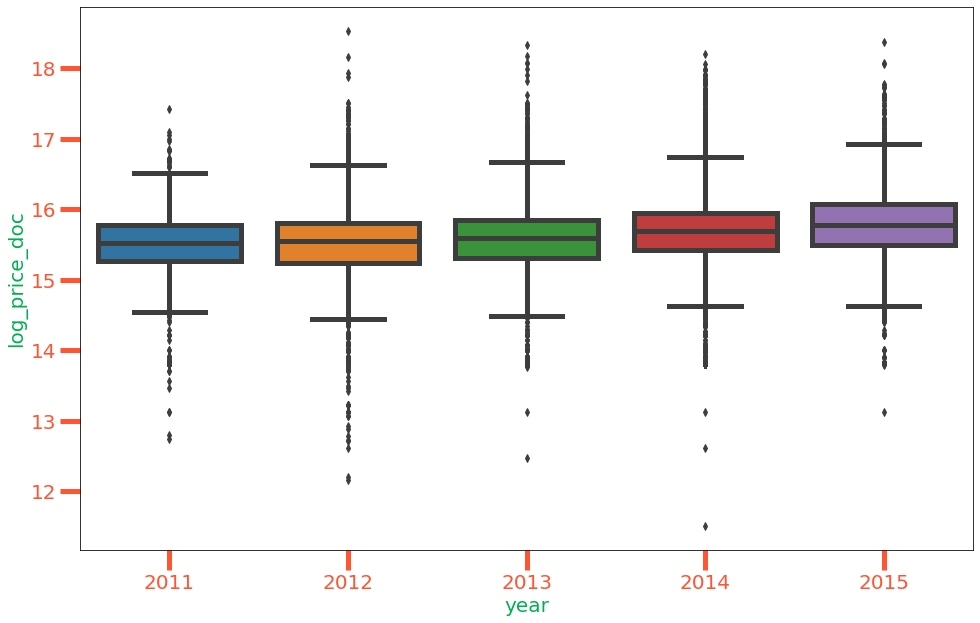

In [21]:



### Например, распределения таргета по годам

import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure()
fig.set_size_inches(16, 10)
    
sns.boxplot(y='log_price_doc', x=df['year'].astype('category'), data=df)
plt.show()

In [22]:
### Закодируем колонку с годом через One-Hot

one_hot = pd.get_dummies(df['year'], prefix='year', drop_first=True)
df = pd.concat((df.drop('year', axis=1), one_hot), axis=1)

In [23]:
df.head()

,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,sub_area,area_m,raion_popul,preschool_quota,preschool_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25_raion,shopping_centers_raion,office_raion,full_all,raion_build_count_with_material_info,build_count_block,build_count_wood,build_count_frame,build_count_brick,build_count_monolith,build_count_panel,build_count_foam,build_count_mix,build_count_before_1920,build_count_1946-1970,build_count_1971-1995,build_count_after_1995,metro_min_avto,kindergarten_km,school_km,park_km,industrial_km,water_treatment_km,cemetery_km,incineration_km,railroad_station_walk_km,railroad_station_avto_min,public_transport_station_km,water_km,mkad_km,ttk_km,big_road1_km,big_road2_km,railroad_km,bus_terminal_avto_km,oil_chemistry_km,nuclear_reactor_km,power_transmission_line_km,thermal_power_plant_km,ts_km,big_market_km,market_shop_km,fitness_km,swim_pool_km,ice_rink_km,hospice_morgue_km,detention_facility_km,university_km,workplaces_km,office_km,additional_education_km,church_synagogue_km,mosque_km,theater_km,exhibition_km,catering_km,ecology,green_part_500,prom_part_500,office_count_500,office_sqm_500,trc_count_500,trc_sqm_500,cafe_count_500,cafe_sum_500_min_price_avg,cafe_count_500_price_4000,big_church_count_500,leisure_count_500,sport_count_500,market_count_500,green_part_1000,prom_part_1000,office_sqm_1000,trc_count_1000,trc_sqm_1000,cafe_sum_1000_min_price_avg,cafe_count_1000_price_high,leisure_count_1000,sport_count_1000,market_count_1000,green_part_1500,trc_count_1500,trc_sqm_1500,cafe_sum_1500_min_price_avg,cafe_count_1500_price_high,sport_count_1500,market_count_1500,prom_part_2000,office_sqm_2000,trc_sqm_2000,cafe_sum_2000_min_price_avg,market_count_2000,green_part_3000,prom_part_3000,trc_count_3000,trc_sqm_3000,cafe_sum_3000_min_price_avg,mosque_count_3000,sport_count_3000,market_count_3000,green_part_5000,prom_part_5000,office_count_5000,trc_sqm_5000,cafe_sum_5000_min_price_avg,mosque_count_5000,market_count_5000,log_price_doc,product_type_OwnerOccupier,culture_objects_top_25_yes,thermal_power_plant_raion_yes,incineration_raion_yes,oil_chemistry_raion_yes,radiation_raion_yes,railroad_terminal_raion_yes,big_market_raion_yes,nuclear_reactor_raion_yes,detention_facility_raion_yes,water_1line_yes,big_road1_1line_yes,railroad_1line_yes,month,year_2012,year_2013,year_2014,year_2015
0,2011-08-20,43,27.0,4.0,12.558974,1.827121,3068.057097,1.909804,6.399301,2.107025,15.594247,6.407578e+06,155572,5001.0,5,0,240.000000,1,0,7,3,0,16,1,86206,211.0,25.0,0.0,0.0,0.0,2.0,184.0,0.0,0.0,0.0,0.0,206.0,5.0,2.590241,0.145700,0.177975,2.158587,1.080934,23.683460,1.804127,3.633334,5.419893,6.905893,0.274985,0.992631,1.422391,10.918587,1.422391,3.830951,1.305159,24.292406,18.152338,5.718519,1.062513,5.814135,4.308127,10.814172,1.676258,0.485841,3.065047,1.107594,2.392353,4.248036,6.715026,0.884350,0.637189,0.947962,0.628187,3.932040,14.053047,7.023705,0.516838,15.628160,0.00,0.00,0,0,0,0,0,741.319572,0,0,0,1,0,7.36,0.00,30500,3,55600,527.78,0,0,6,1,14.27,9,171420,566.67,0,7,1,15.97,188854,1244891,614.29,1,11.98,13.55,23,1419204,639.68,0,21,1,13.09,13.31,29,4036616,708.57,1,4,15.581952,0,0,0,0,0,0,0,0,0,0,0,0,0,8,0,0,0,0
1,2011-08-23,34,19.0,3.0,12.558974,1.827121,3068.057097,1.909804,6.399301,2.107025,15.864842,9.589337e+06,115352,3119.0,5,0,229.000000,1,0,6,1,1,3,0,76284,245.0,83.0,1.0,0.0,67.0,4.0,90.0,0.0,0.0,1.0,143.0,84.0,15.0,0.936700,0.147754,0.273345,0.550690,0.966479,1.317476,4.655004,8.648587,3.411993,4.679745,0.065263,0.698081,9.503405,3.103996,2.887377,3.103996,0.694536,5.706113,9.034642,3.489954,1.246149,3.419574,0.725560,6.910568,3.424716,0.668364,2.000154,8.972823,2.543747,12.649879,1.852560,0.686252,0.688796,1.072315,0.471447,4.841544,6.829889,2.358840,0.230287,15.719018,25.14,0.00,0,0,0,0,5,860.000000,1,0,0,0,0,26

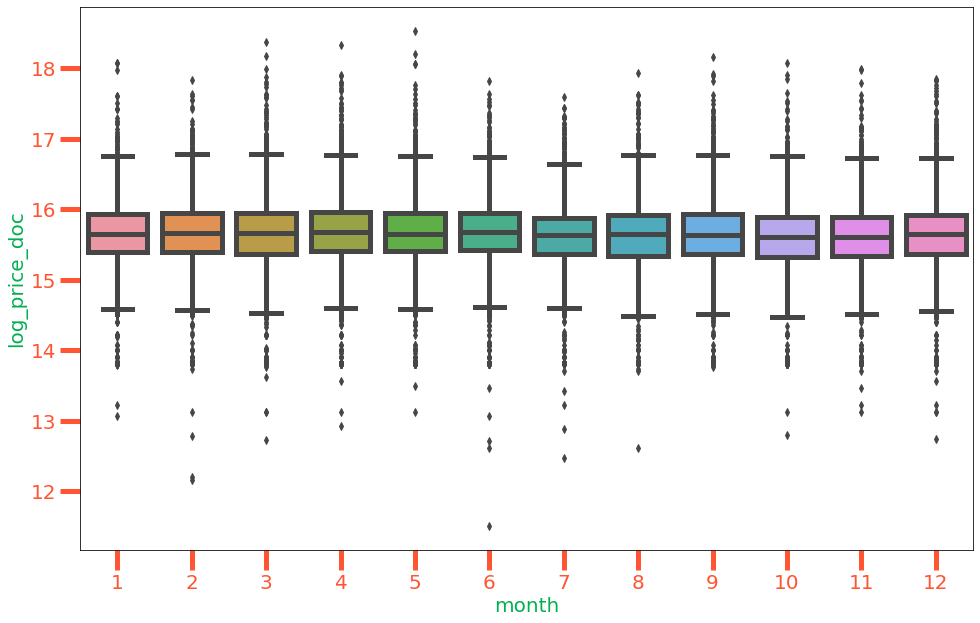

In [24]:
### Распределения таргета по месяцам

fig = plt.figure()
fig.set_size_inches(16, 10)
    
sns.boxplot(y='log_price_doc', x=df['month'].astype('category'), data=df)
plt.show()

In [25]:
### Закодируем колонку с месяцем через One-Hot

one_hot = pd.get_dummies(df['month'], prefix='month', drop_first=True)
df = pd.concat((df.drop('month', axis=1), one_hot), axis=1)

In [26]:
df.head()

,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,sub_area,area_m,raion_popul,preschool_quota,preschool_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25_raion,shopping_centers_raion,office_raion,full_all,raion_build_count_with_material_info,build_count_block,build_count_wood,build_count_frame,build_count_brick,build_count_monolith,build_count_panel,build_count_foam,build_count_mix,build_count_before_1920,build_count_1946-1970,build_count_1971-1995,build_count_after_1995,metro_min_avto,kindergarten_km,school_km,park_km,industrial_km,water_treatment_km,cemetery_km,incineration_km,railroad_station_walk_km,railroad_station_avto_min,public_transport_station_km,water_km,mkad_km,ttk_km,big_road1_km,big_road2_km,railroad_km,bus_terminal_avto_km,oil_chemistry_km,nuclear_reactor_km,power_transmission_line_km,thermal_power_plant_km,ts_km,big_market_km,market_shop_km,fitness_km,swim_pool_km,ice_rink_km,hospice_morgue_km,detention_facility_km,university_km,workplaces_km,office_km,additional_education_km,church_synagogue_km,mosque_km,theater_km,exhibition_km,catering_km,ecology,green_part_500,prom_part_500,office_count_500,office_sqm_500,trc_count_500,trc_sqm_500,cafe_count_500,cafe_sum_500_min_price_avg,cafe_count_500_price_4000,big_church_count_500,leisure_count_500,sport_count_500,market_count_500,green_part_1000,prom_part_1000,office_sqm_1000,trc_count_1000,trc_sqm_1000,cafe_sum_1000_min_price_avg,cafe_count_1000_price_high,leisure_count_1000,sport_count_1000,market_count_1000,green_part_1500,trc_count_1500,trc_sqm_1500,cafe_sum_1500_min_price_avg,cafe_count_1500_price_high,sport_count_1500,market_count_1500,prom_part_2000,office_sqm_2000,trc_sqm_2000,cafe_sum_2000_min_price_avg,market_count_2000,green_part_3000,prom_part_3000,trc_count_3000,trc_sqm_3000,cafe_sum_3000_min_price_avg,mosque_count_3000,sport_count_3000,market_count_3000,green_part_5000,prom_part_5000,office_count_5000,trc_sqm_5000,cafe_sum_5000_min_price_avg,mosque_count_5000,market_count_5000,log_price_doc,product_type_OwnerOccupier,culture_objects_top_25_yes,thermal_power_plant_raion_yes,incineration_raion_yes,oil_chemistry_raion_yes,radiation_raion_yes,railroad_terminal_raion_yes,big_market_raion_yes,nuclear_reactor_raion_yes,detention_facility_raion_yes,water_1line_yes,big_road1_1line_yes,railroad_1line_yes,year_2012,year_2013,year_2014,year_2015,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,2011-08-20,43,27.0,4.0,12.558974,1.827121,3068.057097,1.909804,6.399301,2.107025,15.594247,6.407578e+06,155572,5001.0,5,0,240.000000,1,0,7,3,0,16,1,86206,211.0,25.0,0.0,0.0,0.0,2.0,184.0,0.0,0.0,0.0,0.0,206.0,5.0,2.590241,0.145700,0.177975,2.158587,1.080934,23.683460,1.804127,3.633334,5.419893,6.905893,0.274985,0.992631,1.422391,10.918587,1.422391,3.830951,1.305159,24.292406,18.152338,5.718519,1.062513,5.814135,4.308127,10.814172,1.676258,0.485841,3.065047,1.107594,2.392353,4.248036,6.715026,0.884350,0.637189,0.947962,0.628187,3.932040,14.053047,7.023705,0.516838,15.628160,0.00,0.00,0,0,0,0,0,741.319572,0,0,0,1,0,7.36,0.00,30500,3,55600,527.78,0,0,6,1,14.27,9,171420,566.67,0,7,1,15.97,188854,1244891,614.29,1,11.98,13.55,23,1419204,639.68,0,21,1,13.09,13.31,29,4036616,708.57,1,4,15.581952,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,2011-08-23,34,19.0,3.0,12.558974,1.827121,3068.057097,1.909804,6.399301,2.107025,15.864842,9.589337e+06,115352,3119.0,5,0,229.000000,1,0,6,1,1,3,0,76284,245.0,83.0,1.0,0.0,67.0,4.0,90.0,0.0,0.0,1.0,143.0,84.0,15.0,0.936700,0.147754,0.273345,0.550690,0.966479,1.317476,4.655004,8.648587,3.411993,4.679745,0.065263,0.698081,9.503405,3.103996,2.887377,3.103996,0.694536,5.706113,9.034642,3.489954,1.246149,3.419574,0.725560,6.910568,3.424716,0.668364,2.000154,8.972823,2.543747,12.649879,1.852560,0.686252,0.688796,1.0

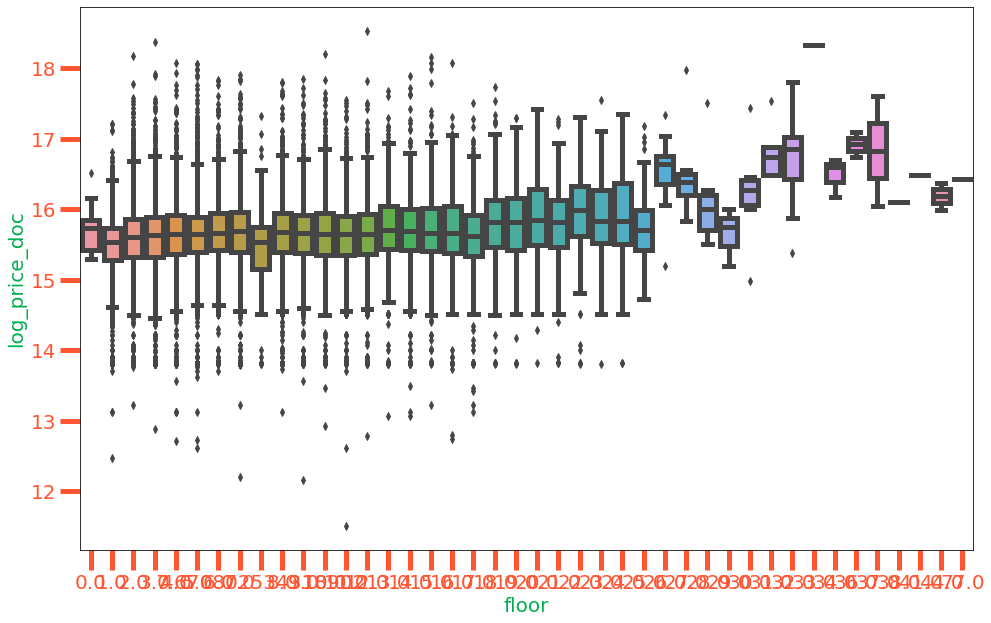

In [27]:
### Распределения таргета по этажу

fig = plt.figure()
fig.set_size_inches(16, 10)
    
sns.boxplot(y='log_price_doc', x=df['floor'].astype('category'), data=df)
plt.show()

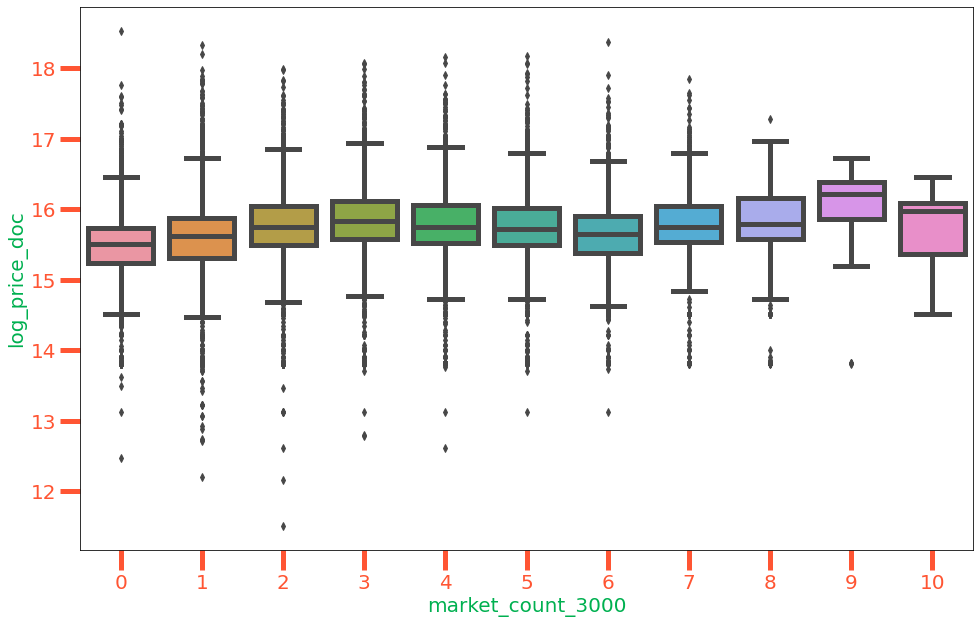

In [28]:
### Распределения таргета по количеству магазинов в радиусе 3км

fig = plt.figure()
fig.set_size_inches(16, 10)
    
sns.boxplot(y='log_price_doc', x=df['market_count_3000'].astype('category'), data=df)
plt.show()

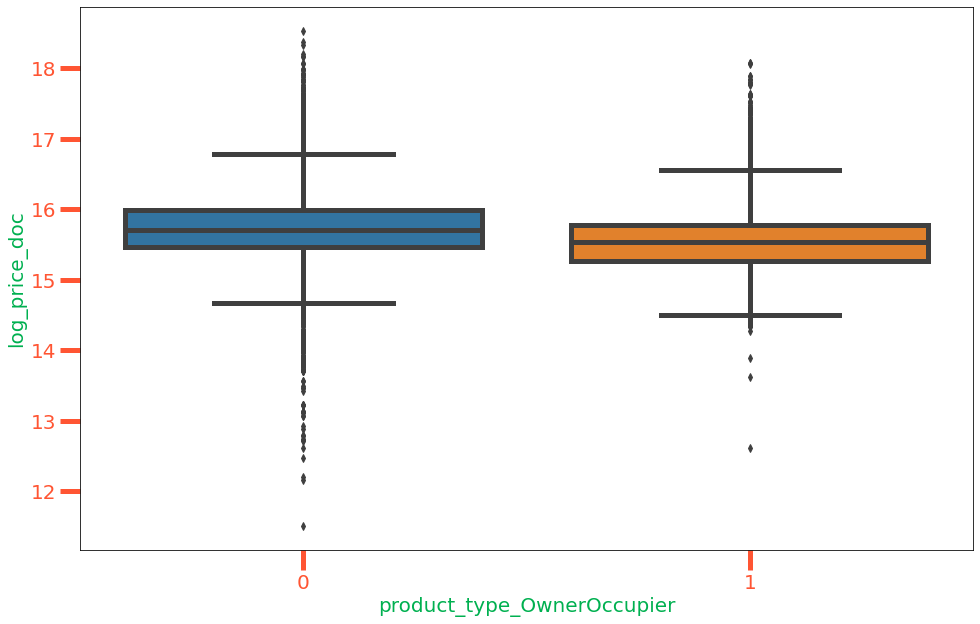

In [29]:
### Распределения таргета по типу недвижимости

fig = plt.figure()
fig.set_size_inches(16, 10)

sns.boxplot(y='log_price_doc', x=df['product_type_OwnerOccupier'].astype('category'), data=df)
plt.show()

In [30]:
### Уберем timestamp

df = df.drop('timestamp', axis=1)

In [31]:
### Отделим таргеты от объектов

X = df.drop('log_price_doc', axis=1)
Y = df['log_price_doc']

## Построим пару базовых моделей в качестве бэйзлайна

## Как такую модель валидировать? Можно ли сделать как и ранее?


Теперь наши данные обладают временной структурой. Поэтому, чтобы получить хорошую обобщающую способность, мы хотим построить не просто модель, хорошо работающую на новых данных, а модель, которая угадывает распределение данных в будущем хотя бы на коротком горизонте. Поэтому, когда мы валидируем дизайн модели, нам важно делить на каждом шаге трейн и тест таким образом, чтобы по временной шкале они не пересекались, и точки из второго множества появлялись позже точек из первого.


<div>
<img src="Рисунок7.png" width="500"/>
</div>



Установим "Тренировочную базу" - некоторое множество $\{x_t: x_t\in X, t <= T_0 \}$. Далее на каждом шаге будем отсутпать от него на некоторый фиксированный (для простоты) интервал $T_1$, называя все объекты, которые в него попали, валидацией на текущем шаге. После обучения модели и замера качества, будем добавлять $T_1$ к тренировочной базе. Новую модель будем обучать на более широком трейне, а тест - на более далеких во времени данных.

P.S. тип валидации стоит выбирать, исходя из задачи. Если нам важно хорошо предсказывать что-то для объектов из будущего, то TimeSplit - хорошая идея.

In [32]:
### Разделим выборку на валидацию и тест

from sklearn.model_selection import TimeSeriesSplit

splitter = TimeSeriesSplit(n_splits=4)

In [33]:
### Конструкция для замера качества на Кросс-Валидации

from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression

splitter = KFold(n_splits=4, shuffle=True, random_state=33)

test_losses = []
train_losses = []

for train_index, test_index in splitter.split(X):
        
    x_train, x_test = X.values[train_index], X.values[test_index]
    y_train, y_test = Y.values[train_index], Y.values[test_index]
    
    model = LinearRegression()
    model.fit(x_train, y_train)
    
    preds_test = model.predict(x_test)
    preds_train = model.predict(x_train)
    
    error_test = np.mean((preds_test - y_test)**2)
    error_train = np.mean((preds_train - y_train)**2)
    
    test_losses.append(error_test)
    train_losses.append(error_train)

print(f"Среднее MSLE на тренировочных фолдах: {np.mean(train_losses).round(3)}")
print(f"Среднее MSLE на тестовых фолдах: {np.mean(test_losses).round(3)}")

Среднее MSLE на тренировочных фолдах: 0.24
Среднее MSLE на тестовых фолдах: 1.315


In [34]:
### Функция cross-validate

from sklearn.model_selection import cross_validate

model = LinearRegression()

cv_result = cross_validate(model, X, Y, 
                           scoring='neg_mean_squared_error',
                           cv=splitter, return_train_score=True)

cv_result

{'fit_time': array([0.09456801, 0.09402132, 0.09101796, 0.09401917]),
 'score_time': array([0.00700045, 0.00800276, 0.0070014 , 0.00700331]),
 'test_score': array([-4.08180989, -0.2467893 , -0.51260217, -0.41833918]),
 'train_score': array([-0.24888788, -0.24617113, -0.22599989, -0.24067255])}

In [35]:
### Убедимся, что результаты совпадают!

print(f"Среднее MSLE на тренировочных фолдах: {-np.mean(cv_result['train_score']).round(3)}")
print(f"Среднее MSLE на тестовых фолдах: {-np.mean(cv_result['test_score']).round(3)}")

Среднее MSLE на тренировочных фолдах: 0.24
Среднее MSLE на тестовых фолдах: 1.315


In [36]:
### Как справится теперь модель регуляризации?

from sklearn.linear_model import Lasso, Ridge

model_lasso = Lasso(max_iter=100000)

cv_result_lasso = cross_validate(model_lasso, X, Y, 
                                 scoring='neg_mean_squared_error',
                                 cv=splitter, return_train_score=True)

print(f"Среднее MSLE на тренировочных фолдах: {-np.mean(cv_result_lasso['train_score']).round(3)}")
print(f"Среднее MSLE на тестовых фолдах: {-np.mean(cv_result_lasso['test_score']).round(3)}")

Среднее MSLE на тренировочных фолдах: 0.296
Среднее MSLE на тестовых фолдах: 66.603


In [37]:
### Как добавить этап нормировки данных в регуляризации?

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipe = Pipeline([('scaler', StandardScaler()), ('Lasso', Lasso(max_iter=100000))])
pipe.fit(X, Y)

print(pipe.predict(X.head(1)))

cv_result_pipe = cross_validate(pipe, X, Y, 
                                scoring='neg_mean_squared_error',
                                cv=splitter, return_train_score=True)

[15.60948317]


In [38]:
print(f"Среднее MSLE на тренировочных фолдах: {-np.mean(cv_result_pipe['train_score']).round(3)}")
print(f"Среднее MSLE на тестовых фолдах: {-np.mean(cv_result_pipe['test_score']).round(3)}")

Среднее MSLE на тренировочных фолдах: 0.365
Среднее MSLE на тестовых фолдах: 0.366


In [39]:
### Какие параметры в нашим лего-конструкторе?

pipe.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()), ('Lasso', Lasso(max_iter=100000))],
 'verbose': False,
 'scaler': StandardScaler(),
 'Lasso': Lasso(max_iter=100000),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'Lasso__alpha': 1.0,
 'Lasso__copy_X': True,
 'Lasso__fit_intercept': True,
 'Lasso__max_iter': 100000,
 'Lasso__normalize': 'deprecated',
 'Lasso__positive': False,
 'Lasso__precompute': False,
 'Lasso__random_state': None,
 'Lasso__selection': 'cyclic',
 'Lasso__tol': 0.0001,
 'Lasso__warm_start': False}

In [40]:
alphas = np.linspace(start=0.01, stop=1, num=30)
alphas

array([0.01      , 0.04413793, 0.07827586, 0.11241379, 0.14655172,
       0.18068966, 0.21482759, 0.24896552, 0.28310345, 0.31724138,
       0.35137931, 0.38551724, 0.41965517, 0.4537931 , 0.48793103,
       0.52206897, 0.5562069 , 0.59034483, 0.62448276, 0.65862069,
       0.69275862, 0.72689655, 0.76103448, 0.79517241, 0.82931034,
       0.86344828, 0.89758621, 0.93172414, 0.96586207, 1.        ])

In [41]:
### Как подобрать коэффициент регуляризации?

from sklearn.model_selection import GridSearchCV

param_grid = {
    "Lasso__alpha": alphas
}

### Передадим в GridSearchCV

search = GridSearchCV(pipe, param_grid, 
                      cv=splitter, scoring='neg_mean_squared_error')

search.fit(X, Y)

print(f"Best parameter (CV score={search.best_score_:.5f}):")
print(search.best_params_)

Best parameter (CV score=-0.32776):
{'Lasso__alpha': 0.11241379310344828}


In [42]:
### Убедимся, что все ок!

pipe.set_params(Lasso__alpha=search.best_params_['Lasso__alpha'])

Pipeline(steps=[('scaler', StandardScaler()),
                ('Lasso', Lasso(alpha=0.11241379310344828, max_iter=100000))])

In [43]:
cv_result_pipe = cross_validate(pipe, X, Y, 
                                scoring='neg_mean_squared_error',
                                cv=splitter, return_train_score=True)

print(f"Среднее MSLE на тренировочных фолдах: {-np.mean(cv_result_pipe['train_score']).round(3)}")
print(f"Среднее MSLE на тестовых фолдах: {-np.mean(cv_result_pipe['test_score']).round(3)}")

Среднее MSLE на тренировочных фолдах: 0.29
Среднее MSLE на тестовых фолдах: 0.328


### Анализ выбросов

In [44]:
data = pd.concat((X, Y), axis=1)

In [45]:
top_quantile = data['log_price_doc'].quantile(0.975)
low_quantile = data['log_price_doc'].quantile(0.025)

print(f"Топ 2,5% значение таргета: {top_quantile.round(2)}")
print(f"Топ 97,5% значение таргета: {low_quantile.round(2)}")

Топ 2,5% значение таргета: 16.7
Топ 97,5% значение таргета: 13.82


In [46]:
### Выбросим объекты со значениями вне отрезка [top 2,5%; top97,5%]

data = data[(data['log_price_doc']>low_quantile)&(data['log_price_doc']<top_quantile)]

X_new, Y_new = data.drop('log_price_doc', axis=1), data['log_price_doc']

In [47]:
### Как подобрать коэффициент регуляризации?

new_splitter = TimeSeriesSplit(n_splits=4)

param_grid = {
    "Lasso__alpha": alphas
}

### Передадим в GridSearchCV

search = GridSearchCV(pipe, param_grid, 
                      cv=new_splitter, scoring='neg_mean_squared_error')

search.fit(X_new, Y_new)

print(f"Best parameter (CV score={search.best_score_:.5f}):")
print(search.best_params_)

Best parameter (CV score=-0.16878):
{'Lasso__alpha': 0.07827586206896552}


In [48]:
### Убедимся, что все ок!

pipe.set_params(Lasso__alpha=search.best_params_['Lasso__alpha'])

Pipeline(steps=[('scaler', StandardScaler()),
                ('Lasso', Lasso(alpha=0.07827586206896552, max_iter=100000))])

In [49]:
cv_result_pipe = cross_validate(pipe, X_new, Y_new, 
                                scoring='neg_mean_squared_error',
                                cv=splitter, return_train_score=True)

print(f"Среднее MSLE на тренировочных фолдах: {-np.mean(cv_result_pipe['train_score']).round(3)}")
print(f"Среднее MSLE на тестовых фолдах: {-np.mean(cv_result_pipe['test_score']).round(3)}")

Среднее MSLE на тренировочных фолдах: 0.157
Среднее MSLE на тестовых фолдах: 0.173


In [50]:
### Разделим квартиры по типу недвижимости
### Для первички и вторички будем строить разные модели

Owner_Occupier = data[data['product_type_OwnerOccupier'] == 1].copy()
Investment = data[data['product_type_OwnerOccupier'] == 0].copy()

In [52]:
X_Occupier = Owner_Occupier.drop('log_price_doc', axis=1)
X_Investment = Investment.drop('log_price_doc', axis=1)

Y_Occupier = Owner_Occupier['log_price_doc']
Y_Investment = Investment['log_price_doc']

In [53]:
### Соберем модель для Owner_Occupier

search_Owner_Occupier = GridSearchCV(pipe, param_grid, 
                                     cv=splitter, scoring='neg_mean_squared_error')

search_Owner_Occupier.fit(X_Occupier, Y_Occupier)

print(f"Best parameter (CV score={search_Owner_Occupier.best_score_:.5f}):")
print(search_Owner_Occupier.best_params_)

pipe.set_params(Lasso__alpha=search_Owner_Occupier.best_params_['Lasso__alpha'])

cv_result_pipe = cross_validate(pipe, X_Occupier, Y_Occupier, 
                                scoring='neg_mean_squared_error',
                                cv=splitter, return_train_score=True)

error_Occupier_train = -np.mean(cv_result_pipe['train_score'])
error_Occupier_test = -np.mean(cv_result_pipe['test_score'])

print(f"Среднее MSLE на тренировочных фолдах: {error_Occupier_train.round(3)}")
print(f"Среднее MSLE на тестовых фолдах: {error_Occupier_test.round(3)}")

Best parameter (CV score=-0.11744):
{'Lasso__alpha': 0.14655172413793105}
Среднее MSLE на тренировочных фолдах: 0.103
Среднее MSLE на тестовых фолдах: 0.117


In [54]:
### Соберем модель для Investment

search_Investment = GridSearchCV(pipe, param_grid, 
                                cv=splitter, scoring='neg_mean_squared_error')

search_Investment.fit(X_Investment, Y_Investment)

print(f"Best parameter (CV score={search_Investment.best_score_:.5f}):")
print(search_Investment.best_params_)

pipe.set_params(Lasso__alpha=search_Investment.best_params_['Lasso__alpha'])

cv_result_pipe = cross_validate(pipe, X_Investment, Y_Investment, 
                                scoring='neg_mean_squared_error',
                                cv=splitter, return_train_score=True)

error_Investment_train = -np.mean(cv_result_pipe['train_score'])
error_Investment_test = -np.mean(cv_result_pipe['test_score'])

print(f"Среднее MSLE на тренировочных фолдах: {error_Investment_train.round(3)}")
print(f"Среднее MSLE на тестовых фолдах: {error_Investment_test.round(3)}")

Best parameter (CV score=-0.18490):
{'Lasso__alpha': 0.04413793103448276}
Среднее MSLE на тренировочных фолдах: 0.184
Среднее MSLE на тестовых фолдах: 0.185


In [55]:
### Перевзвесим скоры с учетом количества объектов
### в обоих типах жилья

n_Occupier = Owner_Occupier.shape[0]
n_Investment = Investment.shape[0] 

## Посчитаем доли категорий в общий выборке 

share_Occupier = n_Occupier / data.shape[0]
share_Investment = n_Investment / data.shape[0]

weighted_error_train = share_Occupier * error_Occupier_train + \
                       share_Investment * error_Investment_train

weighted_error_test = share_Occupier * error_Occupier_test + \
                       share_Investment * error_Investment_test

print(f"Среднее взвешенное MSLE на тренировочных фолдах: {weighted_error_train.round(3)}")
print(f"Среднее взвешенное MSLE на тестовых фолдах: {weighted_error_test.round(3)}")

Среднее взвешенное MSLE на тренировочных фолдах: 0.154
Среднее взвешенное MSLE на тестовых фолдах: 0.16


In [124]:
X_test, Y_test= data.drop('log_price_doc', axis =1), data['log_price_doc']

In [121]:
import xgboost as xgb

In [122]:
xgb_params = {
	'objective': 'reg:linear',
	'eval_metric': 'rmse',
	'eta': 0.05,
	'max_depth': 5,
	'subsample': 0.8,
	'colsample_bytree': 0.7,
	"min_child_weight": 1,
	"gamma": 0,
	"alpha": 0,
	"nthread": 8
}

In [63]:
train_DMat = xgb.DMatrix(X_new.values, Y_new.values, feature_names = X_new.columns)

In [125]:
test_DMat = xgb.DMatrix(X_test.values, Y_test.values, feature_names = X_test.columns)

[00:30:11] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.


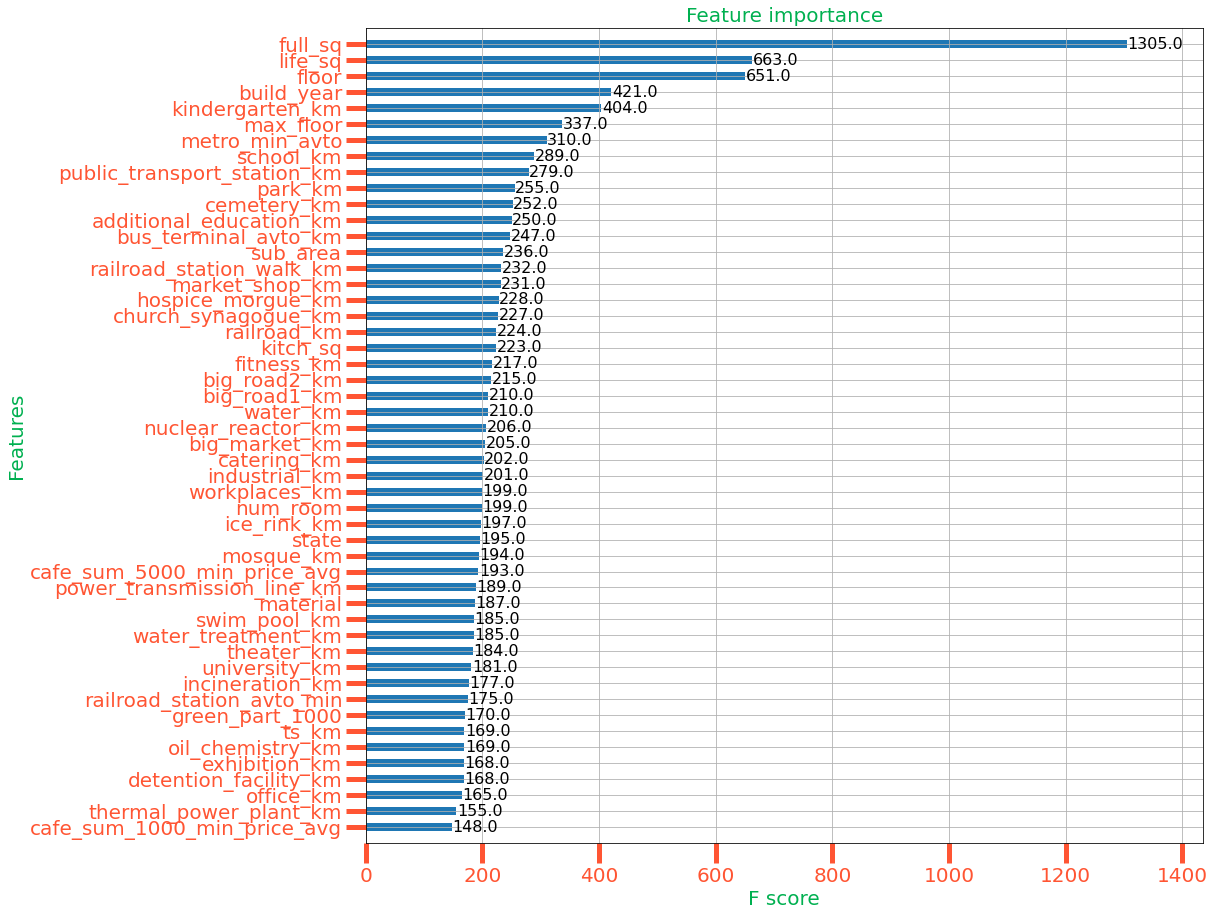

In [126]:
test_model = xgb.train(params = xgb_params, dtrain = train_DMat, num_boost_round = 750)
test_model.best_iteration

plt.rcParams.update({'font.size': 16})
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
xgb.plot_importance(test_model, max_num_features = 50, height = 0.5, ax = ax)
plt.show()

[00:32:15] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[00:32:15] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[00:32:15] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[00:32:16] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[00:32:16] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[00:32:16] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:20

[00:36:44] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
Subsample= 0.5 , Colsample= 0.6000000000000001 : 0.462880585369672
[00:37:23] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[00:37:23] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[00:37:23] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[00:37:23] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[00:37:23] WARNING: C:/Users/administrator/works

[00:42:07] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
Subsample= 0.6 , Colsample= 0.6000000000000001 : 0.46120841005349433
[00:42:56] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[00:42:56] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[00:42:56] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[00:42:56] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[00:42:56] WARNING: C:/Users/administrator/wor

[00:49:40] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[00:49:40] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
Subsample= 0.7 , Colsample= 0.6000000000000001 : 0.4606010407235277
[00:50:44] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[00:50:44] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[00:50:44] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[00:50:44] WARNING: C:/Users/administrator/work

Subsample= 0.7999999999999999 , Colsample= 0.5 : 0.46048310651188834
[00:58:02] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[00:58:02] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[00:58:02] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[00:58:02] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[00:58:02] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[00:58:02] WARNING: C:/Users/administrator/wor

[01:06:15] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[01:06:15] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
Subsample= 0.8999999999999999 , Colsample= 0.5 : 0.460426663031438
[01:07:18] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[01:07:18] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[01:07:18] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[01:07:19] WARNING: C:/Users/administrator/works

Subsample= 0.9999999999999999 , Colsample= 0.4 : 0.4605557306522939
[01:15:51] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[01:15:51] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[01:15:51] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[01:15:51] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[01:15:51] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[01:15:51] WARNING: C:/Users/administrator/work

[01:24:27] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[01:24:27] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
MinChildWt= 2 : 0.4604480933332555
[01:25:55] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[01:25:56] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[01:25:56] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[01:25:56] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0

[01:35:34] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[01:35:34] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[01:35:34] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
Gamma= 0.5 : 0.4595035052109786
[01:37:05] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[01:37:05] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[01:37:05] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/sr

[01:47:22] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[01:47:22] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[01:47:22] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[01:47:22] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[01:47:22] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[01:47:22] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:20

[117]	train-rmse:1.47439+0.00041	test-rmse:1.47548+0.00416
[118]	train-rmse:1.44795+0.00042	test-rmse:1.44908+0.00410
[119]	train-rmse:1.42212+0.00043	test-rmse:1.42329+0.00409
[120]	train-rmse:1.39684+0.00046	test-rmse:1.39806+0.00404
[121]	train-rmse:1.37214+0.00047	test-rmse:1.37340+0.00401
[122]	train-rmse:1.34797+0.00047	test-rmse:1.34928+0.00398
[123]	train-rmse:1.32436+0.00049	test-rmse:1.32571+0.00395
[124]	train-rmse:1.30127+0.00049	test-rmse:1.30268+0.00390
[125]	train-rmse:1.27869+0.00053	test-rmse:1.28015+0.00388
[126]	train-rmse:1.25664+0.00053	test-rmse:1.25815+0.00384
[127]	train-rmse:1.23508+0.00054	test-rmse:1.23665+0.00378
[128]	train-rmse:1.21401+0.00055	test-rmse:1.21563+0.00375
[129]	train-rmse:1.19342+0.00057	test-rmse:1.19508+0.00372
[130]	train-rmse:1.17329+0.00058	test-rmse:1.17499+0.00367
[131]	train-rmse:1.15363+0.00057	test-rmse:1.15537+0.00364
[132]	train-rmse:1.13441+0.00057	test-rmse:1.13621+0.00360
[133]	train-rmse:1.11566+0.00058	test-rmse:1.11750+0.003

[256]	train-rmse:0.46520+0.00142	test-rmse:0.47484+0.00822
[257]	train-rmse:0.46480+0.00143	test-rmse:0.47450+0.00825
[258]	train-rmse:0.46442+0.00145	test-rmse:0.47417+0.00828
[259]	train-rmse:0.46405+0.00144	test-rmse:0.47384+0.00830
[260]	train-rmse:0.46367+0.00145	test-rmse:0.47351+0.00832
[261]	train-rmse:0.46332+0.00145	test-rmse:0.47321+0.00832
[262]	train-rmse:0.46298+0.00146	test-rmse:0.47292+0.00835
[263]	train-rmse:0.46266+0.00147	test-rmse:0.47264+0.00836
[264]	train-rmse:0.46235+0.00149	test-rmse:0.47238+0.00837
[265]	train-rmse:0.46205+0.00148	test-rmse:0.47212+0.00839
[266]	train-rmse:0.46174+0.00149	test-rmse:0.47186+0.00841
[267]	train-rmse:0.46146+0.00149	test-rmse:0.47163+0.00842
[268]	train-rmse:0.46118+0.00149	test-rmse:0.47139+0.00845
[269]	train-rmse:0.46090+0.00149	test-rmse:0.47115+0.00846
[270]	train-rmse:0.46062+0.00150	test-rmse:0.47093+0.00847
[271]	train-rmse:0.46036+0.00150	test-rmse:0.47071+0.00849
[272]	train-rmse:0.46009+0.00151	test-rmse:0.47050+0.008

[395]	train-rmse:0.44730+0.00151	test-rmse:0.46245+0.00917
[396]	train-rmse:0.44723+0.00152	test-rmse:0.46242+0.00917
[397]	train-rmse:0.44718+0.00153	test-rmse:0.46240+0.00916
[398]	train-rmse:0.44713+0.00153	test-rmse:0.46239+0.00916
[399]	train-rmse:0.44707+0.00154	test-rmse:0.46237+0.00916
[400]	train-rmse:0.44701+0.00154	test-rmse:0.46236+0.00915
[401]	train-rmse:0.44696+0.00154	test-rmse:0.46235+0.00915
[402]	train-rmse:0.44691+0.00154	test-rmse:0.46233+0.00915
[403]	train-rmse:0.44686+0.00154	test-rmse:0.46232+0.00915
[404]	train-rmse:0.44682+0.00154	test-rmse:0.46230+0.00914
[405]	train-rmse:0.44675+0.00155	test-rmse:0.46228+0.00914
[406]	train-rmse:0.44671+0.00154	test-rmse:0.46227+0.00914
[407]	train-rmse:0.44666+0.00155	test-rmse:0.46225+0.00914
[408]	train-rmse:0.44661+0.00154	test-rmse:0.46223+0.00915
[409]	train-rmse:0.44653+0.00154	test-rmse:0.46220+0.00915
[410]	train-rmse:0.44647+0.00155	test-rmse:0.46218+0.00914
[411]	train-rmse:0.44642+0.00154	test-rmse:0.46217+0.009

[534]	train-rmse:0.44025+0.00154	test-rmse:0.46058+0.00920
[535]	train-rmse:0.44021+0.00155	test-rmse:0.46058+0.00920
[536]	train-rmse:0.44016+0.00155	test-rmse:0.46057+0.00921
[537]	train-rmse:0.44011+0.00153	test-rmse:0.46057+0.00921
[538]	train-rmse:0.44006+0.00154	test-rmse:0.46055+0.00920
[539]	train-rmse:0.44002+0.00154	test-rmse:0.46055+0.00920
[540]	train-rmse:0.43997+0.00155	test-rmse:0.46054+0.00920
[541]	train-rmse:0.43991+0.00155	test-rmse:0.46053+0.00921
[542]	train-rmse:0.43987+0.00155	test-rmse:0.46051+0.00921
[543]	train-rmse:0.43982+0.00154	test-rmse:0.46050+0.00922
[544]	train-rmse:0.43979+0.00154	test-rmse:0.46049+0.00922
[545]	train-rmse:0.43975+0.00155	test-rmse:0.46049+0.00922
[546]	train-rmse:0.43970+0.00154	test-rmse:0.46049+0.00922
[547]	train-rmse:0.43965+0.00153	test-rmse:0.46047+0.00922
[548]	train-rmse:0.43961+0.00153	test-rmse:0.46046+0.00922
[549]	train-rmse:0.43956+0.00152	test-rmse:0.46046+0.00922
[550]	train-rmse:0.43951+0.00152	test-rmse:0.46045+0.009

[673]	train-rmse:0.43420+0.00149	test-rmse:0.45950+0.00923
[674]	train-rmse:0.43418+0.00149	test-rmse:0.45949+0.00924
[675]	train-rmse:0.43413+0.00149	test-rmse:0.45949+0.00924
[676]	train-rmse:0.43409+0.00149	test-rmse:0.45947+0.00924
[677]	train-rmse:0.43405+0.00148	test-rmse:0.45947+0.00925
[678]	train-rmse:0.43401+0.00149	test-rmse:0.45945+0.00926
[679]	train-rmse:0.43398+0.00148	test-rmse:0.45944+0.00927
[680]	train-rmse:0.43393+0.00148	test-rmse:0.45943+0.00926
[681]	train-rmse:0.43389+0.00149	test-rmse:0.45942+0.00926
[682]	train-rmse:0.43385+0.00148	test-rmse:0.45941+0.00926
[683]	train-rmse:0.43381+0.00148	test-rmse:0.45940+0.00927
[684]	train-rmse:0.43377+0.00148	test-rmse:0.45940+0.00926
[685]	train-rmse:0.43372+0.00149	test-rmse:0.45939+0.00926
[686]	train-rmse:0.43368+0.00149	test-rmse:0.45939+0.00926
[687]	train-rmse:0.43363+0.00148	test-rmse:0.45939+0.00926
[688]	train-rmse:0.43359+0.00147	test-rmse:0.45939+0.00927
[689]	train-rmse:0.43356+0.00146	test-rmse:0.45939+0.009

[812]	train-rmse:0.42856+0.00144	test-rmse:0.45878+0.00927
[813]	train-rmse:0.42852+0.00144	test-rmse:0.45877+0.00927
[814]	train-rmse:0.42848+0.00143	test-rmse:0.45877+0.00927
[815]	train-rmse:0.42844+0.00144	test-rmse:0.45876+0.00926
[816]	train-rmse:0.42842+0.00144	test-rmse:0.45875+0.00927
[817]	train-rmse:0.42837+0.00142	test-rmse:0.45874+0.00927
[818]	train-rmse:0.42834+0.00142	test-rmse:0.45874+0.00926
[819]	train-rmse:0.42830+0.00142	test-rmse:0.45873+0.00927
[820]	train-rmse:0.42825+0.00142	test-rmse:0.45872+0.00928
[821]	train-rmse:0.42822+0.00142	test-rmse:0.45870+0.00928
[822]	train-rmse:0.42818+0.00140	test-rmse:0.45870+0.00928
[823]	train-rmse:0.42814+0.00140	test-rmse:0.45869+0.00929
[824]	train-rmse:0.42810+0.00141	test-rmse:0.45868+0.00929
[825]	train-rmse:0.42806+0.00142	test-rmse:0.45867+0.00930
[826]	train-rmse:0.42804+0.00142	test-rmse:0.45868+0.00929
[827]	train-rmse:0.42800+0.00143	test-rmse:0.45868+0.00930
[828]	train-rmse:0.42797+0.00143	test-rmse:0.45867+0.009

[951]	train-rmse:0.42342+0.00142	test-rmse:0.45837+0.00935
[952]	train-rmse:0.42338+0.00142	test-rmse:0.45838+0.00936
[953]	train-rmse:0.42335+0.00142	test-rmse:0.45838+0.00936
[954]	train-rmse:0.42331+0.00142	test-rmse:0.45838+0.00936
[955]	train-rmse:0.42328+0.00142	test-rmse:0.45837+0.00936
[956]	train-rmse:0.42324+0.00142	test-rmse:0.45837+0.00936
[957]	train-rmse:0.42321+0.00142	test-rmse:0.45837+0.00936
[958]	train-rmse:0.42317+0.00142	test-rmse:0.45836+0.00937
[959]	train-rmse:0.42314+0.00143	test-rmse:0.45837+0.00937
[960]	train-rmse:0.42310+0.00143	test-rmse:0.45836+0.00938
[961]	train-rmse:0.42307+0.00143	test-rmse:0.45837+0.00938
[962]	train-rmse:0.42303+0.00142	test-rmse:0.45837+0.00938
[963]	train-rmse:0.42300+0.00143	test-rmse:0.45837+0.00938
[964]	train-rmse:0.42297+0.00143	test-rmse:0.45836+0.00938
[965]	train-rmse:0.42293+0.00143	test-rmse:0.45835+0.00937
[966]	train-rmse:0.42290+0.00143	test-rmse:0.45836+0.00938
[967]	train-rmse:0.42286+0.00143	test-rmse:0.45836+0.009

[1089]	train-rmse:0.41860+0.00144	test-rmse:0.45814+0.00931
[1090]	train-rmse:0.41857+0.00145	test-rmse:0.45813+0.00931
[1091]	train-rmse:0.41854+0.00145	test-rmse:0.45812+0.00931
[1092]	train-rmse:0.41851+0.00144	test-rmse:0.45812+0.00931
[1093]	train-rmse:0.41848+0.00145	test-rmse:0.45812+0.00931
[1094]	train-rmse:0.41845+0.00145	test-rmse:0.45811+0.00930
[1095]	train-rmse:0.41841+0.00144	test-rmse:0.45811+0.00931
[1096]	train-rmse:0.41838+0.00144	test-rmse:0.45811+0.00931
[1097]	train-rmse:0.41835+0.00145	test-rmse:0.45810+0.00931
[1098]	train-rmse:0.41832+0.00145	test-rmse:0.45810+0.00931
[1099]	train-rmse:0.41828+0.00145	test-rmse:0.45810+0.00931
[1100]	train-rmse:0.41825+0.00144	test-rmse:0.45809+0.00931
[1101]	train-rmse:0.41821+0.00145	test-rmse:0.45809+0.00931
[1102]	train-rmse:0.41818+0.00145	test-rmse:0.45809+0.00930
[1103]	train-rmse:0.41814+0.00144	test-rmse:0.45809+0.00931
[1104]	train-rmse:0.41811+0.00146	test-rmse:0.45809+0.00930
[1105]	train-rmse:0.41808+0.00146	test-r

[1226]	train-rmse:0.41419+0.00141	test-rmse:0.45794+0.00928
[1227]	train-rmse:0.41415+0.00141	test-rmse:0.45793+0.00928
[1228]	train-rmse:0.41412+0.00141	test-rmse:0.45793+0.00928
[1229]	train-rmse:0.41409+0.00141	test-rmse:0.45792+0.00928
[1230]	train-rmse:0.41406+0.00140	test-rmse:0.45793+0.00928
[1231]	train-rmse:0.41402+0.00140	test-rmse:0.45793+0.00929
[1232]	train-rmse:0.41400+0.00140	test-rmse:0.45793+0.00929
[1233]	train-rmse:0.41397+0.00140	test-rmse:0.45793+0.00928
[1234]	train-rmse:0.41393+0.00140	test-rmse:0.45793+0.00928
[1235]	train-rmse:0.41390+0.00140	test-rmse:0.45793+0.00928
[1236]	train-rmse:0.41386+0.00140	test-rmse:0.45794+0.00929
[1237]	train-rmse:0.41383+0.00139	test-rmse:0.45794+0.00928
[1238]	train-rmse:0.41380+0.00140	test-rmse:0.45794+0.00928
[1239]	train-rmse:0.41375+0.00140	test-rmse:0.45793+0.00928
[1240]	train-rmse:0.41373+0.00140	test-rmse:0.45793+0.00929
[1241]	train-rmse:0.41370+0.00139	test-rmse:0.45793+0.00928
[1242]	train-rmse:0.41367+0.00138	test-r

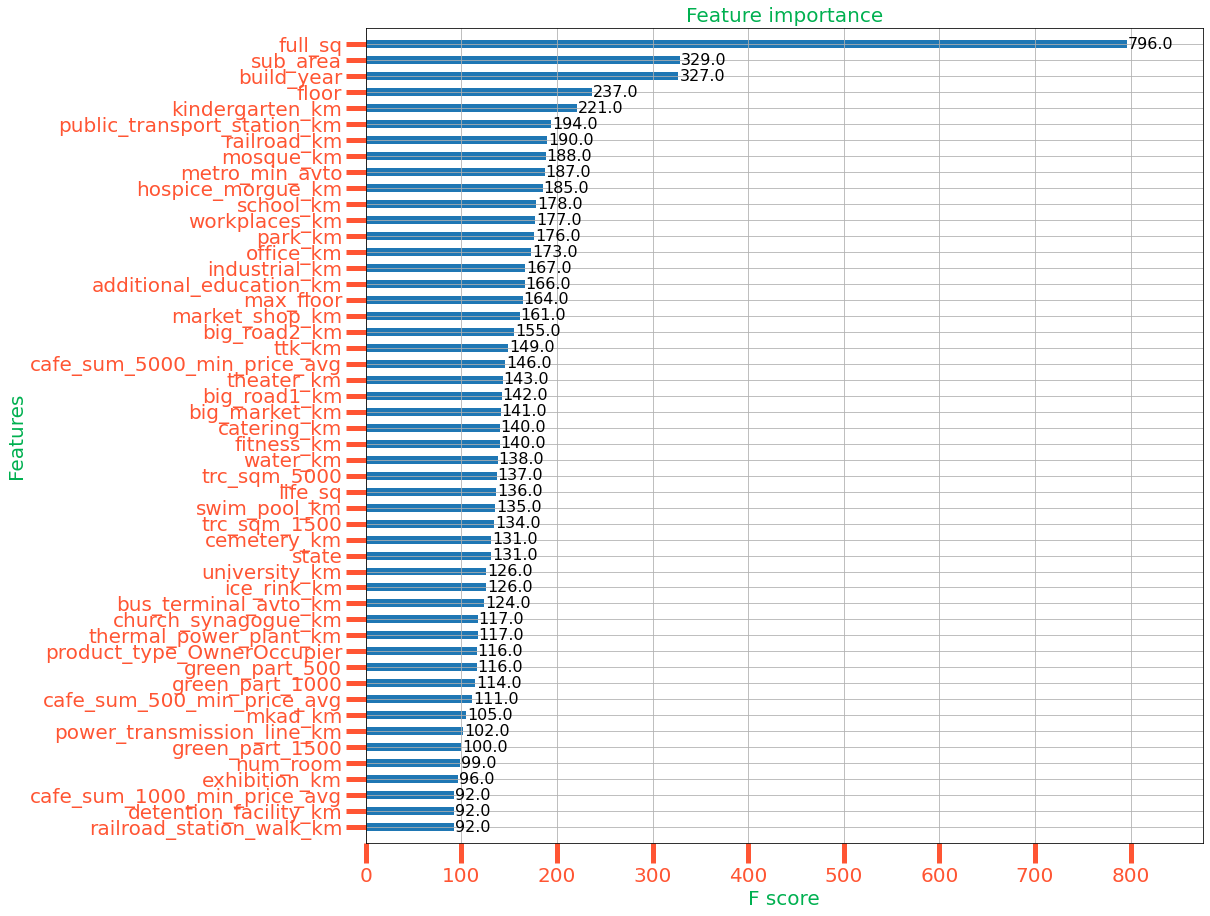

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

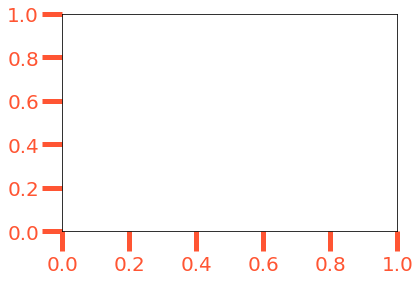

In [127]:
xgb_cv_params = {
	'objective': 'reg:linear',
	'eval_metric': 'rmse',
	'eta': 0.05,
	'max_depth': 5,
	'subsample': 0.8,
	'colsample_bytree': 0.7,
	"min_child_weight": 1,
	"gamma": 0,
	"alpha": 0,
	"nthread": 8
}

# Tune max_depth:
for i in range(4, 8):
	xgb_cv_params["max_depth"] = i
	xgb_cv1 = xgb.cv(params = xgb_cv_params, dtrain = train_DMat, nfold = 6, num_boost_round = 1000, early_stopping_rounds = 25,
					 verbose_eval = False, seed = 1990)
	print("Depth=", i, ":", float(xgb_cv1['test-rmse-mean'][-1:]))
xgb_cv_params["max_depth"] = 4

# Tune subsample and colsample_bytree:
for i in np.arange(0.5, 1.01, 0.1):
	xgb_cv_params["subsample"] = i
	for j in np.arange(0.3, 1.01, 0.1):
		xgb_cv_params['colsample_bytree'] = j
		xgb_cv1 = xgb.cv(params = xgb_cv_params, dtrain = train_DMat, nfold = 6, num_boost_round = 1000, early_stopping_rounds = 25,
						 verbose_eval = False, seed = 1990)
		print("Subsample=", i, ", Colsample=", j, ":", float(xgb_cv1['test-rmse-mean'][-1:]))
xgb_cv_params["subsample"] = 0.9
xgb_cv_params["colsample_bytree"] = 0.9

# Tune min_child_weight:
for i in [1, 2, 5, 8, 10, 15, 20]:
	xgb_cv_params["min_child_weight"] = i
	xgb_cv1 = xgb.cv(params = xgb_cv_params, dtrain = train_DMat, nfold = 6, num_boost_round = 1000, early_stopping_rounds = 25,
					 verbose_eval = False, seed = 1990)
	print("MinChildWt=", i, ":", float(xgb_cv1['test-rmse-mean'][-1:]))
xgb_cv_params["min_child_weight"] = 10

# Tune gamma:
for i in np.arange(0, 1.01, 0.25):
	xgb_cv_params["gamma"] = i
	xgb_cv1 = xgb.cv(params = xgb_cv_params, dtrain = train_DMat, nfold = 6, num_boost_round = 1000, early_stopping_rounds = 25,
					 verbose_eval = False, seed = 1990)
	print("Gamma=", i, ":", float(xgb_cv1['test-rmse-mean'][-1:]))
xgb_cv_params["gamma"] = 1

# Tune alpha:
for i in np.arange(0, 2.01, 0.5):
	xgb_cv_params["alpha"] = i
	xgb_cv1 = xgb.cv(params = xgb_cv_params, dtrain = train_DMat, nfold = 6, num_boost_round = 1000, early_stopping_rounds = 25,
					 verbose_eval = False, seed = 1990)
	print("Alpha=", i, ":", float(xgb_cv1['test-rmse-mean'][-1:]))
xgb_cv_params["alpha"] = 1.5

####################################
# XGBoost Cross-Validation Round 2 #

xgb_cv_params2 = {
	'objective': 'reg:linear',
	'eval_metric': 'rmse',
	'eta': 0.02,
	'max_depth': 4,
	'subsample': 0.9,
	'colsample_bytree': 0.9,
	"min_child_weight": 10,
	"gamma": 1,
	"alpha": 1.5,
	"nthread": 8
}

xgb_cv2 = xgb.cv(params = xgb_cv_params2, dtrain = train_DMat, nfold = 8, num_boost_round = 1500, early_stopping_rounds = 50,
					verbose_eval = True, seed = 1990)

###################
# Fit Final Model #

# Model fit run:
xgb_fit1 = xgb.train(params = xgb_cv_params2, dtrain = train_DMat, num_boost_round = 1039)

# Plot variable importance graph:
plt.rcParams.update({'font.size': 16})
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
xgb.plot_importance(xgb_fit1, max_num_features = 50, height = 0.5, ax = ax)
plt.show()

# Visualize the first tree in the boosted sequence (note that graphviz must be installed):
xgb.plot_tree(xgb_fit1, num_trees = 0)
plt.show()

###########################
# Predict on Test Dataset #

price_pred_log = xgb_fit1.predict(test_DMat)
price_pred = np.exp(price_pred_log) - 1

xgb_sub1 = pd.DataFrame({'id':test_id, 'price_doc':price_pred})
xgb_sub1.to_csv(project_dir + "/Submissions/xgb_sub1.csv", index = False)

In [62]:
from catboost import Pool, cv
params = {"iterations": 100,
          "depth": 2,
          "loss_function": "RMSE",
          "verbose": False}
cv_dataset = Pool(data=X_Investment,
                  label=Y_Investment)
scores = cv(cv_dataset,
            params,
            fold_count=2, 
            plot="True")

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/2]

bestTest = 0.8881096554
bestIteration = 99

Training on fold [1/2]

bestTest = 0.8790026173
bestIteration = 99



In [66]:
from catboost import CatBoostRegressor
cat = CatBoostRegressor()

In [70]:
grid = {'learning_rate': [0.03, 0.1],
        'depth': [4, 6],
        'l2_leaf_reg': [1, 3]}

grid_search_result = cat.grid_search(grid, X=X_Investment, y=Y_Investment, plot=True, verbose = False, )

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 15.2311826	test: 15.2342393	best: 15.2342393 (0)	total: 21.7ms	remaining: 21.7s
1:	learn: 14.7751246	test: 14.7781877	best: 14.7781877 (1)	total: 25.1ms	remaining: 12.5s
2:	learn: 14.3328306	test: 14.3358660	best: 14.3358660 (2)	total: 28.7ms	remaining: 9.53s
3:	learn: 13.9037000	test: 13.9066890	best: 13.9066890 (3)	total: 32.3ms	remaining: 8.03s
4:	learn: 13.4873051	test: 13.4903501	best: 13.4903501 (4)	total: 35.6ms	remaining: 7.09s
5:	learn: 13.0835573	test: 13.0866038	best: 13.0866038 (5)	total: 39.6ms	remaining: 6.56s
6:	learn: 12.6917902	test: 12.6948899	best: 12.6948899 (6)	total: 43.2ms	remaining: 6.13s
7:	learn: 12.3120260	test: 12.3151475	best: 12.3151475 (7)	total: 46.6ms	remaining: 5.77s
8:	learn: 11.9435106	test: 11.9466207	best: 11.9466207 (8)	total: 49.8ms	remaining: 5.48s
9:	learn: 11.5860232	test: 11.5890669	best: 11.5890669 (9)	total: 53ms	remaining: 5.25s
10:	learn: 11.2392910	test: 11.2422685	best: 11.2422685 (10)	total: 56.4ms	remaining: 5.07s
11:	learn:

93:	learn: 1.0062161	test: 1.0110740	best: 1.0110740 (93)	total: 390ms	remaining: 3.76s
94:	learn: 0.9822423	test: 0.9870933	best: 0.9870933 (94)	total: 394ms	remaining: 3.75s
95:	learn: 0.9583881	test: 0.9632656	best: 0.9632656 (95)	total: 397ms	remaining: 3.74s
96:	learn: 0.9353171	test: 0.9402373	best: 0.9402373 (96)	total: 402ms	remaining: 3.74s
97:	learn: 0.9130831	test: 0.9180297	best: 0.9180297 (97)	total: 406ms	remaining: 3.73s
98:	learn: 0.8918198	test: 0.8967408	best: 0.8967408 (98)	total: 410ms	remaining: 3.73s
99:	learn: 0.8712677	test: 0.8762365	best: 0.8762365 (99)	total: 414ms	remaining: 3.72s
100:	learn: 0.8520629	test: 0.8570463	best: 0.8570463 (100)	total: 418ms	remaining: 3.72s
101:	learn: 0.8329495	test: 0.8379008	best: 0.8379008 (101)	total: 423ms	remaining: 3.72s
102:	learn: 0.8151751	test: 0.8201078	best: 0.8201078 (102)	total: 426ms	remaining: 3.71s
103:	learn: 0.7974377	test: 0.8024108	best: 0.8024108 (103)	total: 431ms	remaining: 3.71s
104:	learn: 0.7809508	te

222:	learn: 0.4020653	test: 0.4056526	best: 0.4056526 (222)	total: 941ms	remaining: 3.28s
223:	learn: 0.4019294	test: 0.4055365	best: 0.4055365 (223)	total: 944ms	remaining: 3.27s
224:	learn: 0.4018216	test: 0.4054207	best: 0.4054207 (224)	total: 948ms	remaining: 3.27s
225:	learn: 0.4016959	test: 0.4053253	best: 0.4053253 (225)	total: 952ms	remaining: 3.26s
226:	learn: 0.4015857	test: 0.4052213	best: 0.4052213 (226)	total: 955ms	remaining: 3.25s
227:	learn: 0.4014431	test: 0.4050675	best: 0.4050675 (227)	total: 959ms	remaining: 3.25s
228:	learn: 0.4013566	test: 0.4049826	best: 0.4049826 (228)	total: 963ms	remaining: 3.24s
229:	learn: 0.4012633	test: 0.4048978	best: 0.4048978 (229)	total: 967ms	remaining: 3.24s
230:	learn: 0.4011622	test: 0.4048294	best: 0.4048294 (230)	total: 971ms	remaining: 3.23s
231:	learn: 0.4010031	test: 0.4046722	best: 0.4046722 (231)	total: 975ms	remaining: 3.23s
232:	learn: 0.4008785	test: 0.4045686	best: 0.4045686 (232)	total: 979ms	remaining: 3.22s
233:	learn

357:	learn: 0.3928137	test: 0.3990427	best: 0.3990427 (357)	total: 1.49s	remaining: 2.67s
358:	learn: 0.3927524	test: 0.3990011	best: 0.3990011 (358)	total: 1.49s	remaining: 2.67s
359:	learn: 0.3927180	test: 0.3989889	best: 0.3989889 (359)	total: 1.5s	remaining: 2.66s
360:	learn: 0.3926618	test: 0.3989463	best: 0.3989463 (360)	total: 1.5s	remaining: 2.66s
361:	learn: 0.3926134	test: 0.3989364	best: 0.3989364 (361)	total: 1.5s	remaining: 2.65s
362:	learn: 0.3925648	test: 0.3989271	best: 0.3989271 (362)	total: 1.51s	remaining: 2.65s
363:	learn: 0.3925076	test: 0.3988975	best: 0.3988975 (363)	total: 1.51s	remaining: 2.64s
364:	learn: 0.3924519	test: 0.3988539	best: 0.3988539 (364)	total: 1.52s	remaining: 2.64s
365:	learn: 0.3924359	test: 0.3988444	best: 0.3988444 (365)	total: 1.52s	remaining: 2.63s
366:	learn: 0.3923717	test: 0.3988223	best: 0.3988223 (366)	total: 1.52s	remaining: 2.63s
367:	learn: 0.3923181	test: 0.3988079	best: 0.3988079 (367)	total: 1.53s	remaining: 2.63s
368:	learn: 0

449:	learn: 0.3880645	test: 0.3975385	best: 0.3975385 (449)	total: 1.85s	remaining: 2.27s
450:	learn: 0.3880017	test: 0.3975384	best: 0.3975384 (450)	total: 1.86s	remaining: 2.26s
451:	learn: 0.3879520	test: 0.3975224	best: 0.3975224 (451)	total: 1.86s	remaining: 2.26s
452:	learn: 0.3879009	test: 0.3974988	best: 0.3974988 (452)	total: 1.86s	remaining: 2.25s
453:	learn: 0.3878652	test: 0.3974831	best: 0.3974831 (453)	total: 1.87s	remaining: 2.25s
454:	learn: 0.3878078	test: 0.3974547	best: 0.3974547 (454)	total: 1.87s	remaining: 2.25s
455:	learn: 0.3877614	test: 0.3974648	best: 0.3974547 (454)	total: 1.88s	remaining: 2.24s
456:	learn: 0.3877016	test: 0.3974671	best: 0.3974547 (454)	total: 1.88s	remaining: 2.24s
457:	learn: 0.3876716	test: 0.3974737	best: 0.3974547 (454)	total: 1.89s	remaining: 2.23s
458:	learn: 0.3876153	test: 0.3974887	best: 0.3974547 (454)	total: 1.89s	remaining: 2.23s
459:	learn: 0.3875507	test: 0.3974862	best: 0.3974547 (454)	total: 1.9s	remaining: 2.23s
460:	learn:

581:	learn: 0.3820447	test: 0.3963121	best: 0.3962994 (579)	total: 2.4s	remaining: 1.72s
582:	learn: 0.3819993	test: 0.3963078	best: 0.3962994 (579)	total: 2.4s	remaining: 1.72s
583:	learn: 0.3819712	test: 0.3963021	best: 0.3962994 (579)	total: 2.41s	remaining: 1.72s
584:	learn: 0.3819311	test: 0.3962867	best: 0.3962867 (584)	total: 2.41s	remaining: 1.71s
585:	learn: 0.3818911	test: 0.3962799	best: 0.3962799 (585)	total: 2.42s	remaining: 1.71s
586:	learn: 0.3818475	test: 0.3962568	best: 0.3962568 (586)	total: 2.42s	remaining: 1.7s
587:	learn: 0.3818047	test: 0.3962503	best: 0.3962503 (587)	total: 2.42s	remaining: 1.7s
588:	learn: 0.3817651	test: 0.3962459	best: 0.3962459 (588)	total: 2.42s	remaining: 1.69s
589:	learn: 0.3816962	test: 0.3962514	best: 0.3962459 (588)	total: 2.43s	remaining: 1.69s
590:	learn: 0.3816509	test: 0.3962530	best: 0.3962459 (588)	total: 2.43s	remaining: 1.68s
591:	learn: 0.3815955	test: 0.3962622	best: 0.3962459 (588)	total: 2.44s	remaining: 1.68s
592:	learn: 0.

675:	learn: 0.3782164	test: 0.3957352	best: 0.3957352 (675)	total: 2.78s	remaining: 1.33s
676:	learn: 0.3781667	test: 0.3957196	best: 0.3957196 (676)	total: 2.78s	remaining: 1.33s
677:	learn: 0.3781300	test: 0.3957326	best: 0.3957196 (676)	total: 2.78s	remaining: 1.32s
678:	learn: 0.3780904	test: 0.3957403	best: 0.3957196 (676)	total: 2.79s	remaining: 1.32s
679:	learn: 0.3780560	test: 0.3957188	best: 0.3957188 (679)	total: 2.79s	remaining: 1.31s
680:	learn: 0.3780055	test: 0.3957092	best: 0.3957092 (680)	total: 2.8s	remaining: 1.31s
681:	learn: 0.3779712	test: 0.3956865	best: 0.3956865 (681)	total: 2.8s	remaining: 1.3s
682:	learn: 0.3779351	test: 0.3956894	best: 0.3956865 (681)	total: 2.8s	remaining: 1.3s
683:	learn: 0.3779195	test: 0.3956879	best: 0.3956865 (681)	total: 2.81s	remaining: 1.3s
684:	learn: 0.3778807	test: 0.3956716	best: 0.3956716 (684)	total: 2.81s	remaining: 1.29s
685:	learn: 0.3778485	test: 0.3956669	best: 0.3956669 (685)	total: 2.81s	remaining: 1.29s
686:	learn: 0.37

809:	learn: 0.3734121	test: 0.3953446	best: 0.3953278 (805)	total: 3.32s	remaining: 779ms
810:	learn: 0.3733659	test: 0.3953397	best: 0.3953278 (805)	total: 3.33s	remaining: 775ms
811:	learn: 0.3733438	test: 0.3953345	best: 0.3953278 (805)	total: 3.33s	remaining: 771ms
812:	learn: 0.3733123	test: 0.3953319	best: 0.3953278 (805)	total: 3.33s	remaining: 767ms
813:	learn: 0.3732704	test: 0.3953298	best: 0.3953278 (805)	total: 3.34s	remaining: 763ms
814:	learn: 0.3732651	test: 0.3953289	best: 0.3953278 (805)	total: 3.34s	remaining: 759ms
815:	learn: 0.3732392	test: 0.3953264	best: 0.3953264 (815)	total: 3.35s	remaining: 754ms
816:	learn: 0.3732002	test: 0.3952710	best: 0.3952710 (816)	total: 3.35s	remaining: 750ms
817:	learn: 0.3731436	test: 0.3952659	best: 0.3952659 (817)	total: 3.35s	remaining: 746ms
818:	learn: 0.3731012	test: 0.3952720	best: 0.3952659 (817)	total: 3.36s	remaining: 742ms
819:	learn: 0.3730694	test: 0.3952607	best: 0.3952607 (819)	total: 3.36s	remaining: 738ms
820:	learn

904:	learn: 0.3701503	test: 0.3951549	best: 0.3951343 (891)	total: 3.68s	remaining: 387ms
905:	learn: 0.3701352	test: 0.3951544	best: 0.3951343 (891)	total: 3.69s	remaining: 382ms
906:	learn: 0.3701051	test: 0.3951515	best: 0.3951343 (891)	total: 3.69s	remaining: 378ms
907:	learn: 0.3700647	test: 0.3951508	best: 0.3951343 (891)	total: 3.69s	remaining: 374ms
908:	learn: 0.3700129	test: 0.3951472	best: 0.3951343 (891)	total: 3.7s	remaining: 370ms
909:	learn: 0.3699764	test: 0.3951525	best: 0.3951343 (891)	total: 3.7s	remaining: 366ms
910:	learn: 0.3699383	test: 0.3951508	best: 0.3951343 (891)	total: 3.71s	remaining: 362ms
911:	learn: 0.3699093	test: 0.3951498	best: 0.3951343 (891)	total: 3.71s	remaining: 358ms
912:	learn: 0.3698785	test: 0.3951714	best: 0.3951343 (891)	total: 3.71s	remaining: 354ms
913:	learn: 0.3698385	test: 0.3951582	best: 0.3951343 (891)	total: 3.72s	remaining: 350ms
914:	learn: 0.3698016	test: 0.3951444	best: 0.3951343 (891)	total: 3.72s	remaining: 346ms
915:	learn: 

0:	learn: 14.1337064	test: 14.1368738	best: 14.1368738 (0)	total: 27.3ms	remaining: 27.2s
1:	learn: 12.7233496	test: 12.7265364	best: 12.7265364 (1)	total: 30.7ms	remaining: 15.3s
2:	learn: 11.4543264	test: 11.4574277	best: 11.4574277 (2)	total: 34.7ms	remaining: 11.5s
3:	learn: 10.3119914	test: 10.3149588	best: 10.3149588 (3)	total: 38.6ms	remaining: 9.61s
4:	learn: 9.2836876	test: 9.2868316	best: 9.2868316 (4)	total: 42.9ms	remaining: 8.53s
5:	learn: 8.3587641	test: 8.3619406	best: 8.3619406 (5)	total: 46.3ms	remaining: 7.67s
6:	learn: 7.5262279	test: 7.5295385	best: 7.5295385 (6)	total: 50.2ms	remaining: 7.12s
7:	learn: 6.7777152	test: 6.7810491	best: 6.7810491 (7)	total: 53.7ms	remaining: 6.66s
8:	learn: 6.1040024	test: 6.1072983	best: 6.1072983 (8)	total: 57.1ms	remaining: 6.29s
9:	learn: 5.4978718	test: 5.5009611	best: 5.5009611 (9)	total: 60.7ms	remaining: 6.01s
10:	learn: 4.9528467	test: 4.9557587	best: 4.9557587 (10)	total: 64.4ms	remaining: 5.79s
11:	learn: 4.4628820	test: 4.

94:	learn: 0.3963223	test: 0.4016259	best: 0.4016259 (94)	total: 382ms	remaining: 3.64s
95:	learn: 0.3960345	test: 0.4015885	best: 0.4015885 (95)	total: 386ms	remaining: 3.64s
96:	learn: 0.3958843	test: 0.4014150	best: 0.4014150 (96)	total: 392ms	remaining: 3.65s
97:	learn: 0.3958312	test: 0.4014182	best: 0.4014150 (96)	total: 396ms	remaining: 3.65s
98:	learn: 0.3955882	test: 0.4014509	best: 0.4014150 (96)	total: 400ms	remaining: 3.64s
99:	learn: 0.3954392	test: 0.4013761	best: 0.4013761 (99)	total: 403ms	remaining: 3.63s
100:	learn: 0.3953121	test: 0.4012576	best: 0.4012576 (100)	total: 407ms	remaining: 3.62s
101:	learn: 0.3951328	test: 0.4012450	best: 0.4012450 (101)	total: 410ms	remaining: 3.61s
102:	learn: 0.3948626	test: 0.4011219	best: 0.4011219 (102)	total: 414ms	remaining: 3.6s
103:	learn: 0.3947126	test: 0.4011269	best: 0.4011219 (102)	total: 417ms	remaining: 3.59s
104:	learn: 0.3945329	test: 0.4010797	best: 0.4010797 (104)	total: 421ms	remaining: 3.59s
105:	learn: 0.3943931	t

186:	learn: 0.3815345	test: 0.3975359	best: 0.3975359 (186)	total: 742ms	remaining: 3.22s
187:	learn: 0.3814146	test: 0.3975532	best: 0.3975359 (186)	total: 747ms	remaining: 3.22s
188:	learn: 0.3812322	test: 0.3975268	best: 0.3975268 (188)	total: 750ms	remaining: 3.22s
189:	learn: 0.3811295	test: 0.3975406	best: 0.3975268 (188)	total: 754ms	remaining: 3.21s
190:	learn: 0.3809717	test: 0.3975520	best: 0.3975268 (188)	total: 759ms	remaining: 3.21s
191:	learn: 0.3807584	test: 0.3975271	best: 0.3975268 (188)	total: 762ms	remaining: 3.21s
192:	learn: 0.3806553	test: 0.3974481	best: 0.3974481 (192)	total: 766ms	remaining: 3.2s
193:	learn: 0.3805469	test: 0.3974120	best: 0.3974120 (193)	total: 769ms	remaining: 3.19s
194:	learn: 0.3803703	test: 0.3973531	best: 0.3973531 (194)	total: 773ms	remaining: 3.19s
195:	learn: 0.3802071	test: 0.3973064	best: 0.3973064 (195)	total: 777ms	remaining: 3.19s
196:	learn: 0.3800443	test: 0.3973496	best: 0.3973064 (195)	total: 781ms	remaining: 3.18s
197:	learn:

309:	learn: 0.3664716	test: 0.3963494	best: 0.3962424 (296)	total: 1.29s	remaining: 2.87s
310:	learn: 0.3663586	test: 0.3962822	best: 0.3962424 (296)	total: 1.29s	remaining: 2.86s
311:	learn: 0.3662818	test: 0.3962579	best: 0.3962424 (296)	total: 1.3s	remaining: 2.86s
312:	learn: 0.3661024	test: 0.3962738	best: 0.3962424 (296)	total: 1.3s	remaining: 2.86s
313:	learn: 0.3660470	test: 0.3962406	best: 0.3962406 (313)	total: 1.3s	remaining: 2.85s
314:	learn: 0.3659785	test: 0.3962354	best: 0.3962354 (314)	total: 1.31s	remaining: 2.85s
315:	learn: 0.3658457	test: 0.3962640	best: 0.3962354 (314)	total: 1.31s	remaining: 2.84s
316:	learn: 0.3657613	test: 0.3962412	best: 0.3962354 (314)	total: 1.32s	remaining: 2.84s
317:	learn: 0.3656680	test: 0.3962891	best: 0.3962354 (314)	total: 1.32s	remaining: 2.83s
318:	learn: 0.3656534	test: 0.3962925	best: 0.3962354 (314)	total: 1.32s	remaining: 2.83s
319:	learn: 0.3655084	test: 0.3962389	best: 0.3962354 (314)	total: 1.33s	remaining: 2.83s
320:	learn: 0

447:	learn: 0.3527801	test: 0.3964417	best: 0.3960505 (346)	total: 1.85s	remaining: 2.28s
448:	learn: 0.3526953	test: 0.3964521	best: 0.3960505 (346)	total: 1.85s	remaining: 2.27s
449:	learn: 0.3525812	test: 0.3964125	best: 0.3960505 (346)	total: 1.85s	remaining: 2.27s
450:	learn: 0.3524905	test: 0.3964019	best: 0.3960505 (346)	total: 1.86s	remaining: 2.26s
451:	learn: 0.3524383	test: 0.3964276	best: 0.3960505 (346)	total: 1.86s	remaining: 2.26s
452:	learn: 0.3522991	test: 0.3964385	best: 0.3960505 (346)	total: 1.87s	remaining: 2.25s
453:	learn: 0.3522331	test: 0.3964987	best: 0.3960505 (346)	total: 1.87s	remaining: 2.25s
454:	learn: 0.3521894	test: 0.3964678	best: 0.3960505 (346)	total: 1.87s	remaining: 2.25s
455:	learn: 0.3521348	test: 0.3964861	best: 0.3960505 (346)	total: 1.88s	remaining: 2.24s
456:	learn: 0.3520023	test: 0.3965171	best: 0.3960505 (346)	total: 1.88s	remaining: 2.24s
457:	learn: 0.3518983	test: 0.3965059	best: 0.3960505 (346)	total: 1.89s	remaining: 2.23s
458:	learn

543:	learn: 0.3440379	test: 0.3965438	best: 0.3960505 (346)	total: 2.21s	remaining: 1.85s
544:	learn: 0.3439988	test: 0.3966074	best: 0.3960505 (346)	total: 2.21s	remaining: 1.85s
545:	learn: 0.3439183	test: 0.3964998	best: 0.3960505 (346)	total: 2.22s	remaining: 1.84s
546:	learn: 0.3438596	test: 0.3964652	best: 0.3960505 (346)	total: 2.22s	remaining: 1.84s
547:	learn: 0.3437490	test: 0.3964870	best: 0.3960505 (346)	total: 2.23s	remaining: 1.84s
548:	learn: 0.3436195	test: 0.3965525	best: 0.3960505 (346)	total: 2.23s	remaining: 1.83s
549:	learn: 0.3435292	test: 0.3965357	best: 0.3960505 (346)	total: 2.23s	remaining: 1.83s
550:	learn: 0.3434100	test: 0.3966087	best: 0.3960505 (346)	total: 2.24s	remaining: 1.82s
551:	learn: 0.3433358	test: 0.3966375	best: 0.3960505 (346)	total: 2.24s	remaining: 1.82s
552:	learn: 0.3432198	test: 0.3966520	best: 0.3960505 (346)	total: 2.25s	remaining: 1.82s
553:	learn: 0.3431151	test: 0.3966397	best: 0.3960505 (346)	total: 2.25s	remaining: 1.81s
554:	learn

660:	learn: 0.3342369	test: 0.3970255	best: 0.3960505 (346)	total: 2.75s	remaining: 1.41s
661:	learn: 0.3341546	test: 0.3971006	best: 0.3960505 (346)	total: 2.76s	remaining: 1.41s
662:	learn: 0.3341094	test: 0.3971212	best: 0.3960505 (346)	total: 2.76s	remaining: 1.4s
663:	learn: 0.3340557	test: 0.3971581	best: 0.3960505 (346)	total: 2.77s	remaining: 1.4s
664:	learn: 0.3339820	test: 0.3971938	best: 0.3960505 (346)	total: 2.77s	remaining: 1.4s
665:	learn: 0.3339202	test: 0.3971881	best: 0.3960505 (346)	total: 2.77s	remaining: 1.39s
666:	learn: 0.3338248	test: 0.3973151	best: 0.3960505 (346)	total: 2.78s	remaining: 1.39s
667:	learn: 0.3337971	test: 0.3973024	best: 0.3960505 (346)	total: 2.78s	remaining: 1.38s
668:	learn: 0.3337047	test: 0.3973011	best: 0.3960505 (346)	total: 2.79s	remaining: 1.38s
669:	learn: 0.3336055	test: 0.3973138	best: 0.3960505 (346)	total: 2.79s	remaining: 1.37s
670:	learn: 0.3335190	test: 0.3973234	best: 0.3960505 (346)	total: 2.79s	remaining: 1.37s
671:	learn: 0

755:	learn: 0.3271643	test: 0.3979517	best: 0.3960505 (346)	total: 3.12s	remaining: 1.01s
756:	learn: 0.3271305	test: 0.3979716	best: 0.3960505 (346)	total: 3.12s	remaining: 1s
757:	learn: 0.3270326	test: 0.3980016	best: 0.3960505 (346)	total: 3.13s	remaining: 998ms
758:	learn: 0.3269833	test: 0.3980449	best: 0.3960505 (346)	total: 3.13s	remaining: 994ms
759:	learn: 0.3268666	test: 0.3979907	best: 0.3960505 (346)	total: 3.14s	remaining: 990ms
760:	learn: 0.3268260	test: 0.3980137	best: 0.3960505 (346)	total: 3.14s	remaining: 986ms
761:	learn: 0.3267659	test: 0.3980134	best: 0.3960505 (346)	total: 3.14s	remaining: 982ms
762:	learn: 0.3267155	test: 0.3980305	best: 0.3960505 (346)	total: 3.15s	remaining: 978ms
763:	learn: 0.3266072	test: 0.3980302	best: 0.3960505 (346)	total: 3.15s	remaining: 974ms
764:	learn: 0.3265385	test: 0.3980649	best: 0.3960505 (346)	total: 3.15s	remaining: 969ms
765:	learn: 0.3264569	test: 0.3980632	best: 0.3960505 (346)	total: 3.16s	remaining: 965ms
766:	learn: 0

849:	learn: 0.3203561	test: 0.3986120	best: 0.3960505 (346)	total: 3.48s	remaining: 615ms
850:	learn: 0.3202649	test: 0.3986337	best: 0.3960505 (346)	total: 3.49s	remaining: 611ms
851:	learn: 0.3201938	test: 0.3986394	best: 0.3960505 (346)	total: 3.49s	remaining: 607ms
852:	learn: 0.3201350	test: 0.3986106	best: 0.3960505 (346)	total: 3.5s	remaining: 603ms
853:	learn: 0.3201293	test: 0.3986152	best: 0.3960505 (346)	total: 3.5s	remaining: 598ms
854:	learn: 0.3200991	test: 0.3986097	best: 0.3960505 (346)	total: 3.5s	remaining: 594ms
855:	learn: 0.3200352	test: 0.3985974	best: 0.3960505 (346)	total: 3.51s	remaining: 590ms
856:	learn: 0.3199747	test: 0.3986042	best: 0.3960505 (346)	total: 3.51s	remaining: 586ms
857:	learn: 0.3199241	test: 0.3985970	best: 0.3960505 (346)	total: 3.52s	remaining: 582ms
858:	learn: 0.3198791	test: 0.3985809	best: 0.3960505 (346)	total: 3.52s	remaining: 578ms
859:	learn: 0.3198029	test: 0.3985947	best: 0.3960505 (346)	total: 3.52s	remaining: 574ms
860:	learn: 0

973:	learn: 0.3122916	test: 0.3996586	best: 0.3960505 (346)	total: 4.03s	remaining: 108ms
974:	learn: 0.3122452	test: 0.3996455	best: 0.3960505 (346)	total: 4.03s	remaining: 103ms
975:	learn: 0.3121832	test: 0.3996420	best: 0.3960505 (346)	total: 4.03s	remaining: 99.2ms
976:	learn: 0.3121086	test: 0.3996126	best: 0.3960505 (346)	total: 4.04s	remaining: 95.1ms
977:	learn: 0.3120482	test: 0.3996319	best: 0.3960505 (346)	total: 4.04s	remaining: 91ms
978:	learn: 0.3119750	test: 0.3996549	best: 0.3960505 (346)	total: 4.05s	remaining: 86.8ms
979:	learn: 0.3119315	test: 0.3996691	best: 0.3960505 (346)	total: 4.05s	remaining: 82.7ms
980:	learn: 0.3118767	test: 0.3996732	best: 0.3960505 (346)	total: 4.06s	remaining: 78.6ms
981:	learn: 0.3118273	test: 0.3996631	best: 0.3960505 (346)	total: 4.06s	remaining: 74.4ms
982:	learn: 0.3117363	test: 0.3997356	best: 0.3960505 (346)	total: 4.06s	remaining: 70.3ms
983:	learn: 0.3116621	test: 0.3997629	best: 0.3960505 (346)	total: 4.07s	remaining: 66.1ms
984

94:	learn: 0.9862508	test: 0.9914489	best: 0.9914489 (94)	total: 436ms	remaining: 4.15s
95:	learn: 0.9623145	test: 0.9675348	best: 0.9675348 (95)	total: 440ms	remaining: 4.14s
96:	learn: 0.9399177	test: 0.9451468	best: 0.9451468 (96)	total: 444ms	remaining: 4.13s
97:	learn: 0.9175705	test: 0.9228288	best: 0.9228288 (97)	total: 450ms	remaining: 4.14s
98:	learn: 0.8962116	test: 0.9014463	best: 0.9014463 (98)	total: 454ms	remaining: 4.13s
99:	learn: 0.8755489	test: 0.8807940	best: 0.8807940 (99)	total: 458ms	remaining: 4.12s
100:	learn: 0.8562659	test: 0.8615245	best: 0.8615245 (100)	total: 462ms	remaining: 4.12s
101:	learn: 0.8370556	test: 0.8422895	best: 0.8422895 (101)	total: 467ms	remaining: 4.11s
102:	learn: 0.8186328	test: 0.8239081	best: 0.8239081 (102)	total: 470ms	remaining: 4.09s
103:	learn: 0.8008442	test: 0.8061631	best: 0.8061631 (103)	total: 474ms	remaining: 4.08s
104:	learn: 0.7842851	test: 0.7895664	best: 0.7895664 (104)	total: 479ms	remaining: 4.08s
105:	learn: 0.7678202	

226:	learn: 0.4022271	test: 0.4062771	best: 0.4062771 (226)	total: 978ms	remaining: 3.33s
227:	learn: 0.4021273	test: 0.4062012	best: 0.4062012 (227)	total: 982ms	remaining: 3.33s
228:	learn: 0.4020402	test: 0.4061155	best: 0.4061155 (228)	total: 986ms	remaining: 3.32s
229:	learn: 0.4018545	test: 0.4059288	best: 0.4059288 (229)	total: 990ms	remaining: 3.31s
230:	learn: 0.4017594	test: 0.4058507	best: 0.4058507 (230)	total: 994ms	remaining: 3.31s
231:	learn: 0.4016057	test: 0.4057143	best: 0.4057143 (231)	total: 998ms	remaining: 3.31s
232:	learn: 0.4014647	test: 0.4055661	best: 0.4055661 (232)	total: 1s	remaining: 3.3s
233:	learn: 0.4013821	test: 0.4054686	best: 0.4054686 (233)	total: 1.01s	remaining: 3.29s
234:	learn: 0.4012970	test: 0.4053857	best: 0.4053857 (234)	total: 1.01s	remaining: 3.29s
235:	learn: 0.4011826	test: 0.4052919	best: 0.4052919 (235)	total: 1.01s	remaining: 3.28s
236:	learn: 0.4010886	test: 0.4052019	best: 0.4052019 (236)	total: 1.02s	remaining: 3.28s
237:	learn: 0.

364:	learn: 0.3937078	test: 0.3996072	best: 0.3996072 (364)	total: 1.52s	remaining: 2.65s
365:	learn: 0.3936529	test: 0.3996056	best: 0.3996056 (365)	total: 1.52s	remaining: 2.64s
366:	learn: 0.3935893	test: 0.3995773	best: 0.3995773 (366)	total: 1.53s	remaining: 2.64s
367:	learn: 0.3935301	test: 0.3995625	best: 0.3995625 (367)	total: 1.53s	remaining: 2.63s
368:	learn: 0.3935206	test: 0.3995585	best: 0.3995585 (368)	total: 1.54s	remaining: 2.63s
369:	learn: 0.3935116	test: 0.3995548	best: 0.3995548 (369)	total: 1.54s	remaining: 2.62s
370:	learn: 0.3934555	test: 0.3995130	best: 0.3995130 (370)	total: 1.54s	remaining: 2.62s
371:	learn: 0.3934098	test: 0.3994813	best: 0.3994813 (371)	total: 1.55s	remaining: 2.61s
372:	learn: 0.3934009	test: 0.3994776	best: 0.3994776 (372)	total: 1.55s	remaining: 2.61s
373:	learn: 0.3933463	test: 0.3994305	best: 0.3994305 (373)	total: 1.55s	remaining: 2.6s
374:	learn: 0.3933333	test: 0.3994239	best: 0.3994239 (374)	total: 1.56s	remaining: 2.6s
375:	learn: 

456:	learn: 0.3900574	test: 0.3983783	best: 0.3983428 (452)	total: 1.9s	remaining: 2.26s
457:	learn: 0.3899953	test: 0.3983748	best: 0.3983428 (452)	total: 1.91s	remaining: 2.25s
458:	learn: 0.3899563	test: 0.3983445	best: 0.3983428 (452)	total: 1.91s	remaining: 2.25s
459:	learn: 0.3899070	test: 0.3983265	best: 0.3983265 (459)	total: 1.91s	remaining: 2.25s
460:	learn: 0.3899023	test: 0.3983222	best: 0.3983222 (460)	total: 1.92s	remaining: 2.24s
461:	learn: 0.3898431	test: 0.3983115	best: 0.3983115 (461)	total: 1.92s	remaining: 2.24s
462:	learn: 0.3897974	test: 0.3983113	best: 0.3983113 (462)	total: 1.92s	remaining: 2.23s
463:	learn: 0.3897483	test: 0.3982704	best: 0.3982704 (463)	total: 1.93s	remaining: 2.23s
464:	learn: 0.3896934	test: 0.3982559	best: 0.3982559 (464)	total: 1.93s	remaining: 2.22s
465:	learn: 0.3896448	test: 0.3982397	best: 0.3982397 (465)	total: 1.94s	remaining: 2.22s
466:	learn: 0.3895990	test: 0.3982239	best: 0.3982239 (466)	total: 1.94s	remaining: 2.21s
467:	learn:

554:	learn: 0.3861131	test: 0.3972519	best: 0.3972329 (553)	total: 2.27s	remaining: 1.82s
555:	learn: 0.3860832	test: 0.3972452	best: 0.3972329 (553)	total: 2.27s	remaining: 1.81s
556:	learn: 0.3860513	test: 0.3972579	best: 0.3972329 (553)	total: 2.27s	remaining: 1.81s
557:	learn: 0.3860052	test: 0.3972266	best: 0.3972266 (557)	total: 2.28s	remaining: 1.8s
558:	learn: 0.3859685	test: 0.3972119	best: 0.3972119 (558)	total: 2.28s	remaining: 1.8s
559:	learn: 0.3859026	test: 0.3971950	best: 0.3971950 (559)	total: 2.28s	remaining: 1.79s
560:	learn: 0.3858712	test: 0.3971865	best: 0.3971865 (560)	total: 2.29s	remaining: 1.79s
561:	learn: 0.3858339	test: 0.3971862	best: 0.3971862 (561)	total: 2.29s	remaining: 1.79s
562:	learn: 0.3858006	test: 0.3971590	best: 0.3971590 (562)	total: 2.3s	remaining: 1.78s
563:	learn: 0.3857488	test: 0.3971411	best: 0.3971411 (563)	total: 2.3s	remaining: 1.78s
564:	learn: 0.3857205	test: 0.3971472	best: 0.3971411 (563)	total: 2.3s	remaining: 1.77s
565:	learn: 0.3

646:	learn: 0.3829459	test: 0.3965253	best: 0.3965013 (642)	total: 2.63s	remaining: 1.43s
647:	learn: 0.3829095	test: 0.3965212	best: 0.3965013 (642)	total: 2.63s	remaining: 1.43s
648:	learn: 0.3828574	test: 0.3965376	best: 0.3965013 (642)	total: 2.63s	remaining: 1.42s
649:	learn: 0.3828104	test: 0.3965290	best: 0.3965013 (642)	total: 2.64s	remaining: 1.42s
650:	learn: 0.3827801	test: 0.3965196	best: 0.3965013 (642)	total: 2.64s	remaining: 1.42s
651:	learn: 0.3827434	test: 0.3965231	best: 0.3965013 (642)	total: 2.65s	remaining: 1.41s
652:	learn: 0.3826888	test: 0.3965278	best: 0.3965013 (642)	total: 2.65s	remaining: 1.41s
653:	learn: 0.3826564	test: 0.3965190	best: 0.3965013 (642)	total: 2.65s	remaining: 1.4s
654:	learn: 0.3825993	test: 0.3964978	best: 0.3964978 (654)	total: 2.66s	remaining: 1.4s
655:	learn: 0.3825573	test: 0.3964401	best: 0.3964401 (655)	total: 2.66s	remaining: 1.4s
656:	learn: 0.3825264	test: 0.3964293	best: 0.3964293 (656)	total: 2.67s	remaining: 1.39s
657:	learn: 0

777:	learn: 0.3784800	test: 0.3957608	best: 0.3957402 (770)	total: 3.17s	remaining: 905ms
778:	learn: 0.3784492	test: 0.3957597	best: 0.3957402 (770)	total: 3.17s	remaining: 901ms
779:	learn: 0.3784187	test: 0.3957623	best: 0.3957402 (770)	total: 3.18s	remaining: 896ms
780:	learn: 0.3783782	test: 0.3957614	best: 0.3957402 (770)	total: 3.18s	remaining: 892ms
781:	learn: 0.3783724	test: 0.3957589	best: 0.3957402 (770)	total: 3.19s	remaining: 888ms
782:	learn: 0.3783464	test: 0.3957519	best: 0.3957402 (770)	total: 3.19s	remaining: 885ms
783:	learn: 0.3783207	test: 0.3957459	best: 0.3957402 (770)	total: 3.2s	remaining: 881ms
784:	learn: 0.3782942	test: 0.3957383	best: 0.3957383 (784)	total: 3.2s	remaining: 877ms
785:	learn: 0.3782780	test: 0.3957388	best: 0.3957383 (784)	total: 3.21s	remaining: 873ms
786:	learn: 0.3782596	test: 0.3957366	best: 0.3957366 (786)	total: 3.21s	remaining: 869ms
787:	learn: 0.3782242	test: 0.3957304	best: 0.3957304 (787)	total: 3.21s	remaining: 864ms
788:	learn: 

909:	learn: 0.3746640	test: 0.3952956	best: 0.3952773 (898)	total: 3.72s	remaining: 368ms
910:	learn: 0.3746419	test: 0.3952832	best: 0.3952773 (898)	total: 3.72s	remaining: 364ms
911:	learn: 0.3746155	test: 0.3952913	best: 0.3952773 (898)	total: 3.73s	remaining: 360ms
912:	learn: 0.3745872	test: 0.3953097	best: 0.3952773 (898)	total: 3.73s	remaining: 355ms
913:	learn: 0.3745685	test: 0.3953229	best: 0.3952773 (898)	total: 3.73s	remaining: 351ms
914:	learn: 0.3745632	test: 0.3953219	best: 0.3952773 (898)	total: 3.74s	remaining: 347ms
915:	learn: 0.3745597	test: 0.3953268	best: 0.3952773 (898)	total: 3.75s	remaining: 344ms
916:	learn: 0.3745426	test: 0.3953356	best: 0.3952773 (898)	total: 3.76s	remaining: 340ms
917:	learn: 0.3745124	test: 0.3953400	best: 0.3952773 (898)	total: 3.76s	remaining: 336ms
918:	learn: 0.3744797	test: 0.3953368	best: 0.3952773 (898)	total: 3.76s	remaining: 332ms
919:	learn: 0.3744591	test: 0.3953545	best: 0.3952773 (898)	total: 3.77s	remaining: 328ms
920:	learn

30:	learn: 0.7503390	test: 0.7542219	best: 0.7542219 (30)	total: 169ms	remaining: 5.27s
31:	learn: 0.7012051	test: 0.7050973	best: 0.7050973 (31)	total: 172ms	remaining: 5.22s
32:	learn: 0.6574728	test: 0.6615022	best: 0.6615022 (32)	total: 176ms	remaining: 5.17s
33:	learn: 0.6205038	test: 0.6245502	best: 0.6245502 (33)	total: 180ms	remaining: 5.12s
34:	learn: 0.5897415	test: 0.5937552	best: 0.5937552 (34)	total: 184ms	remaining: 5.07s
35:	learn: 0.5617819	test: 0.5658593	best: 0.5658593 (35)	total: 189ms	remaining: 5.05s
36:	learn: 0.5382656	test: 0.5426492	best: 0.5426492 (36)	total: 193ms	remaining: 5.01s
37:	learn: 0.5181792	test: 0.5227149	best: 0.5227149 (37)	total: 198ms	remaining: 5s
38:	learn: 0.5013180	test: 0.5058241	best: 0.5058241 (38)	total: 202ms	remaining: 4.96s
39:	learn: 0.4869952	test: 0.4914509	best: 0.4914509 (39)	total: 205ms	remaining: 4.92s
40:	learn: 0.4744935	test: 0.4790023	best: 0.4790023 (40)	total: 210ms	remaining: 4.91s
41:	learn: 0.4638424	test: 0.468379

171:	learn: 0.3868500	test: 0.3991719	best: 0.3991475 (169)	total: 714ms	remaining: 3.44s
172:	learn: 0.3867444	test: 0.3991508	best: 0.3991475 (169)	total: 717ms	remaining: 3.43s
173:	learn: 0.3866115	test: 0.3990557	best: 0.3990557 (173)	total: 721ms	remaining: 3.42s
174:	learn: 0.3864995	test: 0.3990138	best: 0.3990138 (174)	total: 725ms	remaining: 3.42s
175:	learn: 0.3863787	test: 0.3989468	best: 0.3989468 (175)	total: 729ms	remaining: 3.41s
176:	learn: 0.3862654	test: 0.3989464	best: 0.3989464 (176)	total: 733ms	remaining: 3.41s
177:	learn: 0.3861251	test: 0.3989469	best: 0.3989464 (176)	total: 737ms	remaining: 3.4s
178:	learn: 0.3860345	test: 0.3989398	best: 0.3989398 (178)	total: 741ms	remaining: 3.4s
179:	learn: 0.3859078	test: 0.3989362	best: 0.3989362 (179)	total: 746ms	remaining: 3.4s
180:	learn: 0.3857892	test: 0.3989009	best: 0.3989009 (180)	total: 750ms	remaining: 3.39s
181:	learn: 0.3857763	test: 0.3988915	best: 0.3988915 (181)	total: 753ms	remaining: 3.39s
182:	learn: 0

299:	learn: 0.3730653	test: 0.3978959	best: 0.3978363 (289)	total: 1.26s	remaining: 2.94s
300:	learn: 0.3729518	test: 0.3979445	best: 0.3978363 (289)	total: 1.26s	remaining: 2.94s
301:	learn: 0.3728482	test: 0.3979601	best: 0.3978363 (289)	total: 1.27s	remaining: 2.93s
302:	learn: 0.3726946	test: 0.3979424	best: 0.3978363 (289)	total: 1.27s	remaining: 2.92s
303:	learn: 0.3726868	test: 0.3979423	best: 0.3978363 (289)	total: 1.27s	remaining: 2.92s
304:	learn: 0.3726125	test: 0.3979239	best: 0.3978363 (289)	total: 1.28s	remaining: 2.91s
305:	learn: 0.3725092	test: 0.3978739	best: 0.3978363 (289)	total: 1.28s	remaining: 2.91s
306:	learn: 0.3723435	test: 0.3978711	best: 0.3978363 (289)	total: 1.28s	remaining: 2.9s
307:	learn: 0.3722389	test: 0.3978752	best: 0.3978363 (289)	total: 1.29s	remaining: 2.9s
308:	learn: 0.3721374	test: 0.3978765	best: 0.3978363 (289)	total: 1.29s	remaining: 2.9s
309:	learn: 0.3720482	test: 0.3978857	best: 0.3978363 (289)	total: 1.3s	remaining: 2.89s
310:	learn: 0.

432:	learn: 0.3610042	test: 0.3967607	best: 0.3967588 (431)	total: 1.8s	remaining: 2.36s
433:	learn: 0.3609247	test: 0.3967401	best: 0.3967401 (433)	total: 1.81s	remaining: 2.36s
434:	learn: 0.3608344	test: 0.3967606	best: 0.3967401 (433)	total: 1.81s	remaining: 2.35s
435:	learn: 0.3606941	test: 0.3967574	best: 0.3967401 (433)	total: 1.81s	remaining: 2.35s
436:	learn: 0.3606070	test: 0.3967323	best: 0.3967323 (436)	total: 1.82s	remaining: 2.34s
437:	learn: 0.3605176	test: 0.3967119	best: 0.3967119 (437)	total: 1.82s	remaining: 2.34s
438:	learn: 0.3604538	test: 0.3967625	best: 0.3967119 (437)	total: 1.83s	remaining: 2.34s
439:	learn: 0.3603788	test: 0.3967779	best: 0.3967119 (437)	total: 1.83s	remaining: 2.33s
440:	learn: 0.3602802	test: 0.3967958	best: 0.3967119 (437)	total: 1.84s	remaining: 2.33s
441:	learn: 0.3602287	test: 0.3967565	best: 0.3967119 (437)	total: 1.84s	remaining: 2.32s
442:	learn: 0.3601419	test: 0.3967547	best: 0.3967119 (437)	total: 1.84s	remaining: 2.32s
443:	learn:

563:	learn: 0.3505759	test: 0.3967119	best: 0.3963484 (521)	total: 2.35s	remaining: 1.81s
564:	learn: 0.3504804	test: 0.3967210	best: 0.3963484 (521)	total: 2.35s	remaining: 1.81s
565:	learn: 0.3504528	test: 0.3967274	best: 0.3963484 (521)	total: 2.36s	remaining: 1.81s
566:	learn: 0.3503583	test: 0.3967199	best: 0.3963484 (521)	total: 2.36s	remaining: 1.8s
567:	learn: 0.3502540	test: 0.3967449	best: 0.3963484 (521)	total: 2.37s	remaining: 1.8s
568:	learn: 0.3501894	test: 0.3967103	best: 0.3963484 (521)	total: 2.37s	remaining: 1.8s
569:	learn: 0.3500893	test: 0.3966827	best: 0.3963484 (521)	total: 2.38s	remaining: 1.79s
570:	learn: 0.3500044	test: 0.3966602	best: 0.3963484 (521)	total: 2.38s	remaining: 1.79s
571:	learn: 0.3498976	test: 0.3965991	best: 0.3963484 (521)	total: 2.38s	remaining: 1.78s
572:	learn: 0.3498072	test: 0.3965256	best: 0.3963484 (521)	total: 2.39s	remaining: 1.78s
573:	learn: 0.3497649	test: 0.3965377	best: 0.3963484 (521)	total: 2.4s	remaining: 1.78s
574:	learn: 0.

693:	learn: 0.3411953	test: 0.3970994	best: 0.3963484 (521)	total: 2.89s	remaining: 1.27s
694:	learn: 0.3411507	test: 0.3971290	best: 0.3963484 (521)	total: 2.9s	remaining: 1.27s
695:	learn: 0.3410944	test: 0.3971330	best: 0.3963484 (521)	total: 2.9s	remaining: 1.27s
696:	learn: 0.3410160	test: 0.3970814	best: 0.3963484 (521)	total: 2.94s	remaining: 1.28s
697:	learn: 0.3409397	test: 0.3971354	best: 0.3963484 (521)	total: 2.95s	remaining: 1.27s
698:	learn: 0.3409069	test: 0.3971416	best: 0.3963484 (521)	total: 2.95s	remaining: 1.27s
699:	learn: 0.3408381	test: 0.3971615	best: 0.3963484 (521)	total: 2.95s	remaining: 1.27s
700:	learn: 0.3407581	test: 0.3971434	best: 0.3963484 (521)	total: 2.96s	remaining: 1.26s
701:	learn: 0.3406700	test: 0.3971306	best: 0.3963484 (521)	total: 2.96s	remaining: 1.26s
702:	learn: 0.3406033	test: 0.3971166	best: 0.3963484 (521)	total: 2.96s	remaining: 1.25s
703:	learn: 0.3405417	test: 0.3971698	best: 0.3963484 (521)	total: 2.97s	remaining: 1.25s
704:	learn: 

807:	learn: 0.3335826	test: 0.3973873	best: 0.3963484 (521)	total: 3.44s	remaining: 817ms
808:	learn: 0.3335127	test: 0.3973432	best: 0.3963484 (521)	total: 3.44s	remaining: 813ms
809:	learn: 0.3334690	test: 0.3973647	best: 0.3963484 (521)	total: 3.45s	remaining: 808ms
810:	learn: 0.3334231	test: 0.3973672	best: 0.3963484 (521)	total: 3.45s	remaining: 804ms
811:	learn: 0.3333594	test: 0.3973730	best: 0.3963484 (521)	total: 3.45s	remaining: 800ms
812:	learn: 0.3333380	test: 0.3973548	best: 0.3963484 (521)	total: 3.46s	remaining: 796ms
813:	learn: 0.3332712	test: 0.3973211	best: 0.3963484 (521)	total: 3.46s	remaining: 791ms
814:	learn: 0.3331920	test: 0.3973279	best: 0.3963484 (521)	total: 3.47s	remaining: 787ms
815:	learn: 0.3330787	test: 0.3972952	best: 0.3963484 (521)	total: 3.47s	remaining: 783ms
816:	learn: 0.3329719	test: 0.3973030	best: 0.3963484 (521)	total: 3.48s	remaining: 779ms
817:	learn: 0.3328432	test: 0.3973090	best: 0.3963484 (521)	total: 3.48s	remaining: 774ms
818:	learn

942:	learn: 0.3251796	test: 0.3981459	best: 0.3963484 (521)	total: 3.98s	remaining: 241ms
943:	learn: 0.3251134	test: 0.3981316	best: 0.3963484 (521)	total: 3.99s	remaining: 237ms
944:	learn: 0.3250191	test: 0.3981686	best: 0.3963484 (521)	total: 3.99s	remaining: 232ms
945:	learn: 0.3249525	test: 0.3981558	best: 0.3963484 (521)	total: 4s	remaining: 228ms
946:	learn: 0.3249355	test: 0.3981729	best: 0.3963484 (521)	total: 4s	remaining: 224ms
947:	learn: 0.3248763	test: 0.3981610	best: 0.3963484 (521)	total: 4s	remaining: 220ms
948:	learn: 0.3248427	test: 0.3981473	best: 0.3963484 (521)	total: 4.01s	remaining: 215ms
949:	learn: 0.3247899	test: 0.3981785	best: 0.3963484 (521)	total: 4.01s	remaining: 211ms
950:	learn: 0.3247222	test: 0.3981534	best: 0.3963484 (521)	total: 4.02s	remaining: 207ms
951:	learn: 0.3246911	test: 0.3981798	best: 0.3963484 (521)	total: 4.02s	remaining: 203ms
952:	learn: 0.3246407	test: 0.3981354	best: 0.3963484 (521)	total: 4.02s	remaining: 198ms
953:	learn: 0.32461

54:	learn: 2.9871171	test: 2.9920001	best: 2.9920001 (54)	total: 505ms	remaining: 8.67s
55:	learn: 2.8999193	test: 2.9047988	best: 2.9047988 (55)	total: 511ms	remaining: 8.62s
56:	learn: 2.8153677	test: 2.8202500	best: 2.8202500 (56)	total: 519ms	remaining: 8.59s
57:	learn: 2.7333595	test: 2.7382364	best: 2.7382364 (57)	total: 526ms	remaining: 8.54s
58:	learn: 2.6539535	test: 2.6588790	best: 2.6588790 (58)	total: 536ms	remaining: 8.55s
59:	learn: 2.5770384	test: 2.5819891	best: 2.5819891 (59)	total: 544ms	remaining: 8.52s
60:	learn: 2.5024039	test: 2.5073247	best: 2.5073247 (60)	total: 553ms	remaining: 8.51s
61:	learn: 2.4299054	test: 2.4348263	best: 2.4348263 (61)	total: 560ms	remaining: 8.47s
62:	learn: 2.3598577	test: 2.3647869	best: 2.3647869 (62)	total: 570ms	remaining: 8.48s
63:	learn: 2.2920048	test: 2.2969662	best: 2.2969662 (63)	total: 577ms	remaining: 8.44s
64:	learn: 2.2263302	test: 2.2313292	best: 2.2313292 (64)	total: 585ms	remaining: 8.42s
65:	learn: 2.1626871	test: 2.167

169:	learn: 0.4152427	test: 0.4227822	best: 0.4227822 (169)	total: 1.44s	remaining: 7.03s
170:	learn: 0.4144464	test: 0.4219665	best: 0.4219665 (170)	total: 1.45s	remaining: 7.01s
171:	learn: 0.4136709	test: 0.4211371	best: 0.4211371 (171)	total: 1.46s	remaining: 7.01s
172:	learn: 0.4129609	test: 0.4204384	best: 0.4204384 (172)	total: 1.46s	remaining: 7s
173:	learn: 0.4122850	test: 0.4197668	best: 0.4197668 (173)	total: 1.47s	remaining: 6.99s
174:	learn: 0.4115556	test: 0.4190227	best: 0.4190227 (174)	total: 1.48s	remaining: 6.97s
175:	learn: 0.4109498	test: 0.4183924	best: 0.4183924 (175)	total: 1.49s	remaining: 6.96s
176:	learn: 0.4103401	test: 0.4177973	best: 0.4177973 (176)	total: 1.49s	remaining: 6.95s
177:	learn: 0.4097307	test: 0.4171949	best: 0.4171949 (177)	total: 1.5s	remaining: 6.93s
178:	learn: 0.4091823	test: 0.4166551	best: 0.4166551 (178)	total: 1.51s	remaining: 6.92s
179:	learn: 0.4086614	test: 0.4161490	best: 0.4161490 (179)	total: 1.52s	remaining: 6.91s
180:	learn: 0.

266:	learn: 0.3908415	test: 0.4006330	best: 0.4006330 (266)	total: 2.17s	remaining: 5.97s
267:	learn: 0.3907767	test: 0.4005861	best: 0.4005861 (267)	total: 2.18s	remaining: 5.96s
268:	learn: 0.3907230	test: 0.4005622	best: 0.4005622 (268)	total: 2.19s	remaining: 5.95s
269:	learn: 0.3906252	test: 0.4005223	best: 0.4005223 (269)	total: 2.2s	remaining: 5.94s
270:	learn: 0.3905586	test: 0.4005044	best: 0.4005044 (270)	total: 2.21s	remaining: 5.93s
271:	learn: 0.3904350	test: 0.4004540	best: 0.4004540 (271)	total: 2.21s	remaining: 5.92s
272:	learn: 0.3903387	test: 0.4003819	best: 0.4003819 (272)	total: 2.22s	remaining: 5.91s
273:	learn: 0.3901993	test: 0.4003329	best: 0.4003329 (273)	total: 2.23s	remaining: 5.9s
274:	learn: 0.3900989	test: 0.4003130	best: 0.4003130 (274)	total: 2.23s	remaining: 5.89s
275:	learn: 0.3900339	test: 0.4002716	best: 0.4002716 (275)	total: 2.24s	remaining: 5.88s
276:	learn: 0.3898943	test: 0.4002195	best: 0.4002195 (276)	total: 2.25s	remaining: 5.87s
277:	learn: 

359:	learn: 0.3832077	test: 0.3977318	best: 0.3977318 (359)	total: 2.91s	remaining: 5.17s
360:	learn: 0.3830433	test: 0.3976765	best: 0.3976765 (360)	total: 2.92s	remaining: 5.16s
361:	learn: 0.3829508	test: 0.3976531	best: 0.3976531 (361)	total: 2.93s	remaining: 5.16s
362:	learn: 0.3828404	test: 0.3976232	best: 0.3976232 (362)	total: 2.93s	remaining: 5.15s
363:	learn: 0.3826983	test: 0.3976508	best: 0.3976232 (362)	total: 2.94s	remaining: 5.14s
364:	learn: 0.3826167	test: 0.3976216	best: 0.3976216 (364)	total: 2.95s	remaining: 5.13s
365:	learn: 0.3825377	test: 0.3975964	best: 0.3975964 (365)	total: 2.96s	remaining: 5.12s
366:	learn: 0.3825098	test: 0.3975728	best: 0.3975728 (366)	total: 2.96s	remaining: 5.11s
367:	learn: 0.3823860	test: 0.3974747	best: 0.3974747 (367)	total: 2.97s	remaining: 5.1s
368:	learn: 0.3822763	test: 0.3974471	best: 0.3974471 (368)	total: 2.98s	remaining: 5.09s
369:	learn: 0.3821863	test: 0.3974322	best: 0.3974322 (369)	total: 2.98s	remaining: 5.08s
370:	learn:

459:	learn: 0.3743222	test: 0.3962481	best: 0.3962206 (457)	total: 3.67s	remaining: 4.3s
460:	learn: 0.3742364	test: 0.3961798	best: 0.3961798 (460)	total: 3.67s	remaining: 4.29s
461:	learn: 0.3741541	test: 0.3961791	best: 0.3961791 (461)	total: 3.68s	remaining: 4.29s
462:	learn: 0.3740680	test: 0.3961742	best: 0.3961742 (462)	total: 3.69s	remaining: 4.28s
463:	learn: 0.3739826	test: 0.3961526	best: 0.3961526 (463)	total: 3.7s	remaining: 4.27s
464:	learn: 0.3738577	test: 0.3961474	best: 0.3961474 (464)	total: 3.71s	remaining: 4.26s
465:	learn: 0.3737728	test: 0.3961339	best: 0.3961339 (465)	total: 3.71s	remaining: 4.26s
466:	learn: 0.3736708	test: 0.3961159	best: 0.3961159 (466)	total: 3.72s	remaining: 4.25s
467:	learn: 0.3735524	test: 0.3961045	best: 0.3961045 (467)	total: 3.73s	remaining: 4.24s
468:	learn: 0.3735308	test: 0.3961149	best: 0.3961045 (467)	total: 3.74s	remaining: 4.23s
469:	learn: 0.3734126	test: 0.3960596	best: 0.3960596 (469)	total: 3.75s	remaining: 4.22s
470:	learn: 

553:	learn: 0.3666152	test: 0.3955161	best: 0.3954606 (545)	total: 4.43s	remaining: 3.57s
554:	learn: 0.3665002	test: 0.3954933	best: 0.3954606 (545)	total: 4.44s	remaining: 3.56s
555:	learn: 0.3664431	test: 0.3954872	best: 0.3954606 (545)	total: 4.45s	remaining: 3.55s
556:	learn: 0.3663675	test: 0.3954847	best: 0.3954606 (545)	total: 4.45s	remaining: 3.54s
557:	learn: 0.3662653	test: 0.3954971	best: 0.3954606 (545)	total: 4.46s	remaining: 3.54s
558:	learn: 0.3662558	test: 0.3955022	best: 0.3954606 (545)	total: 4.47s	remaining: 3.53s
559:	learn: 0.3661455	test: 0.3955008	best: 0.3954606 (545)	total: 4.48s	remaining: 3.52s
560:	learn: 0.3660620	test: 0.3955035	best: 0.3954606 (545)	total: 4.49s	remaining: 3.51s
561:	learn: 0.3659806	test: 0.3954946	best: 0.3954606 (545)	total: 4.5s	remaining: 3.5s
562:	learn: 0.3659027	test: 0.3954659	best: 0.3954606 (545)	total: 4.5s	remaining: 3.5s
563:	learn: 0.3658065	test: 0.3954400	best: 0.3954400 (563)	total: 4.51s	remaining: 3.49s
564:	learn: 0.

663:	learn: 0.3585296	test: 0.3947780	best: 0.3947780 (663)	total: 5.36s	remaining: 2.71s
664:	learn: 0.3584400	test: 0.3947920	best: 0.3947780 (663)	total: 5.36s	remaining: 2.7s
665:	learn: 0.3583629	test: 0.3948053	best: 0.3947780 (663)	total: 5.37s	remaining: 2.69s
666:	learn: 0.3583080	test: 0.3948212	best: 0.3947780 (663)	total: 5.38s	remaining: 2.69s
667:	learn: 0.3581602	test: 0.3947987	best: 0.3947780 (663)	total: 5.39s	remaining: 2.68s
668:	learn: 0.3580932	test: 0.3948129	best: 0.3947780 (663)	total: 5.4s	remaining: 2.67s
669:	learn: 0.3580352	test: 0.3948075	best: 0.3947780 (663)	total: 5.4s	remaining: 2.66s
670:	learn: 0.3579483	test: 0.3948022	best: 0.3947780 (663)	total: 5.42s	remaining: 2.66s
671:	learn: 0.3578810	test: 0.3947892	best: 0.3947780 (663)	total: 5.43s	remaining: 2.65s
672:	learn: 0.3578157	test: 0.3947863	best: 0.3947780 (663)	total: 5.44s	remaining: 2.64s
673:	learn: 0.3577614	test: 0.3947659	best: 0.3947659 (673)	total: 5.45s	remaining: 2.63s
674:	learn: 0

776:	learn: 0.3507631	test: 0.3942083	best: 0.3941781 (767)	total: 6.28s	remaining: 1.8s
777:	learn: 0.3506885	test: 0.3942278	best: 0.3941781 (767)	total: 6.28s	remaining: 1.79s
778:	learn: 0.3506192	test: 0.3942181	best: 0.3941781 (767)	total: 6.29s	remaining: 1.78s
779:	learn: 0.3505752	test: 0.3942158	best: 0.3941781 (767)	total: 6.3s	remaining: 1.78s
780:	learn: 0.3504984	test: 0.3941574	best: 0.3941574 (780)	total: 6.31s	remaining: 1.77s
781:	learn: 0.3504205	test: 0.3941616	best: 0.3941574 (780)	total: 6.32s	remaining: 1.76s
782:	learn: 0.3503918	test: 0.3941619	best: 0.3941574 (780)	total: 6.32s	remaining: 1.75s
783:	learn: 0.3503201	test: 0.3941609	best: 0.3941574 (780)	total: 6.34s	remaining: 1.75s
784:	learn: 0.3502319	test: 0.3941679	best: 0.3941574 (780)	total: 6.35s	remaining: 1.74s
785:	learn: 0.3501913	test: 0.3941483	best: 0.3941483 (785)	total: 6.36s	remaining: 1.73s
786:	learn: 0.3501706	test: 0.3941569	best: 0.3941483 (785)	total: 6.36s	remaining: 1.72s
787:	learn: 

890:	learn: 0.3437891	test: 0.3942746	best: 0.3941378 (788)	total: 7.22s	remaining: 883ms
891:	learn: 0.3437161	test: 0.3942891	best: 0.3941378 (788)	total: 7.22s	remaining: 875ms
892:	learn: 0.3436513	test: 0.3942971	best: 0.3941378 (788)	total: 7.23s	remaining: 866ms
893:	learn: 0.3435510	test: 0.3943043	best: 0.3941378 (788)	total: 7.24s	remaining: 858ms
894:	learn: 0.3435437	test: 0.3943012	best: 0.3941378 (788)	total: 7.25s	remaining: 850ms
895:	learn: 0.3434777	test: 0.3943093	best: 0.3941378 (788)	total: 7.26s	remaining: 842ms
896:	learn: 0.3434149	test: 0.3943028	best: 0.3941378 (788)	total: 7.26s	remaining: 834ms
897:	learn: 0.3433082	test: 0.3943274	best: 0.3941378 (788)	total: 7.27s	remaining: 826ms
898:	learn: 0.3432579	test: 0.3943156	best: 0.3941378 (788)	total: 7.29s	remaining: 819ms
899:	learn: 0.3431959	test: 0.3943270	best: 0.3941378 (788)	total: 7.29s	remaining: 811ms
900:	learn: 0.3431228	test: 0.3943302	best: 0.3941378 (788)	total: 7.3s	remaining: 802ms
901:	learn:

0:	learn: 14.1347276	test: 14.1379543	best: 14.1379543 (0)	total: 73.9ms	remaining: 1m 13s
1:	learn: 12.7283765	test: 12.7321471	best: 12.7321471 (1)	total: 86.1ms	remaining: 43s
2:	learn: 11.4601087	test: 11.4639107	best: 11.4639107 (2)	total: 94.6ms	remaining: 31.4s
3:	learn: 10.3174684	test: 10.3212096	best: 10.3212096 (3)	total: 102ms	remaining: 25.3s
4:	learn: 9.2901173	test: 9.2937523	best: 9.2937523 (4)	total: 110ms	remaining: 21.8s
5:	learn: 8.3667922	test: 8.3707569	best: 8.3707569 (5)	total: 117ms	remaining: 19.4s
6:	learn: 7.5346485	test: 7.5387239	best: 7.5387239 (6)	total: 127ms	remaining: 18s
7:	learn: 6.7864466	test: 6.7906126	best: 6.7906126 (7)	total: 135ms	remaining: 16.7s
8:	learn: 6.1127794	test: 6.1172251	best: 6.1172251 (8)	total: 142ms	remaining: 15.7s
9:	learn: 5.5066584	test: 5.5111314	best: 5.5111314 (9)	total: 149ms	remaining: 14.7s
10:	learn: 4.9612184	test: 4.9655947	best: 4.9655947 (10)	total: 158ms	remaining: 14.2s
11:	learn: 4.4709606	test: 4.4756672	bes

94:	learn: 0.3880786	test: 0.4024776	best: 0.4024776 (94)	total: 834ms	remaining: 7.95s
95:	learn: 0.3876834	test: 0.4022869	best: 0.4022869 (95)	total: 842ms	remaining: 7.93s
96:	learn: 0.3875561	test: 0.4022414	best: 0.4022414 (96)	total: 851ms	remaining: 7.92s
97:	learn: 0.3872430	test: 0.4021226	best: 0.4021226 (97)	total: 858ms	remaining: 7.9s
98:	learn: 0.3869498	test: 0.4020016	best: 0.4020016 (98)	total: 866ms	remaining: 7.88s
99:	learn: 0.3866317	test: 0.4018916	best: 0.4018916 (99)	total: 875ms	remaining: 7.87s
100:	learn: 0.3862229	test: 0.4017913	best: 0.4017913 (100)	total: 883ms	remaining: 7.86s
101:	learn: 0.3858381	test: 0.4016486	best: 0.4016486 (101)	total: 891ms	remaining: 7.84s
102:	learn: 0.3856056	test: 0.4015983	best: 0.4015983 (102)	total: 898ms	remaining: 7.82s
103:	learn: 0.3853948	test: 0.4015607	best: 0.4015607 (103)	total: 905ms	remaining: 7.8s
104:	learn: 0.3849928	test: 0.4014888	best: 0.4014888 (104)	total: 913ms	remaining: 7.79s
105:	learn: 0.3847858	te

205:	learn: 0.3586031	test: 0.3976998	best: 0.3976801 (202)	total: 1.76s	remaining: 6.8s
206:	learn: 0.3583523	test: 0.3975938	best: 0.3975938 (206)	total: 1.77s	remaining: 6.79s
207:	learn: 0.3581487	test: 0.3975762	best: 0.3975762 (207)	total: 1.78s	remaining: 6.78s
208:	learn: 0.3579753	test: 0.3975230	best: 0.3975230 (208)	total: 1.79s	remaining: 6.77s
209:	learn: 0.3577949	test: 0.3975315	best: 0.3975230 (208)	total: 1.8s	remaining: 6.77s
210:	learn: 0.3574950	test: 0.3975748	best: 0.3975230 (208)	total: 1.81s	remaining: 6.76s
211:	learn: 0.3571851	test: 0.3975963	best: 0.3975230 (208)	total: 1.81s	remaining: 6.75s
212:	learn: 0.3569891	test: 0.3975838	best: 0.3975230 (208)	total: 1.82s	remaining: 6.73s
213:	learn: 0.3567625	test: 0.3976454	best: 0.3975230 (208)	total: 1.83s	remaining: 6.72s
214:	learn: 0.3565324	test: 0.3976753	best: 0.3975230 (208)	total: 1.84s	remaining: 6.71s
215:	learn: 0.3562465	test: 0.3977263	best: 0.3975230 (208)	total: 1.85s	remaining: 6.7s
216:	learn: 0

298:	learn: 0.3389945	test: 0.3970156	best: 0.3968882 (254)	total: 2.53s	remaining: 5.92s
299:	learn: 0.3387933	test: 0.3970333	best: 0.3968882 (254)	total: 2.53s	remaining: 5.91s
300:	learn: 0.3387109	test: 0.3970446	best: 0.3968882 (254)	total: 2.54s	remaining: 5.91s
301:	learn: 0.3385154	test: 0.3969053	best: 0.3968882 (254)	total: 2.55s	remaining: 5.9s
302:	learn: 0.3383555	test: 0.3969268	best: 0.3968882 (254)	total: 2.56s	remaining: 5.89s
303:	learn: 0.3381338	test: 0.3969793	best: 0.3968882 (254)	total: 2.57s	remaining: 5.88s
304:	learn: 0.3379494	test: 0.3968588	best: 0.3968588 (304)	total: 2.57s	remaining: 5.86s
305:	learn: 0.3376837	test: 0.3968651	best: 0.3968588 (304)	total: 2.58s	remaining: 5.86s
306:	learn: 0.3375642	test: 0.3969198	best: 0.3968588 (304)	total: 2.59s	remaining: 5.85s
307:	learn: 0.3373140	test: 0.3968802	best: 0.3968588 (304)	total: 2.6s	remaining: 5.84s
308:	learn: 0.3371670	test: 0.3968927	best: 0.3968588 (304)	total: 2.6s	remaining: 5.82s
309:	learn: 0

393:	learn: 0.3218592	test: 0.3968861	best: 0.3966256 (375)	total: 3.27s	remaining: 5.03s
394:	learn: 0.3217253	test: 0.3969093	best: 0.3966256 (375)	total: 3.28s	remaining: 5.02s
395:	learn: 0.3215539	test: 0.3969646	best: 0.3966256 (375)	total: 3.29s	remaining: 5.01s
396:	learn: 0.3214492	test: 0.3970465	best: 0.3966256 (375)	total: 3.29s	remaining: 5s
397:	learn: 0.3211722	test: 0.3971487	best: 0.3966256 (375)	total: 3.3s	remaining: 5s
398:	learn: 0.3209428	test: 0.3971479	best: 0.3966256 (375)	total: 3.31s	remaining: 4.99s
399:	learn: 0.3207308	test: 0.3972001	best: 0.3966256 (375)	total: 3.32s	remaining: 4.98s
400:	learn: 0.3205337	test: 0.3973215	best: 0.3966256 (375)	total: 3.33s	remaining: 4.97s
401:	learn: 0.3203942	test: 0.3973457	best: 0.3966256 (375)	total: 3.34s	remaining: 4.96s
402:	learn: 0.3202998	test: 0.3973747	best: 0.3966256 (375)	total: 3.34s	remaining: 4.95s
403:	learn: 0.3200274	test: 0.3974554	best: 0.3966256 (375)	total: 3.35s	remaining: 4.95s
404:	learn: 0.319

486:	learn: 0.3063618	test: 0.3978370	best: 0.3966256 (375)	total: 4.03s	remaining: 4.25s
487:	learn: 0.3061912	test: 0.3978794	best: 0.3966256 (375)	total: 4.04s	remaining: 4.24s
488:	learn: 0.3061031	test: 0.3979166	best: 0.3966256 (375)	total: 4.05s	remaining: 4.23s
489:	learn: 0.3060006	test: 0.3979051	best: 0.3966256 (375)	total: 4.06s	remaining: 4.22s
490:	learn: 0.3058804	test: 0.3979398	best: 0.3966256 (375)	total: 4.07s	remaining: 4.22s
491:	learn: 0.3057359	test: 0.3979487	best: 0.3966256 (375)	total: 4.07s	remaining: 4.21s
492:	learn: 0.3055932	test: 0.3979320	best: 0.3966256 (375)	total: 4.08s	remaining: 4.2s
493:	learn: 0.3054776	test: 0.3979311	best: 0.3966256 (375)	total: 4.09s	remaining: 4.19s
494:	learn: 0.3052773	test: 0.3979981	best: 0.3966256 (375)	total: 4.1s	remaining: 4.18s
495:	learn: 0.3051266	test: 0.3979737	best: 0.3966256 (375)	total: 4.11s	remaining: 4.17s
496:	learn: 0.3048967	test: 0.3979826	best: 0.3966256 (375)	total: 4.11s	remaining: 4.16s
497:	learn: 

601:	learn: 0.2897621	test: 0.3986166	best: 0.3966256 (375)	total: 4.96s	remaining: 3.28s
602:	learn: 0.2896523	test: 0.3986273	best: 0.3966256 (375)	total: 4.96s	remaining: 3.27s
603:	learn: 0.2895700	test: 0.3986149	best: 0.3966256 (375)	total: 4.97s	remaining: 3.26s
604:	learn: 0.2893857	test: 0.3986559	best: 0.3966256 (375)	total: 4.98s	remaining: 3.25s
605:	learn: 0.2892752	test: 0.3986820	best: 0.3966256 (375)	total: 4.99s	remaining: 3.24s
606:	learn: 0.2891103	test: 0.3986857	best: 0.3966256 (375)	total: 5s	remaining: 3.24s
607:	learn: 0.2890249	test: 0.3987264	best: 0.3966256 (375)	total: 5.01s	remaining: 3.23s
608:	learn: 0.2890164	test: 0.3987212	best: 0.3966256 (375)	total: 5.01s	remaining: 3.22s
609:	learn: 0.2888396	test: 0.3987304	best: 0.3966256 (375)	total: 5.02s	remaining: 3.21s
610:	learn: 0.2886429	test: 0.3987204	best: 0.3966256 (375)	total: 5.03s	remaining: 3.2s
611:	learn: 0.2884993	test: 0.3986952	best: 0.3966256 (375)	total: 5.06s	remaining: 3.21s
612:	learn: 0.

707:	learn: 0.2762757	test: 0.3996486	best: 0.3966256 (375)	total: 5.88s	remaining: 2.42s
708:	learn: 0.2761491	test: 0.3996575	best: 0.3966256 (375)	total: 5.88s	remaining: 2.41s
709:	learn: 0.2760310	test: 0.3996549	best: 0.3966256 (375)	total: 5.89s	remaining: 2.41s
710:	learn: 0.2759554	test: 0.3996687	best: 0.3966256 (375)	total: 5.9s	remaining: 2.4s
711:	learn: 0.2758699	test: 0.3996784	best: 0.3966256 (375)	total: 5.91s	remaining: 2.39s
712:	learn: 0.2757204	test: 0.3996989	best: 0.3966256 (375)	total: 5.91s	remaining: 2.38s
713:	learn: 0.2756051	test: 0.3997144	best: 0.3966256 (375)	total: 5.92s	remaining: 2.37s
714:	learn: 0.2754948	test: 0.3997018	best: 0.3966256 (375)	total: 5.93s	remaining: 2.36s
715:	learn: 0.2753993	test: 0.3997245	best: 0.3966256 (375)	total: 5.94s	remaining: 2.35s
716:	learn: 0.2752701	test: 0.3997400	best: 0.3966256 (375)	total: 5.94s	remaining: 2.35s
717:	learn: 0.2751405	test: 0.3997377	best: 0.3966256 (375)	total: 5.95s	remaining: 2.34s
718:	learn: 

821:	learn: 0.2621480	test: 0.4004241	best: 0.3966256 (375)	total: 6.81s	remaining: 1.48s
822:	learn: 0.2620791	test: 0.4003992	best: 0.3966256 (375)	total: 6.82s	remaining: 1.47s
823:	learn: 0.2618722	test: 0.4003499	best: 0.3966256 (375)	total: 6.83s	remaining: 1.46s
824:	learn: 0.2617725	test: 0.4004246	best: 0.3966256 (375)	total: 6.84s	remaining: 1.45s
825:	learn: 0.2616124	test: 0.4004991	best: 0.3966256 (375)	total: 6.85s	remaining: 1.44s
826:	learn: 0.2615107	test: 0.4005309	best: 0.3966256 (375)	total: 6.86s	remaining: 1.43s
827:	learn: 0.2613997	test: 0.4005187	best: 0.3966256 (375)	total: 6.86s	remaining: 1.43s
828:	learn: 0.2612565	test: 0.4005350	best: 0.3966256 (375)	total: 6.87s	remaining: 1.42s
829:	learn: 0.2611062	test: 0.4005404	best: 0.3966256 (375)	total: 6.88s	remaining: 1.41s
830:	learn: 0.2609992	test: 0.4005682	best: 0.3966256 (375)	total: 6.89s	remaining: 1.4s
831:	learn: 0.2608819	test: 0.4005774	best: 0.3966256 (375)	total: 6.9s	remaining: 1.39s
832:	learn: 

935:	learn: 0.2495585	test: 0.4023282	best: 0.3966256 (375)	total: 7.75s	remaining: 530ms
936:	learn: 0.2494917	test: 0.4023790	best: 0.3966256 (375)	total: 7.76s	remaining: 522ms
937:	learn: 0.2494025	test: 0.4023516	best: 0.3966256 (375)	total: 7.77s	remaining: 514ms
938:	learn: 0.2492764	test: 0.4023698	best: 0.3966256 (375)	total: 7.78s	remaining: 505ms
939:	learn: 0.2491813	test: 0.4023466	best: 0.3966256 (375)	total: 7.79s	remaining: 497ms
940:	learn: 0.2490028	test: 0.4023354	best: 0.3966256 (375)	total: 7.8s	remaining: 489ms
941:	learn: 0.2489083	test: 0.4023089	best: 0.3966256 (375)	total: 7.8s	remaining: 481ms
942:	learn: 0.2487922	test: 0.4023063	best: 0.3966256 (375)	total: 7.81s	remaining: 472ms
943:	learn: 0.2487034	test: 0.4022888	best: 0.3966256 (375)	total: 7.82s	remaining: 464ms
944:	learn: 0.2486100	test: 0.4023092	best: 0.3966256 (375)	total: 7.83s	remaining: 456ms
945:	learn: 0.2485248	test: 0.4023579	best: 0.3966256 (375)	total: 7.83s	remaining: 447ms
946:	learn: 

45:	learn: 3.9288909	test: 3.9338562	best: 3.9338562 (45)	total: 392ms	remaining: 8.14s
46:	learn: 3.8135648	test: 3.8186320	best: 3.8186320 (46)	total: 399ms	remaining: 8.1s
47:	learn: 3.7013278	test: 3.7063643	best: 3.7063643 (47)	total: 409ms	remaining: 8.12s
48:	learn: 3.5924627	test: 3.5974905	best: 3.5974905 (48)	total: 416ms	remaining: 8.07s
49:	learn: 3.4874436	test: 3.4925191	best: 3.4925191 (49)	total: 424ms	remaining: 8.06s
50:	learn: 3.3856443	test: 3.3908495	best: 3.3908495 (50)	total: 432ms	remaining: 8.03s
51:	learn: 3.2865357	test: 3.2917648	best: 3.2917648 (51)	total: 441ms	remaining: 8.05s
52:	learn: 3.1906020	test: 3.1958545	best: 3.1958545 (52)	total: 449ms	remaining: 8.02s
53:	learn: 3.0972895	test: 3.1026832	best: 3.1026832 (53)	total: 457ms	remaining: 8s
54:	learn: 3.0071156	test: 3.0125343	best: 3.0125343 (54)	total: 464ms	remaining: 7.96s
55:	learn: 2.9196600	test: 2.9250641	best: 2.9250641 (55)	total: 472ms	remaining: 7.96s
56:	learn: 2.8347992	test: 2.8401959

160:	learn: 0.4275424	test: 0.4361018	best: 0.4361018 (160)	total: 1.34s	remaining: 7s
161:	learn: 0.4263203	test: 0.4348267	best: 0.4348267 (161)	total: 1.35s	remaining: 6.98s
162:	learn: 0.4250943	test: 0.4336604	best: 0.4336604 (162)	total: 1.36s	remaining: 6.98s
163:	learn: 0.4240240	test: 0.4325587	best: 0.4325587 (163)	total: 1.37s	remaining: 6.97s
164:	learn: 0.4230667	test: 0.4316018	best: 0.4316018 (164)	total: 1.38s	remaining: 6.96s
165:	learn: 0.4220597	test: 0.4305656	best: 0.4305656 (165)	total: 1.38s	remaining: 6.95s
166:	learn: 0.4209319	test: 0.4293497	best: 0.4293497 (166)	total: 1.39s	remaining: 6.95s
167:	learn: 0.4200283	test: 0.4284000	best: 0.4284000 (167)	total: 1.4s	remaining: 6.94s
168:	learn: 0.4190900	test: 0.4274512	best: 0.4274512 (168)	total: 1.41s	remaining: 6.93s
169:	learn: 0.4181899	test: 0.4265923	best: 0.4265923 (169)	total: 1.42s	remaining: 6.92s
170:	learn: 0.4174199	test: 0.4257802	best: 0.4257802 (170)	total: 1.43s	remaining: 6.92s
171:	learn: 0.

253:	learn: 0.3945774	test: 0.4043039	best: 0.4043039 (253)	total: 2.11s	remaining: 6.21s
254:	learn: 0.3944630	test: 0.4042335	best: 0.4042335 (254)	total: 2.12s	remaining: 6.2s
255:	learn: 0.3943875	test: 0.4041943	best: 0.4041943 (255)	total: 2.13s	remaining: 6.19s
256:	learn: 0.3942997	test: 0.4041198	best: 0.4041198 (256)	total: 2.14s	remaining: 6.18s
257:	learn: 0.3942010	test: 0.4040414	best: 0.4040414 (257)	total: 2.15s	remaining: 6.17s
258:	learn: 0.3941106	test: 0.4040146	best: 0.4040146 (258)	total: 2.16s	remaining: 6.17s
259:	learn: 0.3940525	test: 0.4039950	best: 0.4039950 (259)	total: 2.17s	remaining: 6.16s
260:	learn: 0.3939774	test: 0.4039370	best: 0.4039370 (260)	total: 2.17s	remaining: 6.15s
261:	learn: 0.3939031	test: 0.4039030	best: 0.4039030 (261)	total: 2.18s	remaining: 6.15s
262:	learn: 0.3938351	test: 0.4038418	best: 0.4038418 (262)	total: 2.19s	remaining: 6.14s
263:	learn: 0.3937559	test: 0.4037609	best: 0.4037609 (263)	total: 2.2s	remaining: 6.13s
264:	learn: 

349:	learn: 0.3875968	test: 0.4007521	best: 0.4007521 (349)	total: 2.91s	remaining: 5.4s
350:	learn: 0.3875865	test: 0.4007585	best: 0.4007521 (349)	total: 2.91s	remaining: 5.39s
351:	learn: 0.3875065	test: 0.4007056	best: 0.4007056 (351)	total: 2.92s	remaining: 5.38s
352:	learn: 0.3874101	test: 0.4007134	best: 0.4007056 (351)	total: 2.93s	remaining: 5.37s
353:	learn: 0.3873069	test: 0.4006616	best: 0.4006616 (353)	total: 2.94s	remaining: 5.36s
354:	learn: 0.3872686	test: 0.4006584	best: 0.4006584 (354)	total: 2.95s	remaining: 5.36s
355:	learn: 0.3872583	test: 0.4006561	best: 0.4006561 (355)	total: 2.96s	remaining: 5.35s
356:	learn: 0.3871755	test: 0.4006228	best: 0.4006228 (356)	total: 2.96s	remaining: 5.34s
357:	learn: 0.3871031	test: 0.4005972	best: 0.4005972 (357)	total: 2.97s	remaining: 5.33s
358:	learn: 0.3870917	test: 0.4005958	best: 0.4005958 (358)	total: 2.98s	remaining: 5.32s
359:	learn: 0.3869953	test: 0.4005898	best: 0.4005898 (359)	total: 2.99s	remaining: 5.31s
360:	learn:

462:	learn: 0.3797494	test: 0.3985337	best: 0.3985337 (462)	total: 3.84s	remaining: 4.46s
463:	learn: 0.3797444	test: 0.3985368	best: 0.3985337 (462)	total: 3.85s	remaining: 4.45s
464:	learn: 0.3796865	test: 0.3985338	best: 0.3985337 (462)	total: 3.86s	remaining: 4.44s
465:	learn: 0.3796272	test: 0.3985298	best: 0.3985298 (465)	total: 3.87s	remaining: 4.43s
466:	learn: 0.3795542	test: 0.3985378	best: 0.3985298 (465)	total: 3.88s	remaining: 4.42s
467:	learn: 0.3794842	test: 0.3985359	best: 0.3985298 (465)	total: 3.89s	remaining: 4.42s
468:	learn: 0.3794329	test: 0.3985285	best: 0.3985285 (468)	total: 3.89s	remaining: 4.41s
469:	learn: 0.3793675	test: 0.3985351	best: 0.3985285 (468)	total: 3.9s	remaining: 4.4s
470:	learn: 0.3793076	test: 0.3985287	best: 0.3985285 (468)	total: 3.91s	remaining: 4.39s
471:	learn: 0.3792367	test: 0.3985247	best: 0.3985247 (471)	total: 3.92s	remaining: 4.38s
472:	learn: 0.3792307	test: 0.3985292	best: 0.3985247 (471)	total: 3.93s	remaining: 4.37s
473:	learn: 

575:	learn: 0.3723850	test: 0.3971066	best: 0.3971019 (574)	total: 4.76s	remaining: 3.51s
576:	learn: 0.3723145	test: 0.3970903	best: 0.3970903 (576)	total: 4.77s	remaining: 3.5s
577:	learn: 0.3721916	test: 0.3971062	best: 0.3970903 (576)	total: 4.78s	remaining: 3.49s
578:	learn: 0.3721394	test: 0.3970883	best: 0.3970883 (578)	total: 4.79s	remaining: 3.48s
579:	learn: 0.3721354	test: 0.3970944	best: 0.3970883 (578)	total: 4.8s	remaining: 3.47s
580:	learn: 0.3720626	test: 0.3970656	best: 0.3970656 (580)	total: 4.81s	remaining: 3.47s
581:	learn: 0.3719950	test: 0.3970481	best: 0.3970481 (581)	total: 4.83s	remaining: 3.47s
582:	learn: 0.3719187	test: 0.3970314	best: 0.3970314 (582)	total: 4.84s	remaining: 3.46s
583:	learn: 0.3718705	test: 0.3970383	best: 0.3970314 (582)	total: 4.84s	remaining: 3.45s
584:	learn: 0.3717573	test: 0.3970541	best: 0.3970314 (582)	total: 4.85s	remaining: 3.44s
585:	learn: 0.3716910	test: 0.3970476	best: 0.3970314 (582)	total: 4.86s	remaining: 3.43s
586:	learn: 

684:	learn: 0.3655284	test: 0.3961468	best: 0.3961299 (681)	total: 5.72s	remaining: 2.63s
685:	learn: 0.3654934	test: 0.3961548	best: 0.3961299 (681)	total: 5.72s	remaining: 2.62s
686:	learn: 0.3654428	test: 0.3961426	best: 0.3961299 (681)	total: 5.73s	remaining: 2.61s
687:	learn: 0.3653426	test: 0.3961569	best: 0.3961299 (681)	total: 5.74s	remaining: 2.6s
688:	learn: 0.3652889	test: 0.3961477	best: 0.3961299 (681)	total: 5.75s	remaining: 2.6s
689:	learn: 0.3652365	test: 0.3961048	best: 0.3961048 (689)	total: 5.76s	remaining: 2.59s
690:	learn: 0.3651820	test: 0.3961130	best: 0.3961048 (689)	total: 5.76s	remaining: 2.58s
691:	learn: 0.3650963	test: 0.3961029	best: 0.3961029 (691)	total: 5.77s	remaining: 2.57s
692:	learn: 0.3650091	test: 0.3961090	best: 0.3961029 (691)	total: 5.78s	remaining: 2.56s
693:	learn: 0.3650064	test: 0.3961130	best: 0.3961029 (691)	total: 5.79s	remaining: 2.55s
694:	learn: 0.3649495	test: 0.3961194	best: 0.3961029 (691)	total: 5.8s	remaining: 2.54s
695:	learn: 0

793:	learn: 0.3592233	test: 0.3956527	best: 0.3956490 (791)	total: 6.64s	remaining: 1.72s
794:	learn: 0.3591700	test: 0.3956515	best: 0.3956490 (791)	total: 6.65s	remaining: 1.71s
795:	learn: 0.3591114	test: 0.3956679	best: 0.3956490 (791)	total: 6.66s	remaining: 1.71s
796:	learn: 0.3590615	test: 0.3956749	best: 0.3956490 (791)	total: 6.67s	remaining: 1.7s
797:	learn: 0.3590107	test: 0.3956746	best: 0.3956490 (791)	total: 6.67s	remaining: 1.69s
798:	learn: 0.3589675	test: 0.3956822	best: 0.3956490 (791)	total: 6.68s	remaining: 1.68s
799:	learn: 0.3589152	test: 0.3956764	best: 0.3956490 (791)	total: 6.69s	remaining: 1.67s
800:	learn: 0.3588662	test: 0.3956453	best: 0.3956453 (800)	total: 6.71s	remaining: 1.67s
801:	learn: 0.3588145	test: 0.3956532	best: 0.3956453 (800)	total: 6.72s	remaining: 1.66s
802:	learn: 0.3587747	test: 0.3956422	best: 0.3956422 (802)	total: 6.72s	remaining: 1.65s
803:	learn: 0.3587169	test: 0.3956451	best: 0.3956422 (802)	total: 6.73s	remaining: 1.64s
804:	learn:

885:	learn: 0.3544372	test: 0.3952731	best: 0.3952731 (885)	total: 7.39s	remaining: 951ms
886:	learn: 0.3544353	test: 0.3952768	best: 0.3952731 (885)	total: 7.39s	remaining: 942ms
887:	learn: 0.3543736	test: 0.3952859	best: 0.3952731 (885)	total: 7.4s	remaining: 934ms
888:	learn: 0.3543238	test: 0.3952832	best: 0.3952731 (885)	total: 7.41s	remaining: 925ms
889:	learn: 0.3542480	test: 0.3952885	best: 0.3952731 (885)	total: 7.42s	remaining: 917ms
890:	learn: 0.3541783	test: 0.3952662	best: 0.3952662 (890)	total: 7.44s	remaining: 910ms
891:	learn: 0.3541318	test: 0.3952572	best: 0.3952572 (891)	total: 7.45s	remaining: 902ms
892:	learn: 0.3540504	test: 0.3952428	best: 0.3952428 (892)	total: 7.46s	remaining: 894ms
893:	learn: 0.3539670	test: 0.3952397	best: 0.3952397 (893)	total: 7.46s	remaining: 885ms
894:	learn: 0.3539646	test: 0.3952427	best: 0.3952397 (893)	total: 7.47s	remaining: 877ms
895:	learn: 0.3539132	test: 0.3952422	best: 0.3952397 (893)	total: 7.48s	remaining: 868ms
896:	learn:

996:	learn: 0.3486462	test: 0.3949100	best: 0.3949100 (996)	total: 8.33s	remaining: 25.1ms
997:	learn: 0.3486187	test: 0.3948994	best: 0.3948994 (997)	total: 8.34s	remaining: 16.7ms
998:	learn: 0.3485628	test: 0.3948953	best: 0.3948953 (998)	total: 8.35s	remaining: 8.35ms
999:	learn: 0.3485142	test: 0.3948832	best: 0.3948832 (999)	total: 8.35s	remaining: 0us

bestTest = 0.3948831604
bestIteration = 999

0:	learn: 14.1379372	test: 14.1411102	best: 14.1411102 (0)	total: 52.8ms	remaining: 52.8s
1:	learn: 12.7409236	test: 12.7443514	best: 12.7443514 (1)	total: 61.5ms	remaining: 30.7s
2:	learn: 11.4762951	test: 11.4797441	best: 11.4797441 (2)	total: 68.1ms	remaining: 22.6s
3:	learn: 10.3343388	test: 10.3377294	best: 10.3377294 (3)	total: 76.9ms	remaining: 19.1s
4:	learn: 9.3088932	test: 9.3121770	best: 9.3121770 (4)	total: 83.8ms	remaining: 16.7s
5:	learn: 8.3889952	test: 8.3932337	best: 8.3932337 (5)	total: 91.6ms	remaining: 15.2s
6:	learn: 7.5577908	test: 7.5621352	best: 7.5621352 (6)	tot

106:	learn: 0.3907478	test: 0.4069523	best: 0.4069523 (106)	total: 918ms	remaining: 7.66s
107:	learn: 0.3904171	test: 0.4066910	best: 0.4066910 (107)	total: 927ms	remaining: 7.65s
108:	learn: 0.3900799	test: 0.4067323	best: 0.4066910 (107)	total: 937ms	remaining: 7.66s
109:	learn: 0.3897212	test: 0.4066556	best: 0.4066556 (109)	total: 945ms	remaining: 7.64s
110:	learn: 0.3896903	test: 0.4066691	best: 0.4066556 (109)	total: 951ms	remaining: 7.62s
111:	learn: 0.3894010	test: 0.4066182	best: 0.4066182 (111)	total: 961ms	remaining: 7.62s
112:	learn: 0.3890467	test: 0.4065317	best: 0.4065317 (112)	total: 969ms	remaining: 7.6s
113:	learn: 0.3887862	test: 0.4063232	best: 0.4063232 (113)	total: 976ms	remaining: 7.58s
114:	learn: 0.3885757	test: 0.4061477	best: 0.4061477 (114)	total: 982ms	remaining: 7.56s
115:	learn: 0.3881415	test: 0.4059935	best: 0.4059935 (115)	total: 992ms	remaining: 7.56s
116:	learn: 0.3881100	test: 0.4060045	best: 0.4059935 (115)	total: 999ms	remaining: 7.54s
117:	learn:

198:	learn: 0.3695966	test: 0.4020071	best: 0.4020071 (198)	total: 1.68s	remaining: 6.77s
199:	learn: 0.3693678	test: 0.4018752	best: 0.4018752 (199)	total: 1.69s	remaining: 6.75s
200:	learn: 0.3692325	test: 0.4018214	best: 0.4018214 (200)	total: 1.7s	remaining: 6.74s
201:	learn: 0.3690266	test: 0.4018325	best: 0.4018214 (200)	total: 1.7s	remaining: 6.73s
202:	learn: 0.3688748	test: 0.4017762	best: 0.4017762 (202)	total: 1.71s	remaining: 6.73s
203:	learn: 0.3685918	test: 0.4016753	best: 0.4016753 (203)	total: 1.72s	remaining: 6.71s
204:	learn: 0.3684345	test: 0.4016877	best: 0.4016753 (203)	total: 1.73s	remaining: 6.71s
205:	learn: 0.3682351	test: 0.4016754	best: 0.4016753 (203)	total: 1.74s	remaining: 6.69s
206:	learn: 0.3679771	test: 0.4016329	best: 0.4016329 (206)	total: 1.75s	remaining: 6.69s
207:	learn: 0.3678938	test: 0.4016307	best: 0.4016307 (207)	total: 1.75s	remaining: 6.67s
208:	learn: 0.3675933	test: 0.4016363	best: 0.4016307 (207)	total: 1.76s	remaining: 6.66s
209:	learn: 

291:	learn: 0.3514478	test: 0.4000262	best: 0.4000138 (288)	total: 2.43s	remaining: 5.89s
292:	learn: 0.3514386	test: 0.4000281	best: 0.4000138 (288)	total: 2.44s	remaining: 5.88s
293:	learn: 0.3512554	test: 0.4000621	best: 0.4000138 (288)	total: 2.44s	remaining: 5.87s
294:	learn: 0.3511174	test: 0.4000362	best: 0.4000138 (288)	total: 2.45s	remaining: 5.86s
295:	learn: 0.3509544	test: 0.4000005	best: 0.4000005 (295)	total: 2.46s	remaining: 5.85s
296:	learn: 0.3509474	test: 0.4000126	best: 0.4000005 (295)	total: 2.47s	remaining: 5.84s
297:	learn: 0.3508090	test: 0.4000250	best: 0.4000005 (295)	total: 2.48s	remaining: 5.84s
298:	learn: 0.3505814	test: 0.3998739	best: 0.3998739 (298)	total: 2.48s	remaining: 5.83s
299:	learn: 0.3503411	test: 0.3999059	best: 0.3998739 (298)	total: 2.49s	remaining: 5.82s
300:	learn: 0.3501662	test: 0.3999336	best: 0.3998739 (298)	total: 2.5s	remaining: 5.81s
301:	learn: 0.3498858	test: 0.3999147	best: 0.3998739 (298)	total: 2.51s	remaining: 5.8s
302:	learn: 

403:	learn: 0.3341033	test: 0.3990629	best: 0.3988695 (376)	total: 3.36s	remaining: 4.96s
404:	learn: 0.3339163	test: 0.3990761	best: 0.3988695 (376)	total: 3.37s	remaining: 4.95s
405:	learn: 0.3337610	test: 0.3991055	best: 0.3988695 (376)	total: 3.38s	remaining: 4.94s
406:	learn: 0.3335851	test: 0.3990627	best: 0.3988695 (376)	total: 3.39s	remaining: 4.94s
407:	learn: 0.3333933	test: 0.3991016	best: 0.3988695 (376)	total: 3.4s	remaining: 4.93s
408:	learn: 0.3331401	test: 0.3990337	best: 0.3988695 (376)	total: 3.4s	remaining: 4.92s
409:	learn: 0.3329631	test: 0.3990021	best: 0.3988695 (376)	total: 3.41s	remaining: 4.91s
410:	learn: 0.3328408	test: 0.3989511	best: 0.3988695 (376)	total: 3.42s	remaining: 4.9s
411:	learn: 0.3326519	test: 0.3989432	best: 0.3988695 (376)	total: 3.43s	remaining: 4.89s
412:	learn: 0.3324394	test: 0.3989209	best: 0.3988695 (376)	total: 3.44s	remaining: 4.88s
413:	learn: 0.3324224	test: 0.3989339	best: 0.3988695 (376)	total: 3.44s	remaining: 4.87s
414:	learn: 0

495:	learn: 0.3204526	test: 0.3988468	best: 0.3988409 (491)	total: 4.11s	remaining: 4.17s
496:	learn: 0.3202349	test: 0.3988054	best: 0.3988054 (496)	total: 4.12s	remaining: 4.17s
497:	learn: 0.3200362	test: 0.3988296	best: 0.3988054 (496)	total: 4.12s	remaining: 4.16s
498:	learn: 0.3200305	test: 0.3988388	best: 0.3988054 (496)	total: 4.13s	remaining: 4.15s
499:	learn: 0.3199962	test: 0.3988282	best: 0.3988054 (496)	total: 4.14s	remaining: 4.14s
500:	learn: 0.3199211	test: 0.3988302	best: 0.3988054 (496)	total: 4.15s	remaining: 4.13s
501:	learn: 0.3198170	test: 0.3988162	best: 0.3988054 (496)	total: 4.16s	remaining: 4.12s
502:	learn: 0.3196449	test: 0.3988208	best: 0.3988054 (496)	total: 4.16s	remaining: 4.11s
503:	learn: 0.3195018	test: 0.3988662	best: 0.3988054 (496)	total: 4.18s	remaining: 4.11s
504:	learn: 0.3193676	test: 0.3989490	best: 0.3988054 (496)	total: 4.19s	remaining: 4.1s
505:	learn: 0.3191738	test: 0.3988105	best: 0.3988054 (496)	total: 4.19s	remaining: 4.09s
506:	learn:

587:	learn: 0.3088047	test: 0.3998104	best: 0.3987974 (506)	total: 4.87s	remaining: 3.41s
588:	learn: 0.3087096	test: 0.3998457	best: 0.3987974 (506)	total: 4.88s	remaining: 3.4s
589:	learn: 0.3085491	test: 0.3998342	best: 0.3987974 (506)	total: 4.88s	remaining: 3.39s
590:	learn: 0.3084721	test: 0.3998090	best: 0.3987974 (506)	total: 4.89s	remaining: 3.38s
591:	learn: 0.3083256	test: 0.3998429	best: 0.3987974 (506)	total: 4.9s	remaining: 3.38s
592:	learn: 0.3081489	test: 0.3999510	best: 0.3987974 (506)	total: 4.91s	remaining: 3.37s
593:	learn: 0.3079728	test: 0.3999239	best: 0.3987974 (506)	total: 4.92s	remaining: 3.36s
594:	learn: 0.3077964	test: 0.3999247	best: 0.3987974 (506)	total: 4.92s	remaining: 3.35s
595:	learn: 0.3076477	test: 0.3999294	best: 0.3987974 (506)	total: 4.93s	remaining: 3.34s
596:	learn: 0.3074878	test: 0.3999195	best: 0.3987974 (506)	total: 4.94s	remaining: 3.33s
597:	learn: 0.3073539	test: 0.3999118	best: 0.3987974 (506)	total: 4.95s	remaining: 3.32s
598:	learn: 

698:	learn: 0.2962590	test: 0.4001261	best: 0.3987974 (506)	total: 5.82s	remaining: 2.51s
699:	learn: 0.2961398	test: 0.4001416	best: 0.3987974 (506)	total: 5.83s	remaining: 2.5s
700:	learn: 0.2960018	test: 0.4001806	best: 0.3987974 (506)	total: 5.84s	remaining: 2.49s
701:	learn: 0.2959385	test: 0.4002130	best: 0.3987974 (506)	total: 5.85s	remaining: 2.48s
702:	learn: 0.2958515	test: 0.4002415	best: 0.3987974 (506)	total: 5.86s	remaining: 2.47s
703:	learn: 0.2957187	test: 0.4002311	best: 0.3987974 (506)	total: 5.86s	remaining: 2.46s
704:	learn: 0.2956515	test: 0.4002089	best: 0.3987974 (506)	total: 5.87s	remaining: 2.46s
705:	learn: 0.2955377	test: 0.4002260	best: 0.3987974 (506)	total: 5.88s	remaining: 2.45s
706:	learn: 0.2954307	test: 0.4002583	best: 0.3987974 (506)	total: 5.89s	remaining: 2.44s
707:	learn: 0.2953548	test: 0.4002519	best: 0.3987974 (506)	total: 5.89s	remaining: 2.43s
708:	learn: 0.2951762	test: 0.4002720	best: 0.3987974 (506)	total: 5.9s	remaining: 2.42s
709:	learn: 

805:	learn: 0.2852212	test: 0.4005585	best: 0.3987974 (506)	total: 6.76s	remaining: 1.63s
806:	learn: 0.2850645	test: 0.4005451	best: 0.3987974 (506)	total: 6.77s	remaining: 1.62s
807:	learn: 0.2849552	test: 0.4005476	best: 0.3987974 (506)	total: 6.78s	remaining: 1.61s
808:	learn: 0.2848857	test: 0.4005625	best: 0.3987974 (506)	total: 6.79s	remaining: 1.6s
809:	learn: 0.2848158	test: 0.4005876	best: 0.3987974 (506)	total: 6.79s	remaining: 1.59s
810:	learn: 0.2847116	test: 0.4006125	best: 0.3987974 (506)	total: 6.8s	remaining: 1.58s
811:	learn: 0.2846395	test: 0.4005885	best: 0.3987974 (506)	total: 6.81s	remaining: 1.58s
812:	learn: 0.2844788	test: 0.4006010	best: 0.3987974 (506)	total: 6.82s	remaining: 1.57s
813:	learn: 0.2844365	test: 0.4006126	best: 0.3987974 (506)	total: 6.83s	remaining: 1.56s
814:	learn: 0.2843757	test: 0.4006244	best: 0.3987974 (506)	total: 6.84s	remaining: 1.55s
815:	learn: 0.2842708	test: 0.4006262	best: 0.3987974 (506)	total: 6.85s	remaining: 1.54s
816:	learn: 

912:	learn: 0.2753443	test: 0.4011196	best: 0.3987974 (506)	total: 7.72s	remaining: 735ms
913:	learn: 0.2752489	test: 0.4011032	best: 0.3987974 (506)	total: 7.72s	remaining: 727ms
914:	learn: 0.2751629	test: 0.4011427	best: 0.3987974 (506)	total: 7.73s	remaining: 718ms
915:	learn: 0.2750570	test: 0.4011333	best: 0.3987974 (506)	total: 7.74s	remaining: 710ms
916:	learn: 0.2749522	test: 0.4011678	best: 0.3987974 (506)	total: 7.75s	remaining: 702ms
917:	learn: 0.2748463	test: 0.4011940	best: 0.3987974 (506)	total: 7.76s	remaining: 693ms
918:	learn: 0.2746932	test: 0.4011373	best: 0.3987974 (506)	total: 7.77s	remaining: 685ms
919:	learn: 0.2745411	test: 0.4010785	best: 0.3987974 (506)	total: 7.78s	remaining: 676ms
920:	learn: 0.2744746	test: 0.4010667	best: 0.3987974 (506)	total: 7.79s	remaining: 668ms
921:	learn: 0.2743736	test: 0.4010952	best: 0.3987974 (506)	total: 7.79s	remaining: 659ms
922:	learn: 0.2742760	test: 0.4011433	best: 0.3987974 (506)	total: 7.8s	remaining: 651ms
923:	learn:

23:	learn: 7.5830224	test: 7.5952438	best: 7.5952438 (23)	total: 254ms	remaining: 10.3s
24:	learn: 7.3569458	test: 7.3692620	best: 7.3692620 (24)	total: 262ms	remaining: 10.2s
25:	learn: 7.1377768	test: 7.1500780	best: 7.1500780 (25)	total: 270ms	remaining: 10.1s
26:	learn: 6.9249689	test: 6.9372901	best: 6.9372901 (26)	total: 277ms	remaining: 9.98s
27:	learn: 6.7185687	test: 6.7309795	best: 6.7309795 (27)	total: 295ms	remaining: 10.3s
28:	learn: 6.5185528	test: 6.5309944	best: 6.5309944 (28)	total: 303ms	remaining: 10.2s
29:	learn: 6.3244602	test: 6.3369391	best: 6.3369391 (29)	total: 310ms	remaining: 10s
30:	learn: 6.1364571	test: 6.1489264	best: 6.1489264 (30)	total: 320ms	remaining: 9.99s
31:	learn: 5.9540751	test: 5.9666460	best: 5.9666460 (31)	total: 327ms	remaining: 9.9s
32:	learn: 5.7768173	test: 5.7894235	best: 5.7894235 (32)	total: 335ms	remaining: 9.82s
33:	learn: 5.6049842	test: 5.6176334	best: 5.6176334 (33)	total: 342ms	remaining: 9.72s
34:	learn: 5.4384412	test: 5.451141

133:	learn: 0.4968198	test: 0.5049465	best: 0.5049465 (133)	total: 1.21s	remaining: 7.81s
134:	learn: 0.4922338	test: 0.5002744	best: 0.5002744 (134)	total: 1.22s	remaining: 7.79s
135:	learn: 0.4878399	test: 0.4957830	best: 0.4957830 (135)	total: 1.22s	remaining: 7.77s
136:	learn: 0.4836284	test: 0.4915099	best: 0.4915099 (136)	total: 1.23s	remaining: 7.75s
137:	learn: 0.4795041	test: 0.4872691	best: 0.4872691 (137)	total: 1.24s	remaining: 7.74s
138:	learn: 0.4756083	test: 0.4832609	best: 0.4832609 (138)	total: 1.25s	remaining: 7.73s
139:	learn: 0.4719712	test: 0.4795611	best: 0.4795611 (139)	total: 1.26s	remaining: 7.72s
140:	learn: 0.4684092	test: 0.4759230	best: 0.4759230 (140)	total: 1.26s	remaining: 7.7s
141:	learn: 0.4651562	test: 0.4726360	best: 0.4726360 (141)	total: 1.27s	remaining: 7.69s
142:	learn: 0.4620163	test: 0.4694213	best: 0.4694213 (142)	total: 1.28s	remaining: 7.67s
143:	learn: 0.4590636	test: 0.4664218	best: 0.4664218 (143)	total: 1.29s	remaining: 7.66s
144:	learn:

245:	learn: 0.3926515	test: 0.4014451	best: 0.4014451 (245)	total: 2.14s	remaining: 6.57s
246:	learn: 0.3925460	test: 0.4014187	best: 0.4014187 (246)	total: 2.17s	remaining: 6.61s
247:	learn: 0.3924463	test: 0.4013589	best: 0.4013589 (247)	total: 2.17s	remaining: 6.59s
248:	learn: 0.3923640	test: 0.4013194	best: 0.4013194 (248)	total: 2.18s	remaining: 6.58s
249:	learn: 0.3922457	test: 0.4012516	best: 0.4012516 (249)	total: 2.19s	remaining: 6.57s
250:	learn: 0.3921244	test: 0.4011494	best: 0.4011494 (250)	total: 2.2s	remaining: 6.56s
251:	learn: 0.3920262	test: 0.4011003	best: 0.4011003 (251)	total: 2.21s	remaining: 6.55s
252:	learn: 0.3919383	test: 0.4010455	best: 0.4010455 (252)	total: 2.21s	remaining: 6.54s
253:	learn: 0.3918494	test: 0.4009781	best: 0.4009781 (253)	total: 2.22s	remaining: 6.53s
254:	learn: 0.3917042	test: 0.4009630	best: 0.4009630 (254)	total: 2.23s	remaining: 6.51s
255:	learn: 0.3916123	test: 0.4009519	best: 0.4009519 (255)	total: 2.24s	remaining: 6.5s
256:	learn: 

355:	learn: 0.3811017	test: 0.3978772	best: 0.3978772 (355)	total: 3.1s	remaining: 5.61s
356:	learn: 0.3809865	test: 0.3978461	best: 0.3978461 (356)	total: 3.12s	remaining: 5.62s
357:	learn: 0.3809243	test: 0.3978355	best: 0.3978355 (357)	total: 3.13s	remaining: 5.61s
358:	learn: 0.3808260	test: 0.3978371	best: 0.3978355 (357)	total: 3.14s	remaining: 5.6s
359:	learn: 0.3806962	test: 0.3977685	best: 0.3977685 (359)	total: 3.14s	remaining: 5.59s
360:	learn: 0.3805077	test: 0.3976991	best: 0.3976991 (360)	total: 3.15s	remaining: 5.58s
361:	learn: 0.3804159	test: 0.3976796	best: 0.3976796 (361)	total: 3.16s	remaining: 5.57s
362:	learn: 0.3803124	test: 0.3976743	best: 0.3976743 (362)	total: 3.17s	remaining: 5.56s
363:	learn: 0.3802657	test: 0.3976677	best: 0.3976677 (363)	total: 3.17s	remaining: 5.54s
364:	learn: 0.3801719	test: 0.3976583	best: 0.3976583 (364)	total: 3.18s	remaining: 5.53s
365:	learn: 0.3800998	test: 0.3976543	best: 0.3976543 (365)	total: 3.19s	remaining: 5.53s
366:	learn: 

448:	learn: 0.3719414	test: 0.3966881	best: 0.3966881 (448)	total: 3.86s	remaining: 4.74s
449:	learn: 0.3718514	test: 0.3966896	best: 0.3966881 (448)	total: 3.87s	remaining: 4.73s
450:	learn: 0.3717602	test: 0.3966841	best: 0.3966841 (450)	total: 3.88s	remaining: 4.72s
451:	learn: 0.3716870	test: 0.3966664	best: 0.3966664 (451)	total: 3.88s	remaining: 4.71s
452:	learn: 0.3715786	test: 0.3966876	best: 0.3966664 (451)	total: 3.89s	remaining: 4.7s
453:	learn: 0.3715040	test: 0.3966563	best: 0.3966563 (453)	total: 3.9s	remaining: 4.69s
454:	learn: 0.3714040	test: 0.3966159	best: 0.3966159 (454)	total: 3.91s	remaining: 4.68s
455:	learn: 0.3713119	test: 0.3965910	best: 0.3965910 (455)	total: 3.91s	remaining: 4.67s
456:	learn: 0.3712310	test: 0.3965761	best: 0.3965761 (456)	total: 3.92s	remaining: 4.66s
457:	learn: 0.3711321	test: 0.3965774	best: 0.3965761 (456)	total: 3.94s	remaining: 4.67s
458:	learn: 0.3710402	test: 0.3965610	best: 0.3965610 (458)	total: 3.95s	remaining: 4.66s
459:	learn: 

561:	learn: 0.3617260	test: 0.3963476	best: 0.3963300 (533)	total: 4.78s	remaining: 3.73s
562:	learn: 0.3616455	test: 0.3963274	best: 0.3963274 (562)	total: 4.79s	remaining: 3.72s
563:	learn: 0.3615527	test: 0.3963364	best: 0.3963274 (562)	total: 4.8s	remaining: 3.71s
564:	learn: 0.3614618	test: 0.3963375	best: 0.3963274 (562)	total: 4.81s	remaining: 3.7s
565:	learn: 0.3613515	test: 0.3963506	best: 0.3963274 (562)	total: 4.81s	remaining: 3.69s
566:	learn: 0.3612516	test: 0.3963362	best: 0.3963274 (562)	total: 4.82s	remaining: 3.68s
567:	learn: 0.3611730	test: 0.3963498	best: 0.3963274 (562)	total: 4.83s	remaining: 3.67s
568:	learn: 0.3610790	test: 0.3963501	best: 0.3963274 (562)	total: 4.84s	remaining: 3.66s
569:	learn: 0.3609475	test: 0.3963492	best: 0.3963274 (562)	total: 4.85s	remaining: 3.66s
570:	learn: 0.3608649	test: 0.3963613	best: 0.3963274 (562)	total: 4.85s	remaining: 3.65s
571:	learn: 0.3607611	test: 0.3963689	best: 0.3963274 (562)	total: 4.86s	remaining: 3.64s
572:	learn: 

675:	learn: 0.3522896	test: 0.3963648	best: 0.3962169 (619)	total: 5.71s	remaining: 2.73s
676:	learn: 0.3522000	test: 0.3963527	best: 0.3962169 (619)	total: 5.71s	remaining: 2.73s
677:	learn: 0.3521256	test: 0.3963398	best: 0.3962169 (619)	total: 5.72s	remaining: 2.72s
678:	learn: 0.3520577	test: 0.3963262	best: 0.3962169 (619)	total: 5.73s	remaining: 2.71s
679:	learn: 0.3519563	test: 0.3962996	best: 0.3962169 (619)	total: 5.74s	remaining: 2.7s
680:	learn: 0.3518571	test: 0.3963095	best: 0.3962169 (619)	total: 5.75s	remaining: 2.69s
681:	learn: 0.3517940	test: 0.3963088	best: 0.3962169 (619)	total: 5.75s	remaining: 2.68s
682:	learn: 0.3517276	test: 0.3962940	best: 0.3962169 (619)	total: 5.76s	remaining: 2.67s
683:	learn: 0.3516552	test: 0.3962891	best: 0.3962169 (619)	total: 5.77s	remaining: 2.66s
684:	learn: 0.3515550	test: 0.3962913	best: 0.3962169 (619)	total: 5.78s	remaining: 2.66s
685:	learn: 0.3514915	test: 0.3962984	best: 0.3962169 (619)	total: 5.78s	remaining: 2.65s
686:	learn:

769:	learn: 0.3452819	test: 0.3962523	best: 0.3961867 (722)	total: 6.46s	remaining: 1.93s
770:	learn: 0.3451966	test: 0.3962765	best: 0.3961867 (722)	total: 6.46s	remaining: 1.92s
771:	learn: 0.3451079	test: 0.3962939	best: 0.3961867 (722)	total: 6.47s	remaining: 1.91s
772:	learn: 0.3450357	test: 0.3962826	best: 0.3961867 (722)	total: 6.48s	remaining: 1.9s
773:	learn: 0.3449526	test: 0.3962947	best: 0.3961867 (722)	total: 6.49s	remaining: 1.89s
774:	learn: 0.3448866	test: 0.3963014	best: 0.3961867 (722)	total: 6.5s	remaining: 1.89s
775:	learn: 0.3448204	test: 0.3963214	best: 0.3961867 (722)	total: 6.51s	remaining: 1.88s
776:	learn: 0.3448035	test: 0.3963312	best: 0.3961867 (722)	total: 6.51s	remaining: 1.87s
777:	learn: 0.3447390	test: 0.3963228	best: 0.3961867 (722)	total: 6.52s	remaining: 1.86s
778:	learn: 0.3446668	test: 0.3963166	best: 0.3961867 (722)	total: 6.53s	remaining: 1.85s
779:	learn: 0.3446292	test: 0.3963303	best: 0.3961867 (722)	total: 6.54s	remaining: 1.84s
780:	learn: 

866:	learn: 0.3386049	test: 0.3966186	best: 0.3961867 (722)	total: 7.21s	remaining: 1.1s
867:	learn: 0.3385537	test: 0.3966169	best: 0.3961867 (722)	total: 7.21s	remaining: 1.1s
868:	learn: 0.3384653	test: 0.3966411	best: 0.3961867 (722)	total: 7.23s	remaining: 1.09s
869:	learn: 0.3383961	test: 0.3966461	best: 0.3961867 (722)	total: 7.24s	remaining: 1.08s
870:	learn: 0.3383192	test: 0.3966553	best: 0.3961867 (722)	total: 7.25s	remaining: 1.07s
871:	learn: 0.3382589	test: 0.3966559	best: 0.3961867 (722)	total: 7.26s	remaining: 1.06s
872:	learn: 0.3382065	test: 0.3966656	best: 0.3961867 (722)	total: 7.26s	remaining: 1.06s
873:	learn: 0.3381372	test: 0.3966696	best: 0.3961867 (722)	total: 7.27s	remaining: 1.05s
874:	learn: 0.3380811	test: 0.3966711	best: 0.3961867 (722)	total: 7.28s	remaining: 1.04s
875:	learn: 0.3380200	test: 0.3966480	best: 0.3961867 (722)	total: 7.29s	remaining: 1.03s
876:	learn: 0.3379428	test: 0.3966417	best: 0.3961867 (722)	total: 7.29s	remaining: 1.02s
877:	learn: 

958:	learn: 0.3327232	test: 0.3967474	best: 0.3961867 (722)	total: 7.94s	remaining: 340ms
959:	learn: 0.3326706	test: 0.3967619	best: 0.3961867 (722)	total: 7.95s	remaining: 331ms
960:	learn: 0.3325550	test: 0.3967572	best: 0.3961867 (722)	total: 7.96s	remaining: 323ms
961:	learn: 0.3324884	test: 0.3967846	best: 0.3961867 (722)	total: 7.97s	remaining: 315ms
962:	learn: 0.3324006	test: 0.3967628	best: 0.3961867 (722)	total: 7.98s	remaining: 307ms
963:	learn: 0.3323426	test: 0.3967673	best: 0.3961867 (722)	total: 7.99s	remaining: 298ms
964:	learn: 0.3323301	test: 0.3967647	best: 0.3961867 (722)	total: 8s	remaining: 290ms
965:	learn: 0.3322851	test: 0.3967694	best: 0.3961867 (722)	total: 8.01s	remaining: 282ms
966:	learn: 0.3322211	test: 0.3967661	best: 0.3961867 (722)	total: 8.02s	remaining: 274ms
967:	learn: 0.3321719	test: 0.3967811	best: 0.3961867 (722)	total: 8.03s	remaining: 265ms
968:	learn: 0.3321066	test: 0.3967811	best: 0.3961867 (722)	total: 8.03s	remaining: 257ms
969:	learn: 0

70:	learn: 1.8739343	test: 1.8660572	best: 1.8660572 (70)	total: 610ms	remaining: 7.98s
71:	learn: 1.8212637	test: 1.8134316	best: 1.8134316 (71)	total: 618ms	remaining: 7.97s
72:	learn: 1.7700297	test: 1.7623276	best: 1.7623276 (72)	total: 626ms	remaining: 7.94s
73:	learn: 1.7207011	test: 1.7131052	best: 1.7131052 (73)	total: 635ms	remaining: 7.95s
74:	learn: 1.6729508	test: 1.6655167	best: 1.6655167 (74)	total: 643ms	remaining: 7.93s
75:	learn: 1.6266654	test: 1.6193891	best: 1.6193891 (75)	total: 652ms	remaining: 7.93s
76:	learn: 1.5819341	test: 1.5747741	best: 1.5747741 (76)	total: 660ms	remaining: 7.92s
77:	learn: 1.5386732	test: 1.5315944	best: 1.5315944 (77)	total: 670ms	remaining: 7.92s
78:	learn: 1.4962340	test: 1.4893441	best: 1.4893441 (78)	total: 678ms	remaining: 7.9s
79:	learn: 1.4550931	test: 1.4484599	best: 1.4484599 (79)	total: 686ms	remaining: 7.89s
80:	learn: 1.4158107	test: 1.4092841	best: 1.4092841 (80)	total: 693ms	remaining: 7.87s
81:	learn: 1.3778810	test: 1.3714

166:	learn: 0.4161033	test: 0.4270450	best: 0.4270450 (166)	total: 1.37s	remaining: 6.83s
167:	learn: 0.4151179	test: 0.4261599	best: 0.4261599 (167)	total: 1.38s	remaining: 6.82s
168:	learn: 0.4143211	test: 0.4254429	best: 0.4254429 (168)	total: 1.38s	remaining: 6.81s
169:	learn: 0.4133618	test: 0.4246058	best: 0.4246058 (169)	total: 1.39s	remaining: 6.8s
170:	learn: 0.4125214	test: 0.4238716	best: 0.4238716 (170)	total: 1.4s	remaining: 6.79s
171:	learn: 0.4116280	test: 0.4231398	best: 0.4231398 (171)	total: 1.41s	remaining: 6.78s
172:	learn: 0.4108974	test: 0.4225095	best: 0.4225095 (172)	total: 1.42s	remaining: 6.77s
173:	learn: 0.4102297	test: 0.4219358	best: 0.4219358 (173)	total: 1.42s	remaining: 6.76s
174:	learn: 0.4095332	test: 0.4212930	best: 0.4212930 (174)	total: 1.43s	remaining: 6.75s
175:	learn: 0.4088971	test: 0.4207314	best: 0.4207314 (175)	total: 1.44s	remaining: 6.74s
176:	learn: 0.4082681	test: 0.4202012	best: 0.4202012 (176)	total: 1.45s	remaining: 6.72s
177:	learn: 

263:	learn: 0.3872564	test: 0.4062953	best: 0.4062953 (263)	total: 2.11s	remaining: 5.89s
264:	learn: 0.3871158	test: 0.4062731	best: 0.4062731 (264)	total: 2.12s	remaining: 5.88s
265:	learn: 0.3869891	test: 0.4062182	best: 0.4062182 (265)	total: 2.13s	remaining: 5.87s
266:	learn: 0.3869118	test: 0.4061628	best: 0.4061628 (266)	total: 2.13s	remaining: 5.86s
267:	learn: 0.3868020	test: 0.4061672	best: 0.4061628 (266)	total: 2.14s	remaining: 5.85s
268:	learn: 0.3867392	test: 0.4061456	best: 0.4061456 (268)	total: 2.15s	remaining: 5.84s
269:	learn: 0.3866377	test: 0.4060802	best: 0.4060802 (269)	total: 2.16s	remaining: 5.83s
270:	learn: 0.3865297	test: 0.4060351	best: 0.4060351 (270)	total: 2.16s	remaining: 5.82s
271:	learn: 0.3864192	test: 0.4060081	best: 0.4060081 (271)	total: 2.17s	remaining: 5.82s
272:	learn: 0.3863222	test: 0.4059966	best: 0.4059966 (272)	total: 2.18s	remaining: 5.8s
273:	learn: 0.3862244	test: 0.4059648	best: 0.4059648 (273)	total: 2.19s	remaining: 5.8s
274:	learn: 

364:	learn: 0.3767550	test: 0.4041684	best: 0.4041684 (364)	total: 2.85s	remaining: 4.96s
365:	learn: 0.3766566	test: 0.4041540	best: 0.4041540 (365)	total: 2.86s	remaining: 4.96s
366:	learn: 0.3766155	test: 0.4041574	best: 0.4041540 (365)	total: 2.87s	remaining: 4.95s
367:	learn: 0.3765387	test: 0.4041322	best: 0.4041322 (367)	total: 2.87s	remaining: 4.94s
368:	learn: 0.3764259	test: 0.4041339	best: 0.4041322 (367)	total: 2.88s	remaining: 4.93s
369:	learn: 0.3763467	test: 0.4041317	best: 0.4041317 (369)	total: 2.89s	remaining: 4.92s
370:	learn: 0.3762456	test: 0.4041236	best: 0.4041236 (370)	total: 2.9s	remaining: 4.91s
371:	learn: 0.3761653	test: 0.4041054	best: 0.4041054 (371)	total: 2.9s	remaining: 4.9s
372:	learn: 0.3760333	test: 0.4040718	best: 0.4040718 (372)	total: 2.91s	remaining: 4.89s
373:	learn: 0.3759233	test: 0.4040451	best: 0.4040451 (373)	total: 2.92s	remaining: 4.88s
374:	learn: 0.3757953	test: 0.4040386	best: 0.4040386 (374)	total: 2.92s	remaining: 4.88s
375:	learn: 0

464:	learn: 0.3669405	test: 0.4034946	best: 0.4034886 (460)	total: 3.59s	remaining: 4.13s
465:	learn: 0.3668481	test: 0.4034961	best: 0.4034886 (460)	total: 3.6s	remaining: 4.12s
466:	learn: 0.3667318	test: 0.4034791	best: 0.4034791 (466)	total: 3.6s	remaining: 4.11s
467:	learn: 0.3666787	test: 0.4034812	best: 0.4034791 (466)	total: 3.61s	remaining: 4.11s
468:	learn: 0.3665635	test: 0.4034804	best: 0.4034791 (466)	total: 3.62s	remaining: 4.1s
469:	learn: 0.3664571	test: 0.4034882	best: 0.4034791 (466)	total: 3.63s	remaining: 4.09s
470:	learn: 0.3663565	test: 0.4035012	best: 0.4034791 (466)	total: 3.63s	remaining: 4.08s
471:	learn: 0.3662938	test: 0.4035162	best: 0.4034791 (466)	total: 3.64s	remaining: 4.08s
472:	learn: 0.3661890	test: 0.4035076	best: 0.4034791 (466)	total: 3.65s	remaining: 4.07s
473:	learn: 0.3660870	test: 0.4035220	best: 0.4034791 (466)	total: 3.66s	remaining: 4.06s
474:	learn: 0.3659887	test: 0.4035262	best: 0.4034791 (466)	total: 3.67s	remaining: 4.05s
475:	learn: 0

572:	learn: 0.3573908	test: 0.4031690	best: 0.4031690 (572)	total: 4.52s	remaining: 3.37s
573:	learn: 0.3572954	test: 0.4031485	best: 0.4031485 (573)	total: 4.54s	remaining: 3.37s
574:	learn: 0.3572116	test: 0.4031669	best: 0.4031485 (573)	total: 4.55s	remaining: 3.36s
575:	learn: 0.3571702	test: 0.4031526	best: 0.4031485 (573)	total: 4.56s	remaining: 3.36s
576:	learn: 0.3570581	test: 0.4031394	best: 0.4031394 (576)	total: 4.57s	remaining: 3.35s
577:	learn: 0.3569838	test: 0.4031482	best: 0.4031394 (576)	total: 4.58s	remaining: 3.34s
578:	learn: 0.3569243	test: 0.4031344	best: 0.4031344 (578)	total: 4.58s	remaining: 3.33s
579:	learn: 0.3568753	test: 0.4031302	best: 0.4031302 (579)	total: 4.61s	remaining: 3.34s
580:	learn: 0.3568225	test: 0.4031363	best: 0.4031302 (579)	total: 4.62s	remaining: 3.33s
581:	learn: 0.3567086	test: 0.4030950	best: 0.4030950 (581)	total: 4.62s	remaining: 3.32s
582:	learn: 0.3566464	test: 0.4031132	best: 0.4030950 (581)	total: 4.63s	remaining: 3.31s
583:	learn

683:	learn: 0.3485863	test: 0.4030032	best: 0.4029681 (681)	total: 5.46s	remaining: 2.52s
684:	learn: 0.3485067	test: 0.4030059	best: 0.4029681 (681)	total: 5.47s	remaining: 2.52s
685:	learn: 0.3484558	test: 0.4030052	best: 0.4029681 (681)	total: 5.48s	remaining: 2.51s
686:	learn: 0.3483922	test: 0.4030216	best: 0.4029681 (681)	total: 5.49s	remaining: 2.5s
687:	learn: 0.3483233	test: 0.4030076	best: 0.4029681 (681)	total: 5.49s	remaining: 2.49s
688:	learn: 0.3482517	test: 0.4030236	best: 0.4029681 (681)	total: 5.5s	remaining: 2.48s
689:	learn: 0.3482038	test: 0.4030208	best: 0.4029681 (681)	total: 5.51s	remaining: 2.47s
690:	learn: 0.3480892	test: 0.4030182	best: 0.4029681 (681)	total: 5.52s	remaining: 2.47s
691:	learn: 0.3480449	test: 0.4030288	best: 0.4029681 (681)	total: 5.52s	remaining: 2.46s
692:	learn: 0.3479990	test: 0.4030341	best: 0.4029681 (681)	total: 5.53s	remaining: 2.45s
693:	learn: 0.3478785	test: 0.4030305	best: 0.4029681 (681)	total: 5.54s	remaining: 2.44s
694:	learn: 

795:	learn: 0.3406131	test: 0.4031824	best: 0.4029681 (681)	total: 6.38s	remaining: 1.64s
796:	learn: 0.3405052	test: 0.4031792	best: 0.4029681 (681)	total: 6.39s	remaining: 1.63s
797:	learn: 0.3404323	test: 0.4031932	best: 0.4029681 (681)	total: 6.4s	remaining: 1.62s
798:	learn: 0.3403422	test: 0.4031850	best: 0.4029681 (681)	total: 6.41s	remaining: 1.61s
799:	learn: 0.3402353	test: 0.4031503	best: 0.4029681 (681)	total: 6.42s	remaining: 1.6s
800:	learn: 0.3401816	test: 0.4031488	best: 0.4029681 (681)	total: 6.43s	remaining: 1.6s
801:	learn: 0.3400978	test: 0.4031536	best: 0.4029681 (681)	total: 6.44s	remaining: 1.59s
802:	learn: 0.3399927	test: 0.4031503	best: 0.4029681 (681)	total: 6.44s	remaining: 1.58s
803:	learn: 0.3399468	test: 0.4031619	best: 0.4029681 (681)	total: 6.45s	remaining: 1.57s
804:	learn: 0.3398834	test: 0.4031585	best: 0.4029681 (681)	total: 6.46s	remaining: 1.56s
805:	learn: 0.3397983	test: 0.4031537	best: 0.4029681 (681)	total: 6.47s	remaining: 1.56s
806:	learn: 0

903:	learn: 0.3330761	test: 0.4030611	best: 0.4029681 (681)	total: 7.33s	remaining: 778ms
904:	learn: 0.3329989	test: 0.4030700	best: 0.4029681 (681)	total: 7.33s	remaining: 770ms
905:	learn: 0.3329160	test: 0.4030858	best: 0.4029681 (681)	total: 7.34s	remaining: 762ms
906:	learn: 0.3328510	test: 0.4030776	best: 0.4029681 (681)	total: 7.35s	remaining: 754ms
907:	learn: 0.3327713	test: 0.4030782	best: 0.4029681 (681)	total: 7.36s	remaining: 746ms
908:	learn: 0.3327333	test: 0.4030829	best: 0.4029681 (681)	total: 7.37s	remaining: 738ms
909:	learn: 0.3326610	test: 0.4030762	best: 0.4029681 (681)	total: 7.38s	remaining: 730ms
910:	learn: 0.3325813	test: 0.4030825	best: 0.4029681 (681)	total: 7.39s	remaining: 722ms
911:	learn: 0.3325029	test: 0.4030895	best: 0.4029681 (681)	total: 7.41s	remaining: 715ms
912:	learn: 0.3324345	test: 0.4030823	best: 0.4029681 (681)	total: 7.42s	remaining: 707ms
913:	learn: 0.3323871	test: 0.4031013	best: 0.4029681 (681)	total: 7.43s	remaining: 699ms
914:	learn

0:	learn: 15.2310219	test: 15.2338056	best: 15.2338056 (0)	total: 79.8ms	remaining: 1m 19s
1:	learn: 14.7756032	test: 14.7783439	best: 14.7783439 (1)	total: 86.6ms	remaining: 43.2s
2:	learn: 14.3345892	test: 14.3373310	best: 14.3373310 (2)	total: 93.8ms	remaining: 31.2s
3:	learn: 13.9056899	test: 13.9085769	best: 13.9085769 (3)	total: 100ms	remaining: 25s
4:	learn: 13.4911826	test: 13.4941788	best: 13.4941788 (4)	total: 108ms	remaining: 21.4s
5:	learn: 13.0876543	test: 13.0906678	best: 13.0906678 (5)	total: 116ms	remaining: 19.2s
6:	learn: 12.6967727	test: 12.6999474	best: 12.6999474 (6)	total: 123ms	remaining: 17.5s
7:	learn: 12.3180711	test: 12.3211635	best: 12.3211635 (7)	total: 131ms	remaining: 16.2s
8:	learn: 11.9498069	test: 11.9529287	best: 11.9529287 (8)	total: 138ms	remaining: 15.2s
9:	learn: 11.5925048	test: 11.5955469	best: 11.5955469 (9)	total: 147ms	remaining: 14.5s
10:	learn: 11.2461738	test: 11.2491863	best: 11.2491863 (10)	total: 153ms	remaining: 13.8s
11:	learn: 10.910

98:	learn: 0.8942932	test: 0.8993858	best: 0.8993858 (98)	total: 819ms	remaining: 7.45s
99:	learn: 0.8738371	test: 0.8789302	best: 0.8789302 (99)	total: 827ms	remaining: 7.44s
100:	learn: 0.8539766	test: 0.8591470	best: 0.8591470 (100)	total: 835ms	remaining: 7.43s
101:	learn: 0.8347113	test: 0.8398910	best: 0.8398910 (101)	total: 842ms	remaining: 7.41s
102:	learn: 0.8167231	test: 0.8218804	best: 0.8218804 (102)	total: 849ms	remaining: 7.39s
103:	learn: 0.7988332	test: 0.8040423	best: 0.8040423 (103)	total: 855ms	remaining: 7.37s
104:	learn: 0.7816488	test: 0.7868823	best: 0.7868823 (104)	total: 864ms	remaining: 7.37s
105:	learn: 0.7649184	test: 0.7702491	best: 0.7702491 (105)	total: 871ms	remaining: 7.35s
106:	learn: 0.7489927	test: 0.7543661	best: 0.7543661 (106)	total: 890ms	remaining: 7.43s
107:	learn: 0.7337844	test: 0.7391625	best: 0.7391625 (107)	total: 898ms	remaining: 7.42s
108:	learn: 0.7189832	test: 0.7243805	best: 0.7243805 (108)	total: 905ms	remaining: 7.4s
109:	learn: 0.7

210:	learn: 0.3971551	test: 0.4056793	best: 0.4056793 (210)	total: 1.76s	remaining: 6.58s
211:	learn: 0.3969240	test: 0.4055239	best: 0.4055239 (211)	total: 1.77s	remaining: 6.57s
212:	learn: 0.3967584	test: 0.4053935	best: 0.4053935 (212)	total: 1.77s	remaining: 6.55s
213:	learn: 0.3965438	test: 0.4052527	best: 0.4052527 (213)	total: 1.78s	remaining: 6.54s
214:	learn: 0.3964168	test: 0.4051246	best: 0.4051246 (214)	total: 1.79s	remaining: 6.53s
215:	learn: 0.3962266	test: 0.4050241	best: 0.4050241 (215)	total: 1.79s	remaining: 6.52s
216:	learn: 0.3960467	test: 0.4049076	best: 0.4049076 (216)	total: 1.8s	remaining: 6.5s
217:	learn: 0.3958398	test: 0.4047430	best: 0.4047430 (217)	total: 1.81s	remaining: 6.49s
218:	learn: 0.3956281	test: 0.4046136	best: 0.4046136 (218)	total: 1.82s	remaining: 6.48s
219:	learn: 0.3953608	test: 0.4044320	best: 0.4044320 (219)	total: 1.82s	remaining: 6.47s
220:	learn: 0.3951288	test: 0.4042297	best: 0.4042297 (220)	total: 1.83s	remaining: 6.46s
221:	learn: 

307:	learn: 0.3857651	test: 0.4004231	best: 0.4004231 (307)	total: 2.5s	remaining: 5.62s
308:	learn: 0.3856727	test: 0.4004025	best: 0.4004025 (308)	total: 2.51s	remaining: 5.61s
309:	learn: 0.3856008	test: 0.4003960	best: 0.4003960 (309)	total: 2.52s	remaining: 5.6s
310:	learn: 0.3855235	test: 0.4004076	best: 0.4003960 (309)	total: 2.52s	remaining: 5.59s
311:	learn: 0.3853844	test: 0.4003240	best: 0.4003240 (311)	total: 2.53s	remaining: 5.58s
312:	learn: 0.3853087	test: 0.4003079	best: 0.4003079 (312)	total: 2.54s	remaining: 5.57s
313:	learn: 0.3852360	test: 0.4002895	best: 0.4002895 (313)	total: 2.55s	remaining: 5.56s
314:	learn: 0.3851037	test: 0.4003026	best: 0.4002895 (313)	total: 2.55s	remaining: 5.55s
315:	learn: 0.3850298	test: 0.4002818	best: 0.4002818 (315)	total: 2.56s	remaining: 5.54s
316:	learn: 0.3849437	test: 0.4002479	best: 0.4002479 (316)	total: 2.57s	remaining: 5.54s
317:	learn: 0.3847998	test: 0.4002124	best: 0.4002124 (317)	total: 2.58s	remaining: 5.53s
318:	learn: 

402:	learn: 0.3766149	test: 0.3987882	best: 0.3987882 (402)	total: 3.25s	remaining: 4.81s
403:	learn: 0.3765419	test: 0.3987971	best: 0.3987882 (402)	total: 3.26s	remaining: 4.81s
404:	learn: 0.3764102	test: 0.3988073	best: 0.3987882 (402)	total: 3.27s	remaining: 4.8s
405:	learn: 0.3763457	test: 0.3987780	best: 0.3987780 (405)	total: 3.27s	remaining: 4.79s
406:	learn: 0.3762856	test: 0.3987369	best: 0.3987369 (406)	total: 3.28s	remaining: 4.78s
407:	learn: 0.3761863	test: 0.3987329	best: 0.3987329 (407)	total: 3.29s	remaining: 4.77s
408:	learn: 0.3760528	test: 0.3987054	best: 0.3987054 (408)	total: 3.29s	remaining: 4.76s
409:	learn: 0.3759853	test: 0.3986998	best: 0.3986998 (409)	total: 3.3s	remaining: 4.75s
410:	learn: 0.3759070	test: 0.3987022	best: 0.3986998 (409)	total: 3.31s	remaining: 4.74s
411:	learn: 0.3758350	test: 0.3987021	best: 0.3986998 (409)	total: 3.32s	remaining: 4.73s
412:	learn: 0.3757098	test: 0.3986474	best: 0.3986474 (412)	total: 3.33s	remaining: 4.73s
413:	learn: 

517:	learn: 0.3661692	test: 0.3981053	best: 0.3980490 (496)	total: 4.17s	remaining: 3.88s
518:	learn: 0.3660782	test: 0.3980786	best: 0.3980490 (496)	total: 4.17s	remaining: 3.87s
519:	learn: 0.3660471	test: 0.3980906	best: 0.3980490 (496)	total: 4.18s	remaining: 3.86s
520:	learn: 0.3659698	test: 0.3980998	best: 0.3980490 (496)	total: 4.19s	remaining: 3.85s
521:	learn: 0.3659010	test: 0.3981192	best: 0.3980490 (496)	total: 4.2s	remaining: 3.84s
522:	learn: 0.3658175	test: 0.3981145	best: 0.3980490 (496)	total: 4.2s	remaining: 3.83s
523:	learn: 0.3657071	test: 0.3981108	best: 0.3980490 (496)	total: 4.21s	remaining: 3.82s
524:	learn: 0.3656333	test: 0.3981044	best: 0.3980490 (496)	total: 4.22s	remaining: 3.82s
525:	learn: 0.3655717	test: 0.3980981	best: 0.3980490 (496)	total: 4.22s	remaining: 3.81s
526:	learn: 0.3654915	test: 0.3980890	best: 0.3980490 (496)	total: 4.23s	remaining: 3.8s
527:	learn: 0.3654217	test: 0.3980879	best: 0.3980490 (496)	total: 4.24s	remaining: 3.79s
528:	learn: 0

613:	learn: 0.3587934	test: 0.3979521	best: 0.3979521 (613)	total: 4.94s	remaining: 3.1s
614:	learn: 0.3587656	test: 0.3979490	best: 0.3979490 (614)	total: 4.95s	remaining: 3.1s
615:	learn: 0.3587069	test: 0.3979408	best: 0.3979408 (615)	total: 4.95s	remaining: 3.09s
616:	learn: 0.3586312	test: 0.3979537	best: 0.3979408 (615)	total: 4.96s	remaining: 3.08s
617:	learn: 0.3585550	test: 0.3979510	best: 0.3979408 (615)	total: 4.97s	remaining: 3.07s
618:	learn: 0.3584898	test: 0.3979355	best: 0.3979355 (618)	total: 4.98s	remaining: 3.06s
619:	learn: 0.3583586	test: 0.3979563	best: 0.3979355 (618)	total: 4.99s	remaining: 3.06s
620:	learn: 0.3582732	test: 0.3979415	best: 0.3979355 (618)	total: 4.99s	remaining: 3.05s
621:	learn: 0.3582048	test: 0.3979105	best: 0.3979105 (621)	total: 5s	remaining: 3.04s
622:	learn: 0.3581785	test: 0.3979157	best: 0.3979105 (621)	total: 5.01s	remaining: 3.03s
623:	learn: 0.3581184	test: 0.3979175	best: 0.3979105 (621)	total: 5.02s	remaining: 3.02s
624:	learn: 0.3

708:	learn: 0.3518264	test: 0.3979821	best: 0.3977872 (652)	total: 5.68s	remaining: 2.33s
709:	learn: 0.3517451	test: 0.3979663	best: 0.3977872 (652)	total: 5.68s	remaining: 2.32s
710:	learn: 0.3516654	test: 0.3979386	best: 0.3977872 (652)	total: 5.69s	remaining: 2.31s
711:	learn: 0.3516210	test: 0.3979489	best: 0.3977872 (652)	total: 5.7s	remaining: 2.31s
712:	learn: 0.3515708	test: 0.3979696	best: 0.3977872 (652)	total: 5.71s	remaining: 2.3s
713:	learn: 0.3514273	test: 0.3979600	best: 0.3977872 (652)	total: 5.71s	remaining: 2.29s
714:	learn: 0.3513411	test: 0.3979500	best: 0.3977872 (652)	total: 5.72s	remaining: 2.28s
715:	learn: 0.3512945	test: 0.3979448	best: 0.3977872 (652)	total: 5.73s	remaining: 2.27s
716:	learn: 0.3512333	test: 0.3979490	best: 0.3977872 (652)	total: 5.74s	remaining: 2.26s
717:	learn: 0.3511537	test: 0.3979493	best: 0.3977872 (652)	total: 5.74s	remaining: 2.25s
718:	learn: 0.3511043	test: 0.3979452	best: 0.3977872 (652)	total: 5.75s	remaining: 2.25s
719:	learn: 

802:	learn: 0.3449404	test: 0.3980070	best: 0.3977872 (652)	total: 6.45s	remaining: 1.58s
803:	learn: 0.3448825	test: 0.3980221	best: 0.3977872 (652)	total: 6.46s	remaining: 1.57s
804:	learn: 0.3447723	test: 0.3980395	best: 0.3977872 (652)	total: 6.46s	remaining: 1.57s
805:	learn: 0.3446555	test: 0.3980207	best: 0.3977872 (652)	total: 6.47s	remaining: 1.56s
806:	learn: 0.3445944	test: 0.3980200	best: 0.3977872 (652)	total: 6.48s	remaining: 1.55s
807:	learn: 0.3445433	test: 0.3980222	best: 0.3977872 (652)	total: 6.49s	remaining: 1.54s
808:	learn: 0.3444524	test: 0.3980099	best: 0.3977872 (652)	total: 6.5s	remaining: 1.53s
809:	learn: 0.3444026	test: 0.3980182	best: 0.3977872 (652)	total: 6.51s	remaining: 1.53s
810:	learn: 0.3443722	test: 0.3980252	best: 0.3977872 (652)	total: 6.51s	remaining: 1.52s
811:	learn: 0.3443182	test: 0.3980404	best: 0.3977872 (652)	total: 6.52s	remaining: 1.51s
812:	learn: 0.3442480	test: 0.3980359	best: 0.3977872 (652)	total: 6.53s	remaining: 1.5s
813:	learn: 

897:	learn: 0.3380028	test: 0.3981336	best: 0.3977872 (652)	total: 7.2s	remaining: 818ms
898:	learn: 0.3379553	test: 0.3981549	best: 0.3977872 (652)	total: 7.21s	remaining: 810ms
899:	learn: 0.3378372	test: 0.3981650	best: 0.3977872 (652)	total: 7.22s	remaining: 802ms
900:	learn: 0.3377708	test: 0.3981731	best: 0.3977872 (652)	total: 7.23s	remaining: 794ms
901:	learn: 0.3376987	test: 0.3981924	best: 0.3977872 (652)	total: 7.24s	remaining: 786ms
902:	learn: 0.3376504	test: 0.3982054	best: 0.3977872 (652)	total: 7.24s	remaining: 778ms
903:	learn: 0.3375986	test: 0.3982244	best: 0.3977872 (652)	total: 7.25s	remaining: 770ms
904:	learn: 0.3375062	test: 0.3982394	best: 0.3977872 (652)	total: 7.26s	remaining: 762ms
905:	learn: 0.3374752	test: 0.3982466	best: 0.3977872 (652)	total: 7.27s	remaining: 754ms
906:	learn: 0.3373962	test: 0.3982642	best: 0.3977872 (652)	total: 7.27s	remaining: 746ms
907:	learn: 0.3373319	test: 0.3982721	best: 0.3977872 (652)	total: 7.28s	remaining: 738ms
908:	learn: